<a href="https://colab.research.google.com/github/ajigps/hello-world/blob/master/BERT_HUGGINGFACE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
matplotlib.__version__

'3.7.0'

In [1]:
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 55.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 12.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [3]:
from datasets import load_dataset


dataset = load_dataset("rotten_tomatoes")

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Dataset rotten_tomatoes downloaded and prepared to /root/.cache/huggingface/datasets/rotten_tomatoes/default/1.0.0/40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

In [5]:
print(dataset["train"])

Dataset({
    features: ['text', 'label'],
    num_rows: 8530
})


In [6]:
import pandas as pd

multi = 10

traind = pd.DataFrame.from_dict(dataset["train"])

traind = traind.sample(n=70*multi, random_state=42)#, replace=True

print(traind)

testd = pd.DataFrame.from_dict(dataset["test"])

testd = testd.sample(n=30*multi, random_state=42)#, replace=True

print(testd)

                                                   text  label
2499  it would take a complete moron to foul up a sc...      1
8033  so we got ten little indians meets friday the ...      0
6808  unfortunately , heartbreak hospital wants to c...      0
6057  sustains its dreamlike glide through a success...      0
6631  a modest and messy metaphysical thriller offer...      0
...                                                 ...    ...
710   this is carion's debut feature but his script ...      1
6441  i've heard that the fans of the first men in b...      0
5353  the film doesn't have enough innovation or piz...      0
6735  too silly to be frightening , too stolid to be...      0
4696  it makes me feel weird / thinking about all th...      0

[700 rows x 2 columns]
                                                   text  label
31    the main story . . . is compelling enough , bu...      1
807   some motion pictures portray ultimate passion ...      0
413   there is a general air of

In [7]:
traind.to_csv('/content/drive/MyDrive/0. Paper/0. Komputika/traind.csv')
testd.to_csv('/content/drive/MyDrive/0. Paper/0. Komputika/testd.csv')

In [8]:
s = traind['label'].value_counts()
st = testd['label'].value_counts()

print(s)
print(st)

print(type(s))
print(type(st))

print(s[0]+st[0])
print(s[1]+st[1])

print(traind.shape)
print(testd.shape)

1    353
0    347
Name: label, dtype: int64
1    156
0    144
Name: label, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
491
509
(700, 2)
(300, 2)


In [193]:
print(traind.isnull().values.any())
traind = traind.dropna()
print(traind.isnull().values.any())
print(testd.isnull().values.any())
testd = testd.dropna()
print(testd.isnull().values.any())

False
False
False
False


In [194]:
print(traind['label'].value_counts(normalize = True))
print(testd['label'].value_counts(normalize = True))

value_counts1 = traind['label'].value_counts(normalize = True)
value_counts2 = testd['label'].value_counts(normalize = True)

print(type(value_counts1))
print(type(value_counts2))

print(value_counts1[0])
print(value_counts2[0])

vc_iloc1 = value_counts1.index
vc_iloc2 = value_counts2.index

print(vc_iloc1)
print([0,vc_iloc1.shape[0]])
print(vc_iloc2)
print([0,vc_iloc2.shape[0]])

1    0.504286
0    0.495714
Name: label, dtype: float64
1    0.52
0    0.48
Name: label, dtype: float64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
0.4957142857142857
0.48
Int64Index([1, 0], dtype='int64')
[0, 2]
Int64Index([1, 0], dtype='int64')
[0, 2]


In [195]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [196]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

In [197]:
import torch

softmax = torch.nn.Softmax(dim=1)

tensor_input = torch.randn(3,4)

print(tensor_input)

print("The output for the softmax function is:","\n",softmax(tensor_input))

tensor([[-1.7549, -0.3772,  1.3494, -0.1009],
        [ 2.1259,  0.4249, -0.0527, -0.1516],
        [-1.1902, -0.2822,  0.5446, -1.4276]])
The output for the softmax function is: 
 tensor([[0.0308, 0.1221, 0.6862, 0.1609],
        [0.7152, 0.1305, 0.0810, 0.0733],
        [0.1006, 0.2495, 0.5704, 0.0794]])


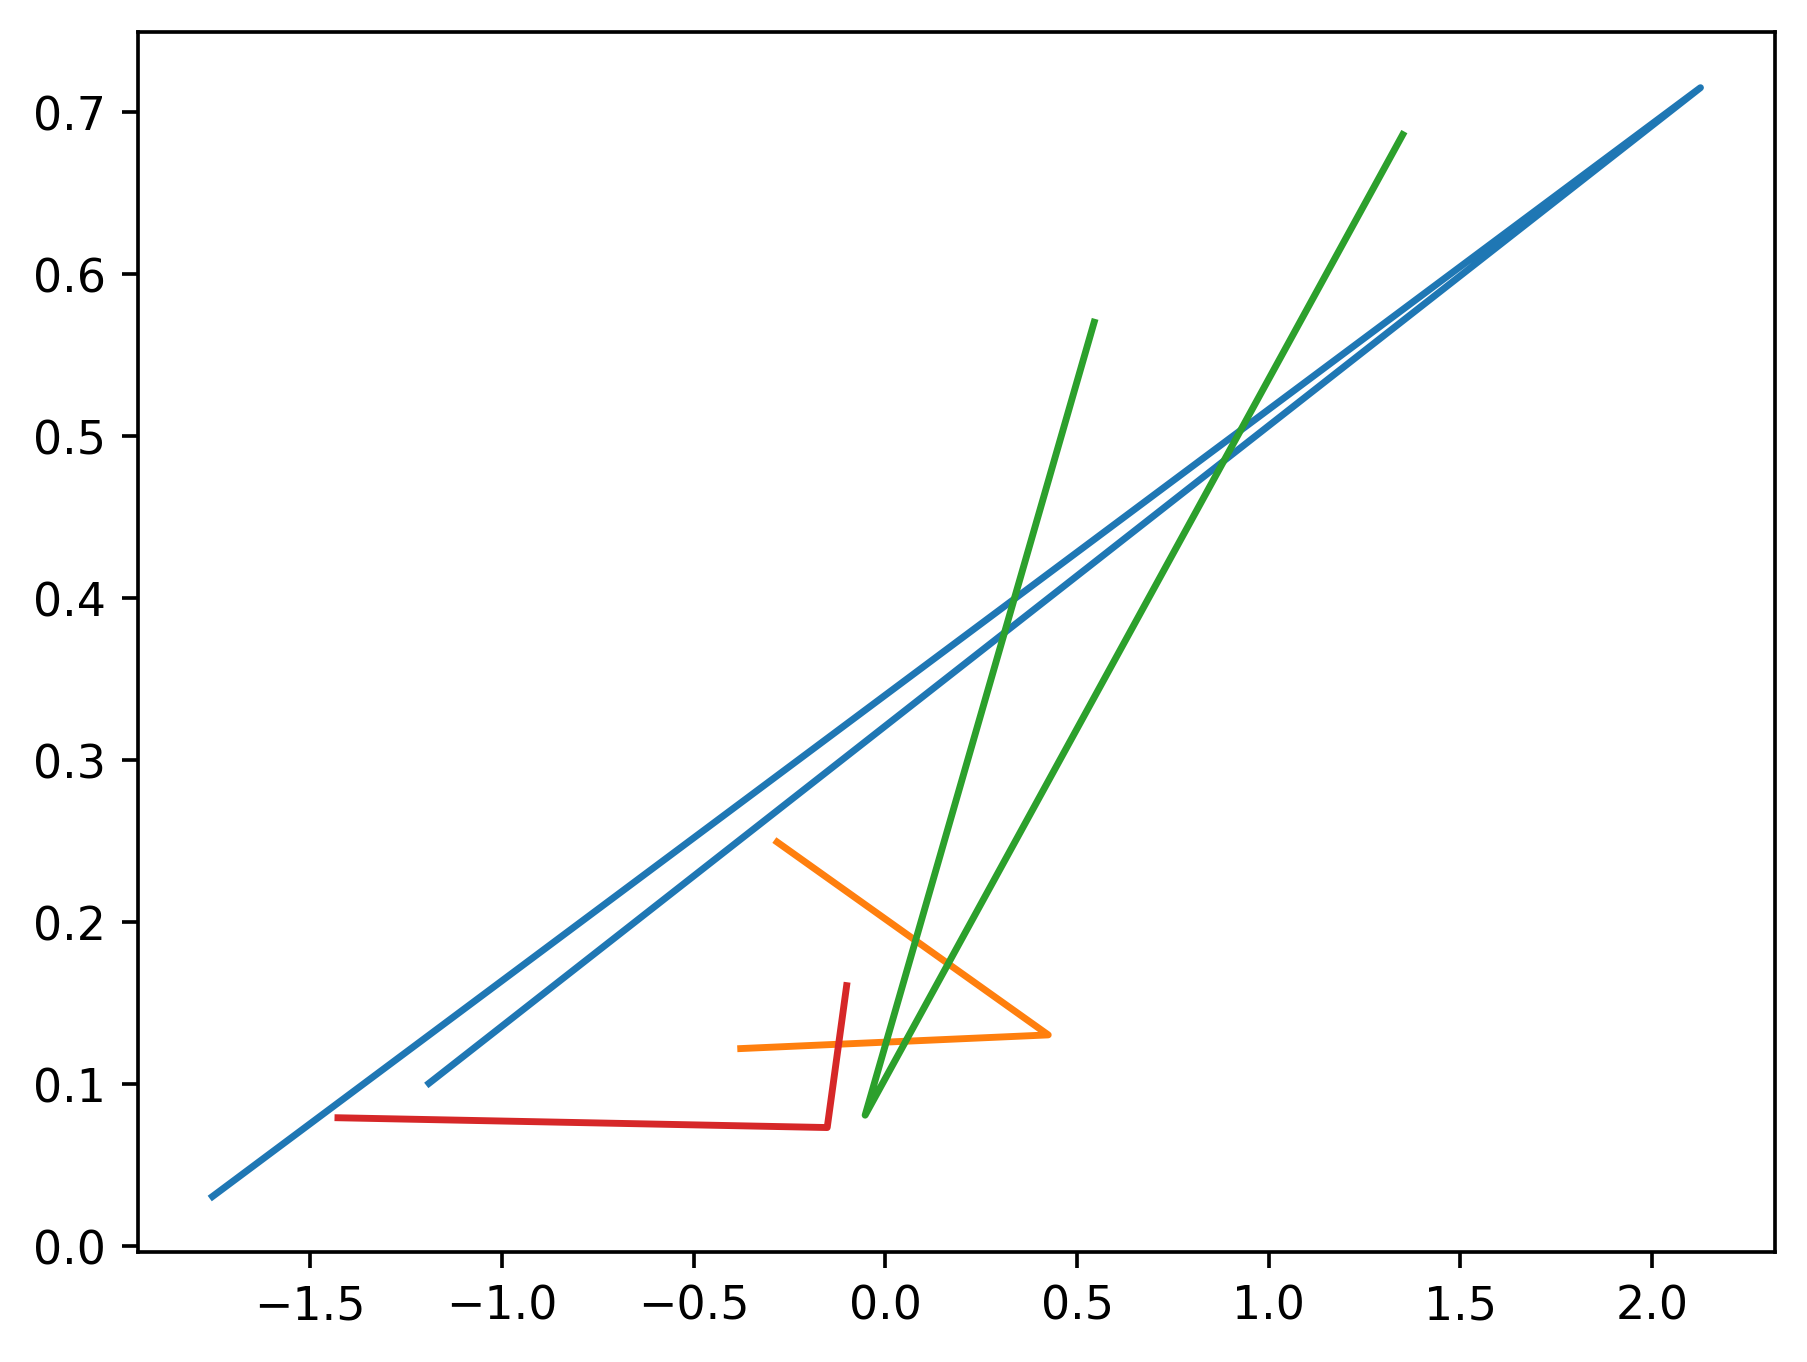

In [198]:
import matplotlib.pyplot as plt

plt.plot(tensor_input, softmax(tensor_input))

plt.show()

In [199]:
# split train dataset into train, validation and test sets
train_text, train_labels = traind['text'].values, traind['label'].values

val_text, test_text, val_labels, test_labels = train_test_split(testd['text'], testd['label'], 
                                                                random_state=42, 
                                                                test_size=0.5, 
                                                                stratify=testd['label'])

In [200]:
from transformers import DistilBertTokenizer, DistilBertModel
# Load the DistilBert tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
# Import the DistilBert pretrained model
bert = DistilBertModel.from_pretrained("distilbert-base-uncased")

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [201]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# tokenizer = AutoTokenizer.from_pretrained("RJZauner/distilbert_rotten_tomatoes_sentiment_classifier")

# model = AutoModelForSequenceClassification.from_pretrained("RJZauner/distilbert_rotten_tomatoes_sentiment_classifier")
# # bert = AutoModelForSequenceClassification.from_pretrained("RJZauner/distilbert_rotten_tomatoes_sentiment_classifier")

<Axes: >

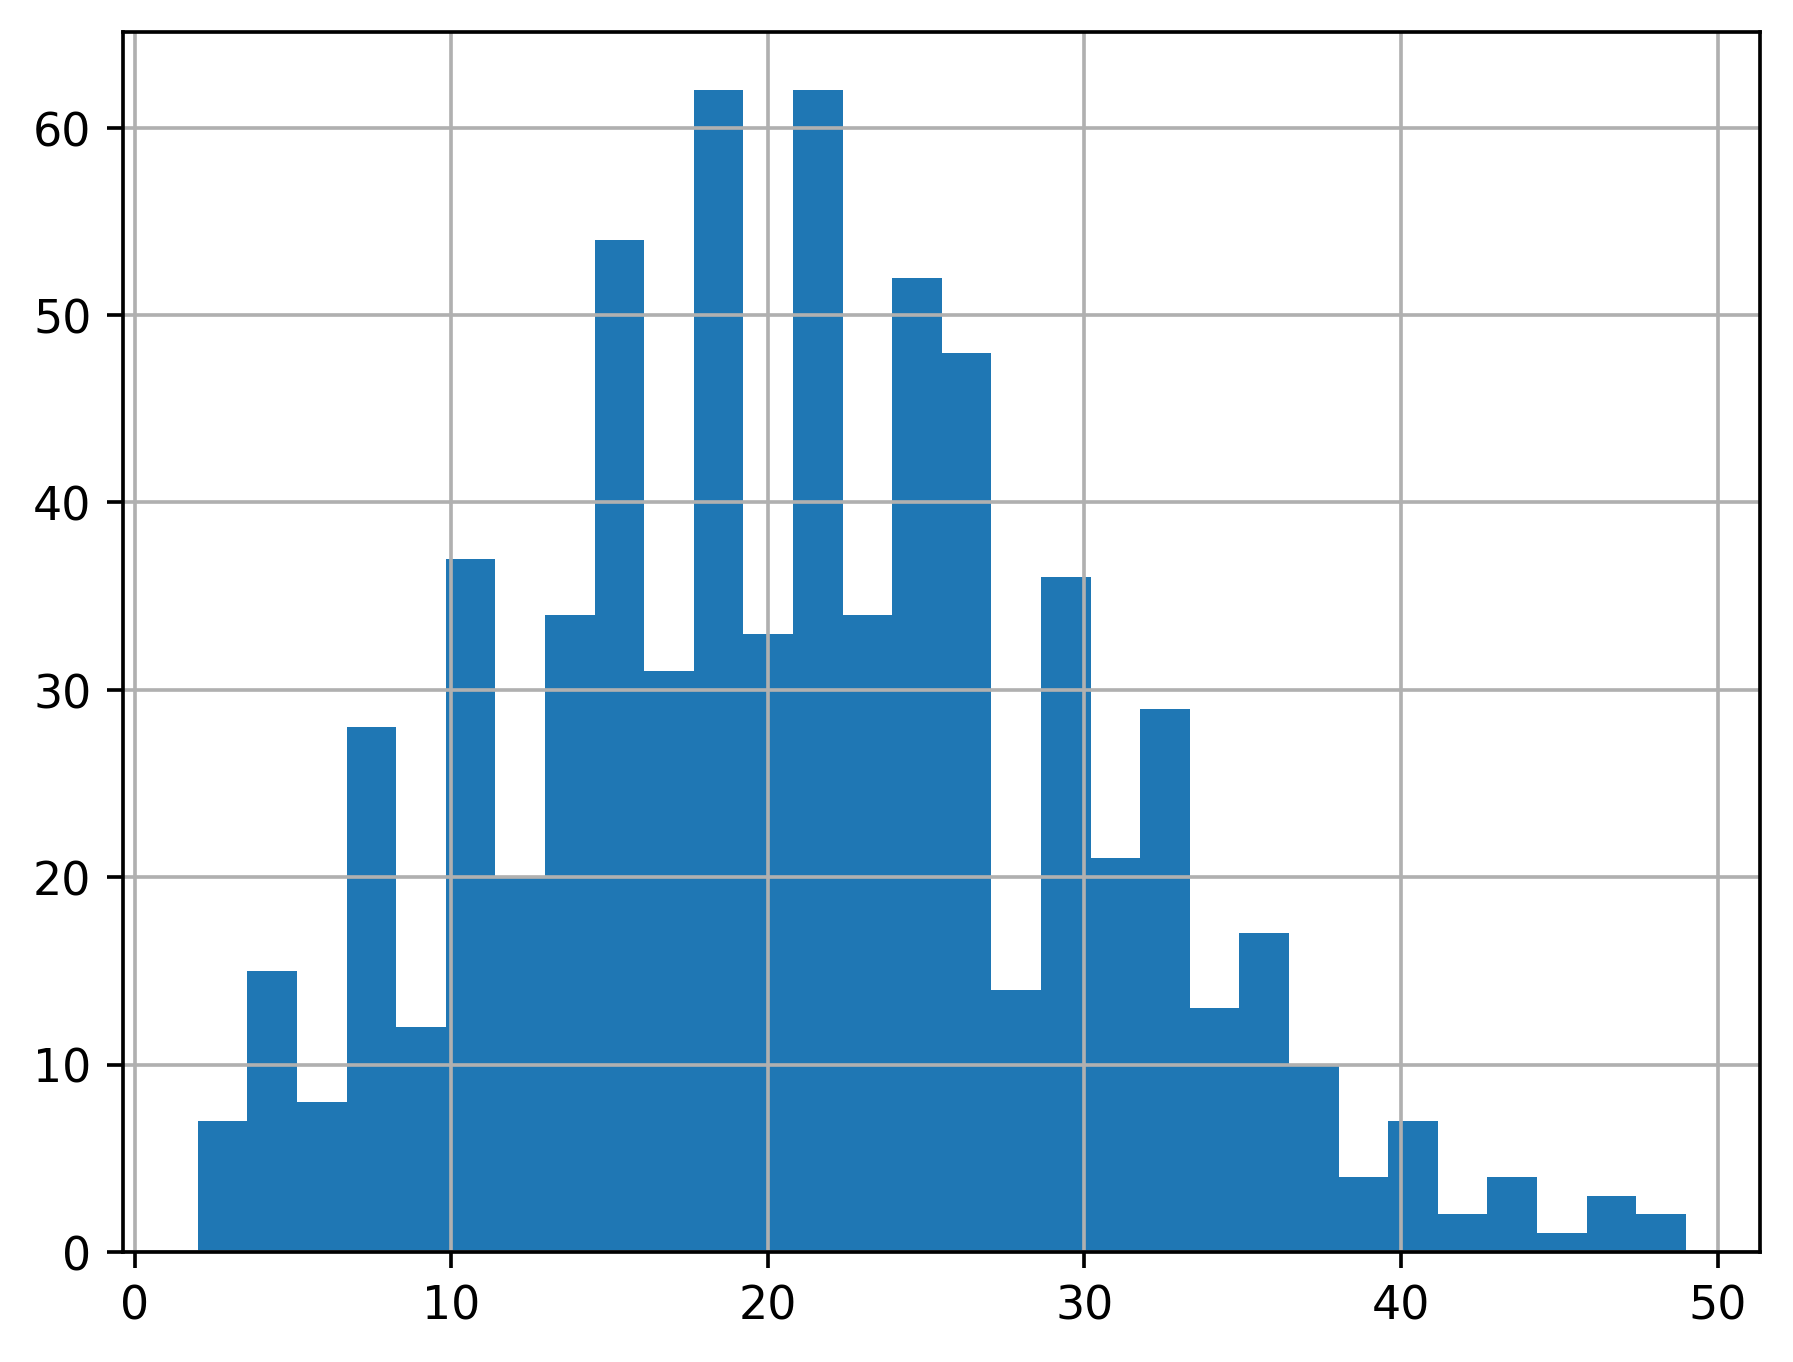

In [202]:
# get length of all the messages in the train set
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 330

seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [203]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [204]:
print(type(tokens_train['input_ids']))
print(tokens_train['input_ids'])
print(tokens_train['attention_mask'])
print(np.array(tokens_train['input_ids']).shape)

<class 'list'>
[[101, 2009, 2052, 2202, 1037, 3143, 22822, 2239, 2000, 12487, 2039, 1037, 3898, 6789, 1997, 7436, 18575, 1005, 1055, 4438, 18312, 1012, 102, 0, 0], [101, 2061, 2057, 2288, 2702, 2210, 6505, 6010, 5958, 1996, 6122, 2011, 2126, 1997, 4550, 1998, 17358, 1010, 6361, 2006, 1996, 2275, 1997, 10533, 102], [101, 6854, 1010, 27724, 2902, 4122, 2000, 16636, 1996, 2168, 2785, 1997, 5292, 18533, 9961, 1999, 2049, 2219, 11080, 2100, 3430, 2021, 2023, 3700, 102], [101, 15770, 2015, 2049, 3959, 10359, 21096, 2083, 1037, 8338, 1997, 18178, 2229, 2100, 16507, 2015, 1998, 5285, 29441, 8918, 10036, 3896, 1010, 2025, 102], [101, 1037, 10754, 1998, 18307, 29081, 10874, 5378, 2062, 3980, 2084, 6998, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2092, 1010, 2009, 2515, 2175, 2006, 5091, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 23528, 3790, 2003, 4372, 2121, 5856, 5422, 2011, 5285, 20897, 2050, 7825, 1005, 1055, 11062, 8111, 1010, 2014, 22518, 2791, 1010, 1998, 2138,

In [205]:
## convert lists to tensors

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [206]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
# batch_size = 32*multi
batch_size = 32*1
# batch_size = 3

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [207]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [208]:
# class BERT_Arch(nn.Module):

#     def __init__(self, bert):
#         super(BERT_Arch, self).__init__()
        
#         self.bert = bert 
#         # self.bert = model
        
#         # dropout layer
#         self.dropout = nn.Dropout(0.1)
      
#         # relu activation function
#         self.relu =  nn.ReLU()

#         # dense layer 1
#         self.fc1 = nn.Linear(768,512)
      
#         # dense layer 2 (Output layer)
#         self.fc2 = nn.Linear(512,traind['label'].nunique())

#         #softmax activation function
#         self.softmax = nn.LogSoftmax(dim=1)

#     #define the forward pass
#     def forward(self, sent_id, mask):
        
#         #pass the inputs to the model  
#         _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
#         # _, cls_hs = self.model(sent_id, attention_mask=mask, return_dict=False)
      
#         x = self.fc1(cls_hs)

#         x = self.relu(x)

#         x = self.dropout(x)

#         # output layer
#         x = self.fc2(x)
      
#         # apply softmax activation
#         x = self.softmax(x)

#         return x

In [209]:
class BERT_Arch(nn.Module):
   def __init__(self, bert):      
       super(BERT_Arch, self).__init__()
       self.bert = bert 
      
       # dropout layer
       self.dropout = nn.Dropout(0.2)
      
       # relu activation function
       self.relu =  nn.ReLU()
       # dense layer
       self.fc1 = nn.Linear(768,512)
       self.fc2 = nn.Linear(512,256)
       self.fc3 = nn.Linear(256,traind['label'].nunique())
       #softmax activation function
       self.softmax = nn.LogSoftmax(dim=1)
       #define the forward pass
   def forward(self, sent_id, mask):
      #pass the inputs to the model  
      cls_hs = self.bert(sent_id, attention_mask=mask)[0][:,0]
      
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      
      x = self.fc2(x)
      x = self.relu(x)
      x = self.dropout(x)
      # output layer
      x = self.fc3(x)
   
      # apply softmax activation
      x = self.softmax(x)
      return x

In [210]:
import torch
torch.cuda.is_available()

True

In [211]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)
# model = BERT_Arch(model)

# push the model to GPU
model = model.to(device)

In [212]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), 
                             lr=1e-05, 
                            #  betas=(0.9,0.999), 
                            #  eps=1e-08,
                             ) 
# optimizer = torch.optim.SGD(model.parameters())
# optimizer = torch.optim.Adadelta(model.parameters())
# optimizer = torch.optim.Adagrad(model.parameters())
# optimizer = torch.optim.Adam(model.parameters(), 
#                              lr=2e-05, 
#                              betas=(0.9,0.999), 
#                              eps=1e-08,
#                              )
# optimizer = torch.optim.Adamax(model.parameters(), lr=0.01)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [213]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
# class_weights = compute_class_weight('balanced', np.unique(train_labels), train_labels)

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_labels),
                                        y = train_labels                                                    
                                    )
# class_weights = dict(zip(np.unique(train_labels), class_weights))
class_weights

print("Class Weights:",class_weights)

Class Weights: [1.00864553 0.99150142]


In [214]:
# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

In [215]:
# function to train the model
def train():
    
    model.train()
    total_loss, total_accuracy, total_batch = 0, 0, 0
  
    # empty list to save model predictions
    total_preds=[]
  
    # iterate over batches
    for step,batch in enumerate(train_dataloader):
        
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
        
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
 
        sent_id, mask, labels = batch
        
        # clear previously calculated gradients 
        model.zero_grad()        

        # get model predictions for the current batch
        preds = model(sent_id, mask)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        total_accuracy = total_accuracy + torch.sum(torch.argmax(preds, dim=1) == labels).detach().cpu().numpy()

        batchl = len(labels)

        total_batch = total_batch + batchl
        # print(torch.sum(torch.argmax(preds, dim=1) == labels))
        # print(total_accuracy/total_batch)

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)

    final_total_accuracy = total_accuracy / total_batch
  
      # predictions are in the form of (no. of batches, size of batch, no. of classes).
      # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds, final_total_accuracy

In [216]:
# function for evaluating the model
def evaluate():
    
    print("\nEvaluating...")
  
    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy, total_batch = 0, 0, 0
    
    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step,batch in enumerate(val_dataloader):
        
        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
            
            # Calculate elapsed time in minutes.
            # elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():
            
            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)

            total_loss = total_loss + loss.item()

            total_accuracy = total_accuracy + torch.sum(torch.argmax(preds, dim=1) == labels).detach().cpu().numpy()

            batchl = len(labels)

            total_batch = total_batch + batchl
            # print(torch.sum(torch.argmax(preds, dim=1) == labels))
            # print(total_accuracy/total_batch)

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader) 

    final_total_accuracy = total_accuracy / total_batch

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds, final_total_accuracy

In [217]:
# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]
train_acces=[]
valid_acces=[]

In [218]:
from torch.optim.lr_scheduler import LinearLR

# set initial loss to infinite
best_valid_loss = float('inf')

# number of training epochs
epochs = 160

scheduler = LinearLR(optimizer)#self.opt, start_factor=0.5, total_iters=4

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ , train_acc = train()
    
    #evaluate model
    valid_loss, _ , valid_acc= evaluate()

    scheduler.step()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 
                   '/content/drive/MyDrive/0. Paper/0. Komputika/saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    # append training and validation acc
    train_acces.append(train_acc)
    valid_acces.append(valid_acc)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')
    
    print(f'\nTraining Acc: {train_acc:.3f}')
    print(f'Validation Acc: {valid_acc:.3f}')


 Epoch 1 / 160

Evaluating...

Training Loss: 0.694
Validation Loss: 0.695

Training Acc: 0.496
Validation Acc: 0.480

 Epoch 2 / 160

Evaluating...

Training Loss: 0.694
Validation Loss: 0.694

Training Acc: 0.486
Validation Acc: 0.480

 Epoch 3 / 160

Evaluating...

Training Loss: 0.692
Validation Loss: 0.693

Training Acc: 0.514
Validation Acc: 0.480

 Epoch 4 / 160

Evaluating...

Training Loss: 0.692
Validation Loss: 0.692

Training Acc: 0.503
Validation Acc: 0.487

 Epoch 5 / 160

Evaluating...

Training Loss: 0.692
Validation Loss: 0.690

Training Acc: 0.539
Validation Acc: 0.520

 Epoch 6 / 160

Evaluating...

Training Loss: 0.690
Validation Loss: 0.689

Training Acc: 0.556
Validation Acc: 0.640

 Epoch 7 / 160

Evaluating...

Training Loss: 0.688
Validation Loss: 0.687

Training Acc: 0.561
Validation Acc: 0.687

 Epoch 8 / 160

Evaluating...

Training Loss: 0.686
Validation Loss: 0.686

Training Acc: 0.597
Validation Acc: 0.687

 Epoch 9 / 160

Evaluating...

Training Loss: 0

In [219]:
# def tokenize_function(examples):
#     return tokenizer(examples["text"], padding="max_length", truncation=True)
 
# tokenized_datasets = dataset.map(tokenize_function, batched=True)

In [220]:
# import numpy as np
# from datasets import load_metric
 
# metric = load_metric("accuracy")
 
# def compute_metrics(eval_pred):
#     logits, labels = eval_pred
#     predictions = np.argmax(logits, axis=-1)
#     return metric.compute(predictions=predictions, references=labels)

In [221]:
# from transformers import TrainingArguments, Trainer
 
# training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch", num_train_epochs=1)
 
 
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=tokenized_datasets["train"],
#     eval_dataset=tokenized_datasets["test"],
#     compute_metrics=compute_metrics,
# )
 
# trainer.train()

In [222]:
# # pass the pre-trained BERT to our define architecture
# model = BERT_Arch(bert)
# # model = BERT_Arch(model)

# # push the model to GPU
# # model = model.to(device)

# # optimizer from hugging face transformers
# from transformers import AdamW

# # define the optimizer
# optimizer = AdamW(model.parameters(),lr = 1e-5) 

# # set initial loss to infinite
# best_valid_loss = float('inf')

# train_losses=[]
# valid_losses=[]

# # number of training epochs
# epochs = 40

# #for each epoch
# for epoch in range(epochs):
     
#     print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
#     #train model
#     train_loss, _ = train()
    
#     #evaluate model
#     valid_loss, _ = evaluate()
    
#     #save the best model
#     if valid_loss < best_valid_loss:
#         best_valid_loss = valid_loss
#         torch.save(model.state_dict(), 
#                    '/content/drive/MyDrive/0. Paper/0. Komputika/saved_weights.pt')
    
#     # append training and validation loss
#     train_losses.append(train_loss)
#     valid_losses.append(valid_loss)
    
#     print(f'\nTraining Loss: {train_loss:.3f}')
#     print(f'Validation Loss: {valid_loss:.3f}')

# #load weights of best model
# path = '/content/drive/MyDrive/0. Paper/0. Komputika/saved_weights.pt'
# model.load_state_dict(torch.load(path))



# # get predictions for test data
# with torch.no_grad():
#     # preds1 = model(test_seq.to(device), test_mask.to(device))
#     preds1 = model(test_seq, test_mask)
#     preds1 = preds1.detach().cpu().numpy()

# from sklearn.metrics import confusion_matrix

# # model's performance
# preds = np.argmax(preds1, axis = 1)
# print(confusion_matrix(test_y, preds))
# print(classification_report(test_y, preds))

# print()
# cr1 = classification_report(test_y, preds, output_dict=True)

# import matplotlib.pyplot as plt

# plt.rcParams["figure.dpi"] = 330

# plt.plot(train_losses, label="Train")
# plt.plot(valid_losses, label="Validation")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("BERT Loss Curve")
# plt.legend()
# plt.grid()
# plt.show()

In [223]:
#load weights of best model
path = '/content/drive/MyDrive/0. Paper/0. Komputika/saved_weights.pt'
model.load_state_dict(torch.load(path))

# model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))

<All keys matched successfully>

In [224]:
# get predictions for test data
with torch.no_grad():
    preds1 = model(test_seq.to(device), test_mask.to(device))
    # preds1 = model(test_seq, test_mask)
    preds1 = preds1.detach().cpu().numpy()

In [225]:
from sklearn.metrics import confusion_matrix

# model's performance
preds = np.argmax(preds1, axis = 1)
print(confusion_matrix(test_y, preds))
print(classification_report(test_y, preds))

print()
cr1 = classification_report(test_y, preds, output_dict=True)

[[51 21]
 [20 58]]
              precision    recall  f1-score   support

           0       0.72      0.71      0.71        72
           1       0.73      0.74      0.74        78

    accuracy                           0.73       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.73      0.73      0.73       150




In [226]:
print(type(train_losses))
print(type(train_acces))

<class 'list'>
<class 'list'>


In [227]:
# model = models.resnet18()
param_size = 0
for param in model.parameters():
    param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in model.buffers():
    buffer_size += buffer.nelement() * buffer.element_size()

size_all_mb = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))

model size: 255.163MB


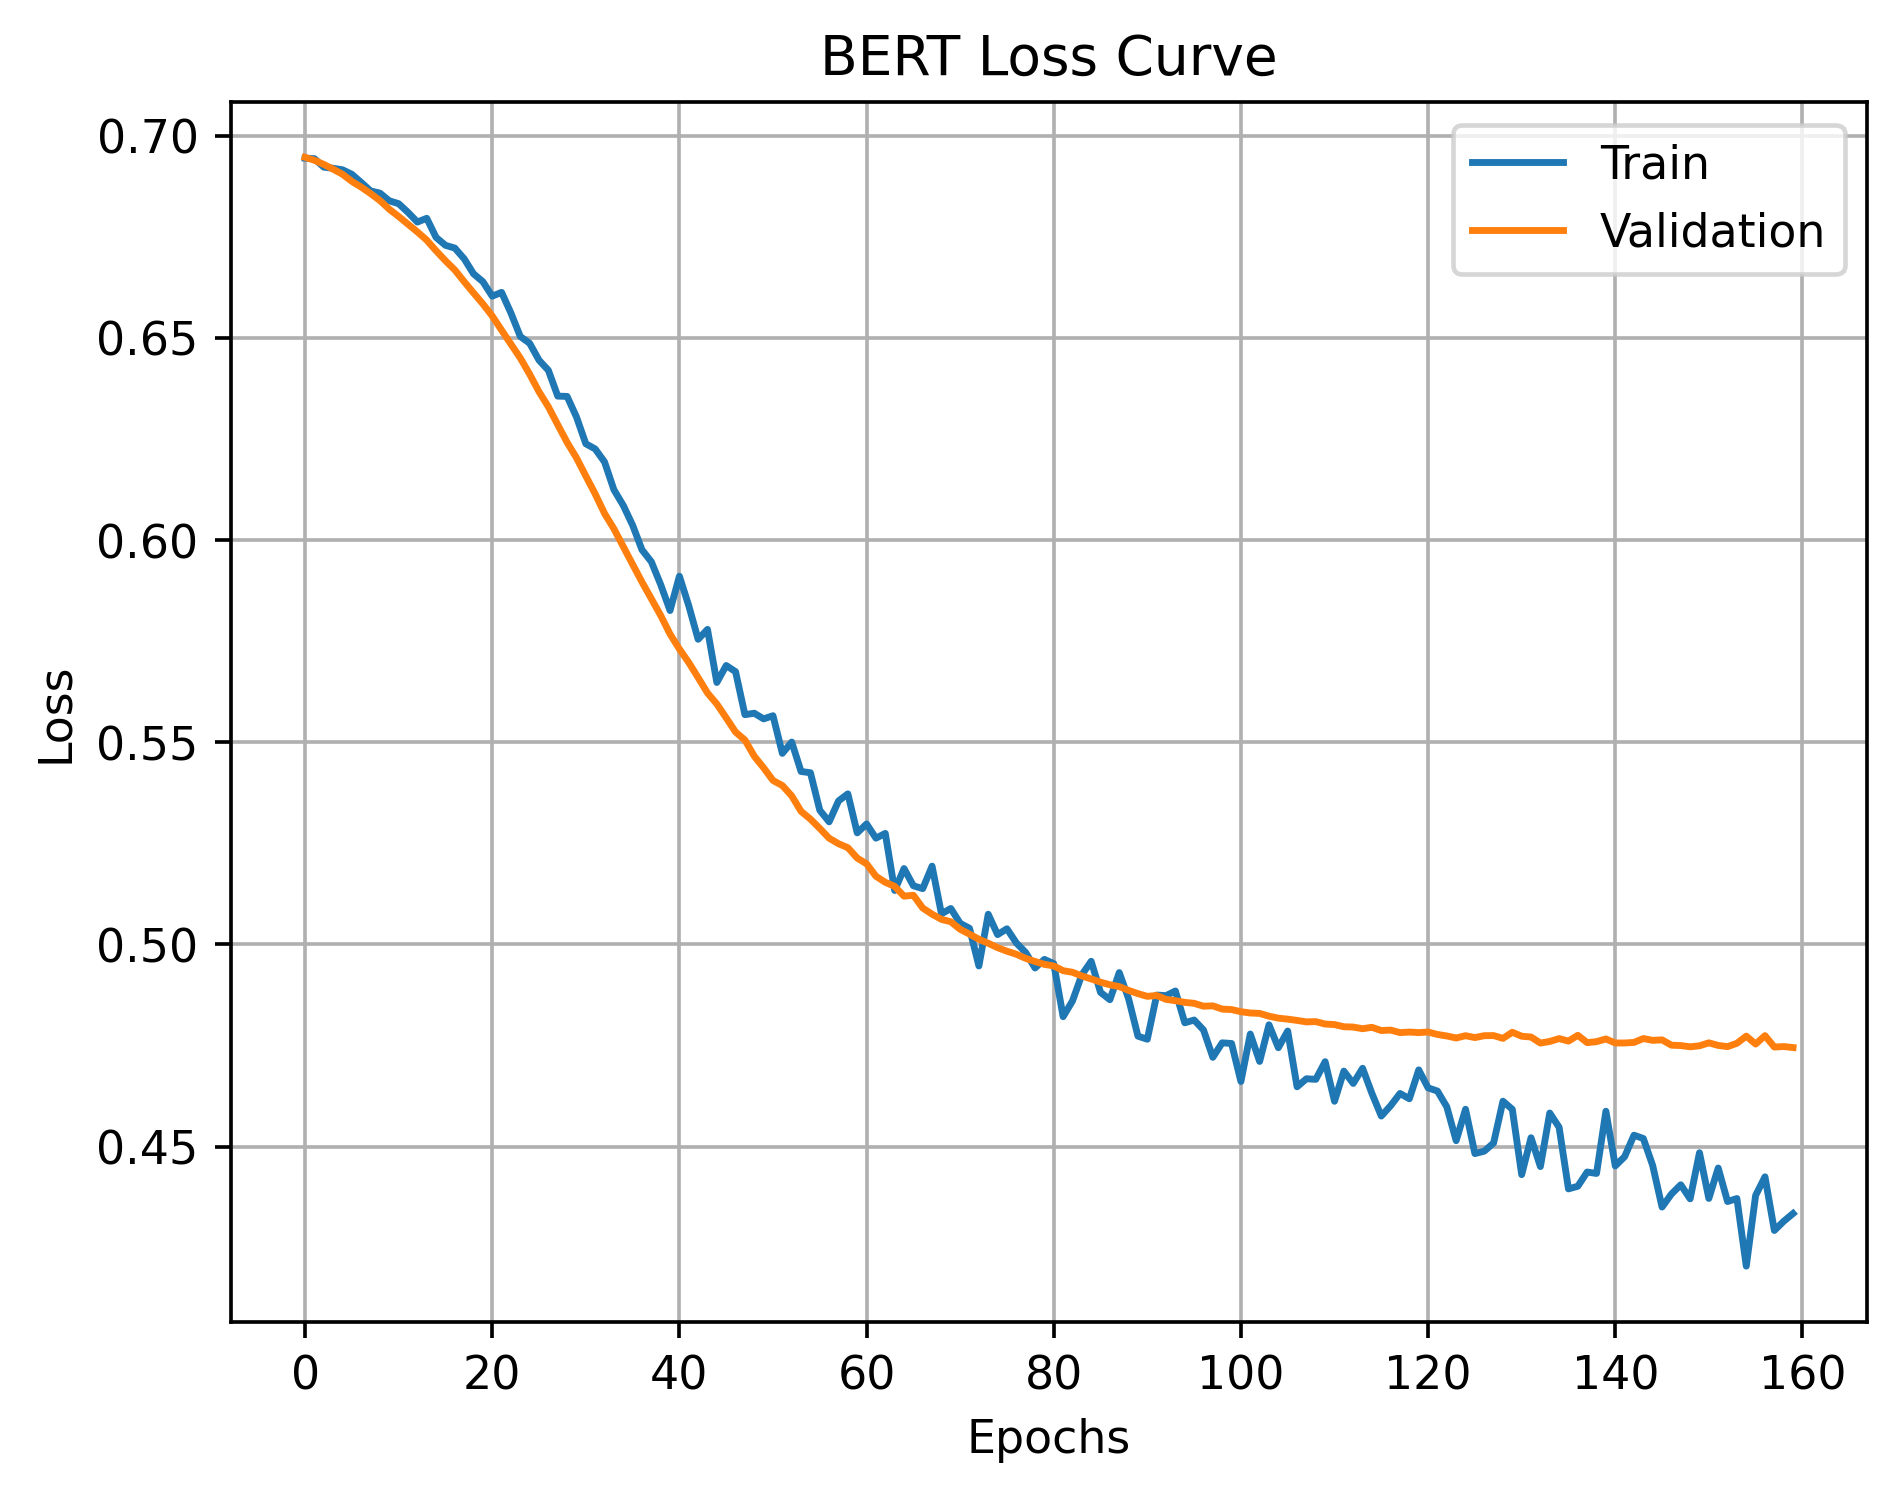

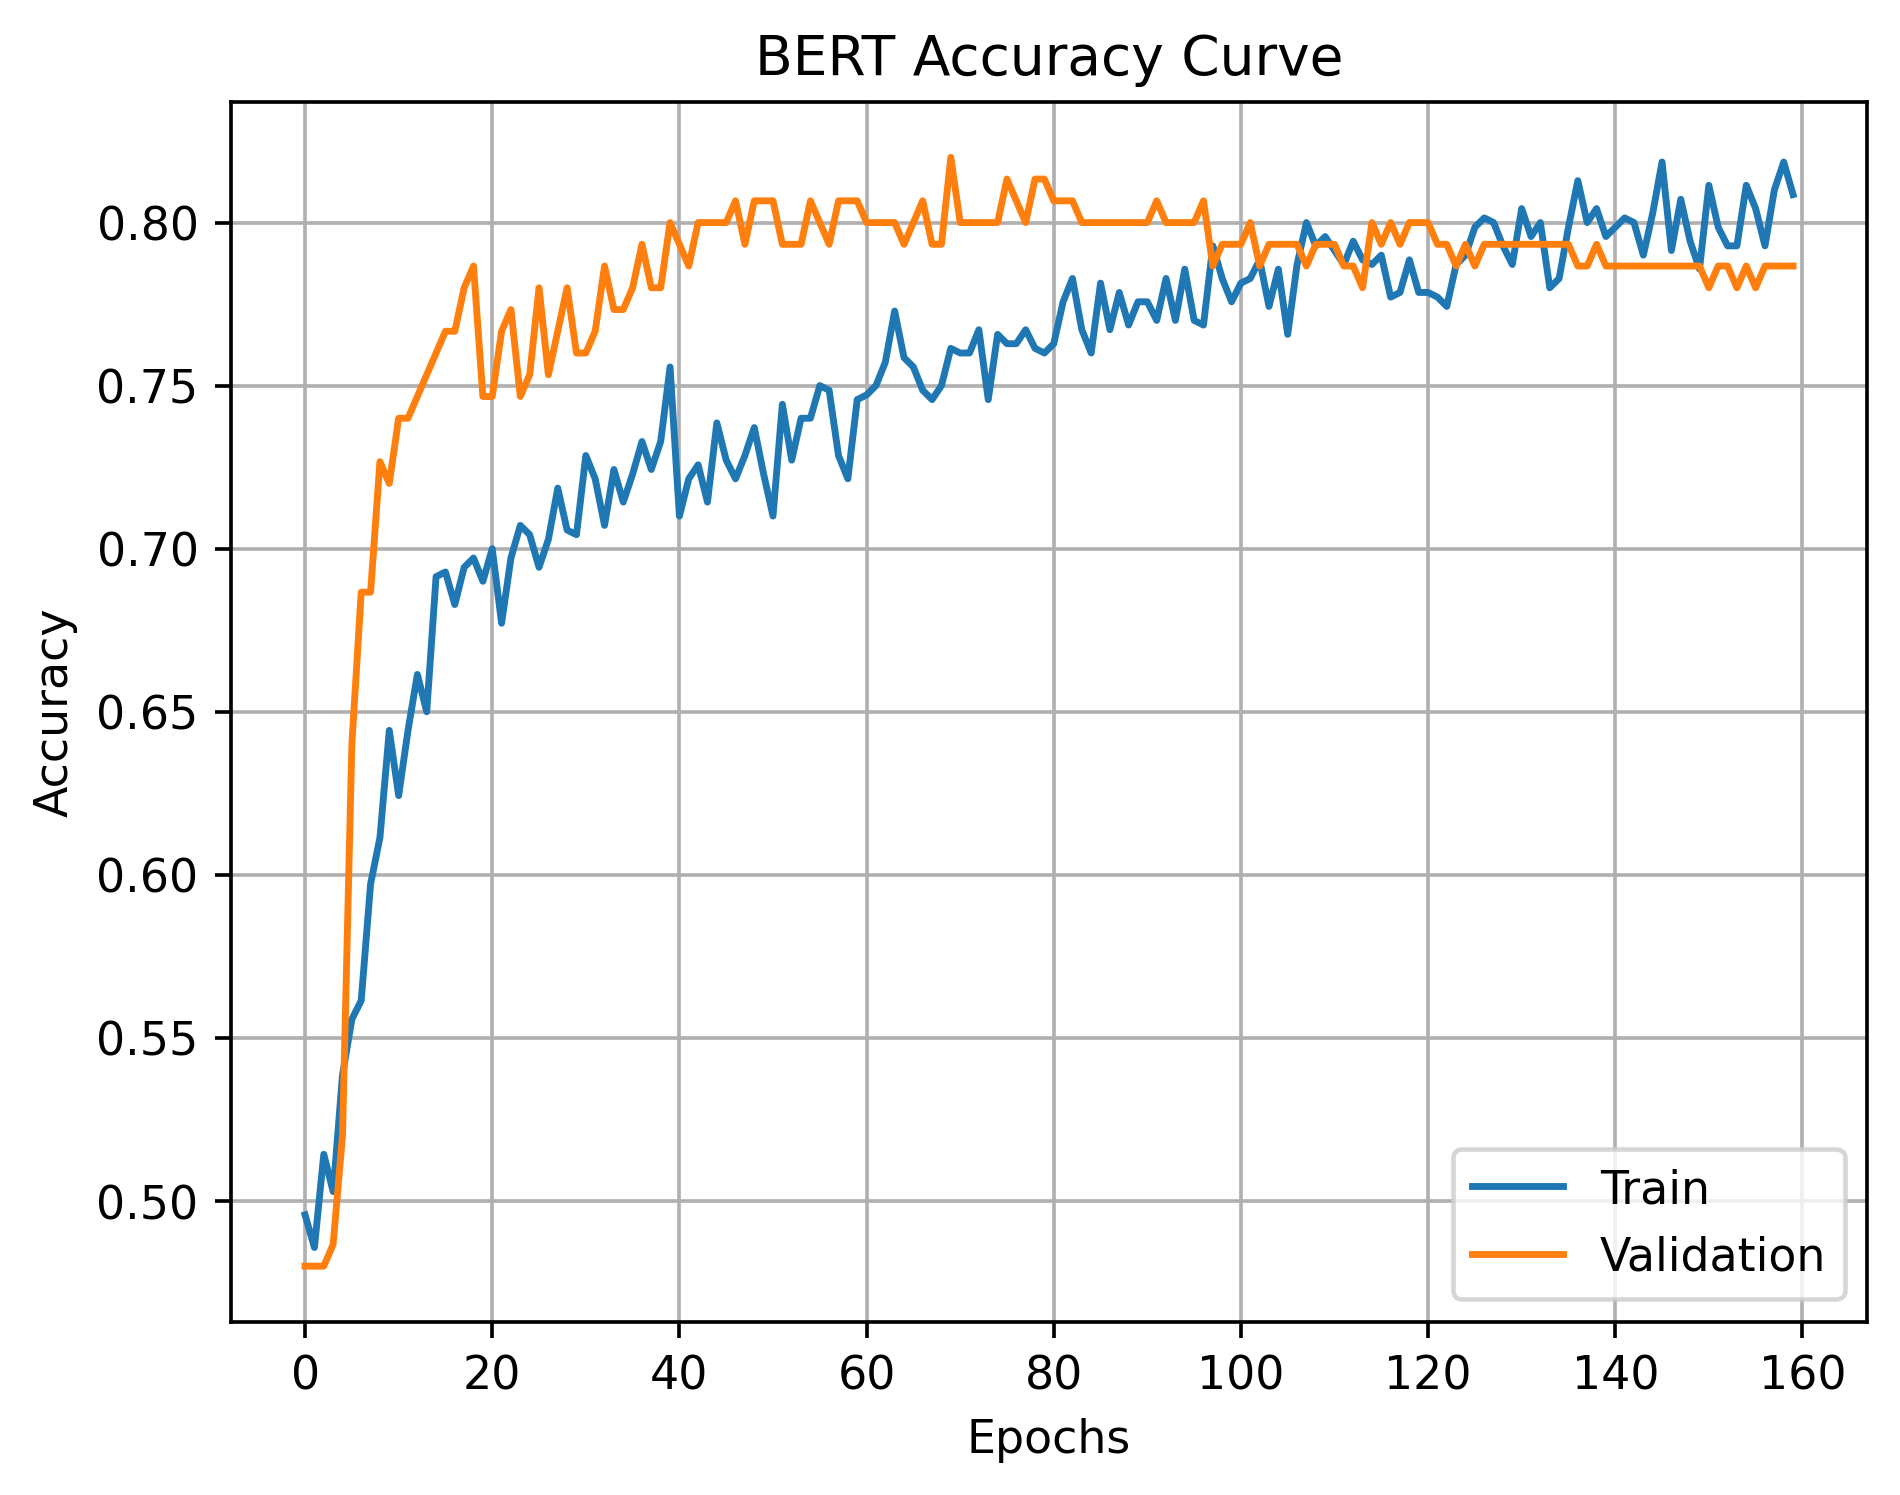

In [229]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 330

plt.plot(train_losses, label="Train")
plt.plot(valid_losses, label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("BERT Loss Curve")
plt.legend()
plt.grid()
plt.show()

plt.plot(train_acces, label="Train")
plt.plot(valid_acces, label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("BERT Accuracy Curve")
plt.legend()
plt.grid()
plt.show()

In [230]:
# import BERT-base pretrained model
bert1 = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer1 = BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [231]:
# tokenize and encode sequences in the training set
tokens_train1 = tokenizer1.batch_encode_plus(
    train_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val1 = tokenizer1.batch_encode_plus(
    val_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test1 = tokenizer1.batch_encode_plus(
    test_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [232]:
## convert lists to tensors

train_seq1 = torch.tensor(tokens_train1['input_ids'])
train_mask1 = torch.tensor(tokens_train1['attention_mask'])
train_y1 = torch.tensor(train_labels.tolist())

val_seq1 = torch.tensor(tokens_val1['input_ids'])
val_mask1 = torch.tensor(tokens_val1['attention_mask'])
val_y1 = torch.tensor(val_labels.tolist())

test_seq1 = torch.tensor(tokens_test1['input_ids'])
test_mask1 = torch.tensor(tokens_test1['attention_mask'])
test_y1 = torch.tensor(test_labels.tolist())

In [233]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
# batch_size = 32*multi
batch_size = 32*1
# batch_size = 3

# wrap tensors
train_data1 = TensorDataset(train_seq1, train_mask1, train_y1)

# sampler for sampling the data during training
train_sampler1 = RandomSampler(train_data1)

# dataLoader for train set
train_dataloader1 = DataLoader(train_data1, sampler=train_sampler1, batch_size=batch_size)

# wrap tensors
val_data1 = TensorDataset(val_seq1, val_mask1, val_y1)

# sampler for sampling the data during training
val_sampler1 = SequentialSampler(val_data1)

# dataLoader for validation set
val_dataloader1 = DataLoader(val_data1, sampler = val_sampler1, batch_size=batch_size)

In [234]:
# freeze all the parameters
for param in bert1.parameters():
    param.requires_grad = False

In [235]:
class BERT_Arch1(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch1, self).__init__()
        
        self.bert = bert 
        # self.bert = model
        
        # dropout layer
        self.dropout = nn.Dropout(0.1)
      
        # relu activation function
        self.relu =  nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768,512)
      
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512,traind['label'].nunique())

        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):
        
        #pass the inputs to the model  
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
        # _, cls_hs = self.model(sent_id, attention_mask=mask, return_dict=False)
      
        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)
      
        # apply softmax activation
        x = self.softmax(x)

        return x

In [236]:
# pass the pre-trained BERT to our define architecture
model1 = BERT_Arch1(bert1)
# model = BERT_Arch(model)

# push the model to GPU
model1 = model1.to(device)

In [246]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer1 = AdamW(model1.parameters(), 
                             lr=5e-05, 
                            #  betas=(0.9,0.999), 
                            #  eps=1e-08,
                             ) 
# optimizer = torch.optim.SGD(model.parameters())
# optimizer = torch.optim.Adadelta(model.parameters())
# optimizer = torch.optim.Adagrad(model.parameters())
# optimizer = torch.optim.Adam(model.parameters(), 
#                              lr=2e-05, 
#                              betas=(0.9,0.999), 
#                              eps=1e-08,
#                              )
# optimizer = torch.optim.Adamax(model.parameters(), lr=0.01)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [247]:
# function to train the model
def train1():
    
    model1.train()
    total_loss, total_accuracy, total_batch = 0, 0, 0
  
    # empty list to save model predictions
    total_preds=[]
  
    # iterate over batches
    for step,batch in enumerate(train_dataloader1):
        
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader1)))
        
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
 
        sent_id, mask, labels = batch
        
        # clear previously calculated gradients 
        model1.zero_grad()        

        # get model predictions for the current batch
        preds = model1(sent_id, mask)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        total_accuracy = total_accuracy + torch.sum(torch.argmax(preds, dim=1) == labels).detach().cpu().numpy()

        batchl = len(labels)

        total_batch = total_batch + batchl
        # print(torch.sum(torch.argmax(preds, dim=1) == labels))
        # print(total_accuracy/total_batch)

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model1.parameters(), 1.0)

        # update parameters
        optimizer1.step()

        # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader1)

    final_total_accuracy = total_accuracy / total_batch
  
      # predictions are in the form of (no. of batches, size of batch, no. of classes).
      # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds, final_total_accuracy

In [248]:
# function for evaluating the model
def evaluate1():
    
    print("\nEvaluating...")
  
    # deactivate dropout layers
    model1.eval()

    total_loss, total_accuracy, total_batch = 0, 0, 0
    
    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step,batch in enumerate(val_dataloader1):
        
        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
            
            # Calculate elapsed time in minutes.
            # elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader1)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():
            
            # model predictions
            preds = model1(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)

            total_loss = total_loss + loss.item()

            total_accuracy = total_accuracy + torch.sum(torch.argmax(preds, dim=1) == labels).detach().cpu().numpy()

            batchl = len(labels)

            total_batch = total_batch + batchl
            # print(torch.sum(torch.argmax(preds, dim=1) == labels))
            # print(total_accuracy/total_batch)

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader1) 

    final_total_accuracy = total_accuracy / total_batch

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds, final_total_accuracy

In [249]:
# set initial loss to infinite
best_valid_loss1 = float('inf')

train_losses1=[]
valid_losses1=[]

train_acces1=[]
valid_acces1=[]

# number of training epochs
epochs = 160

scheduler1 = LinearLR(optimizer1)#self.opt, start_factor=0.5, total_iters=4

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss1, _ , train_acc1 = train1()
    
    #evaluate model
    valid_loss1, _ , valid_acc1 = evaluate1()

    scheduler1.step()
    
    #save the best model
    if valid_loss1 < best_valid_loss1:
        best_valid_loss1 = valid_loss1
        torch.save(model1.state_dict(), 
                   '/content/drive/MyDrive/0. Paper/0. Komputika/saved_weights1.pt')
    
    # append training and validation loss
    train_losses1.append(train_loss1)
    valid_losses1.append(valid_loss1)
    
    print(f'\nTraining Loss: {train_loss1:.3f}')
    print(f'Validation Loss: {valid_loss1:.3f}')

    # append training and validation acc
    train_acces1.append(train_acc1)
    valid_acces1.append(valid_acc1)


 Epoch 1 / 160

Evaluating...

Training Loss: 0.594
Validation Loss: 0.561

 Epoch 2 / 160

Evaluating...

Training Loss: 0.596
Validation Loss: 0.560

 Epoch 3 / 160

Evaluating...

Training Loss: 0.597
Validation Loss: 0.559

 Epoch 4 / 160

Evaluating...

Training Loss: 0.595
Validation Loss: 0.556

 Epoch 5 / 160

Evaluating...

Training Loss: 0.592
Validation Loss: 0.558

 Epoch 6 / 160

Evaluating...

Training Loss: 0.589
Validation Loss: 0.553

 Epoch 7 / 160

Evaluating...

Training Loss: 0.587
Validation Loss: 0.557

 Epoch 8 / 160

Evaluating...

Training Loss: 0.586
Validation Loss: 0.560

 Epoch 9 / 160

Evaluating...

Training Loss: 0.596
Validation Loss: 0.548

 Epoch 10 / 160

Evaluating...

Training Loss: 0.592
Validation Loss: 0.550

 Epoch 11 / 160

Evaluating...

Training Loss: 0.582
Validation Loss: 0.545

 Epoch 12 / 160

Evaluating...

Training Loss: 0.587
Validation Loss: 0.571

 Epoch 13 / 160

Evaluating...

Training Loss: 0.585
Validation Loss: 0.544

 Epoch 

In [250]:
#load weights of best model
path = '/content/drive/MyDrive/0. Paper/0. Komputika/saved_weights1.pt'
model1.load_state_dict(torch.load(path))

<All keys matched successfully>

In [251]:
# get predictions for test data
with torch.no_grad():
    preds11 = model1(test_seq1.to(device), test_mask1.to(device))
    # preds11 = model1(test_seq, test_mask)
    preds11 = preds11.detach().cpu().numpy()

In [252]:
from sklearn.metrics import confusion_matrix

# model's performance
preds111 = np.argmax(preds11, axis = 1)
print(confusion_matrix(test_y1, preds111))
print(classification_report(test_y1, preds111))

print()
cr11 = classification_report(test_y1, preds111, output_dict=True)

[[48 24]
 [23 55]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.67        72
           1       0.70      0.71      0.70        78

    accuracy                           0.69       150
   macro avg       0.69      0.69      0.69       150
weighted avg       0.69      0.69      0.69       150




In [253]:
# model = models.resnet18()
param_size = 0
for param in model1.parameters():
    param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in model1.buffers():
    buffer_size += buffer.nelement() * buffer.element_size()

size_all_mb1 = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))

model size: 255.163MB


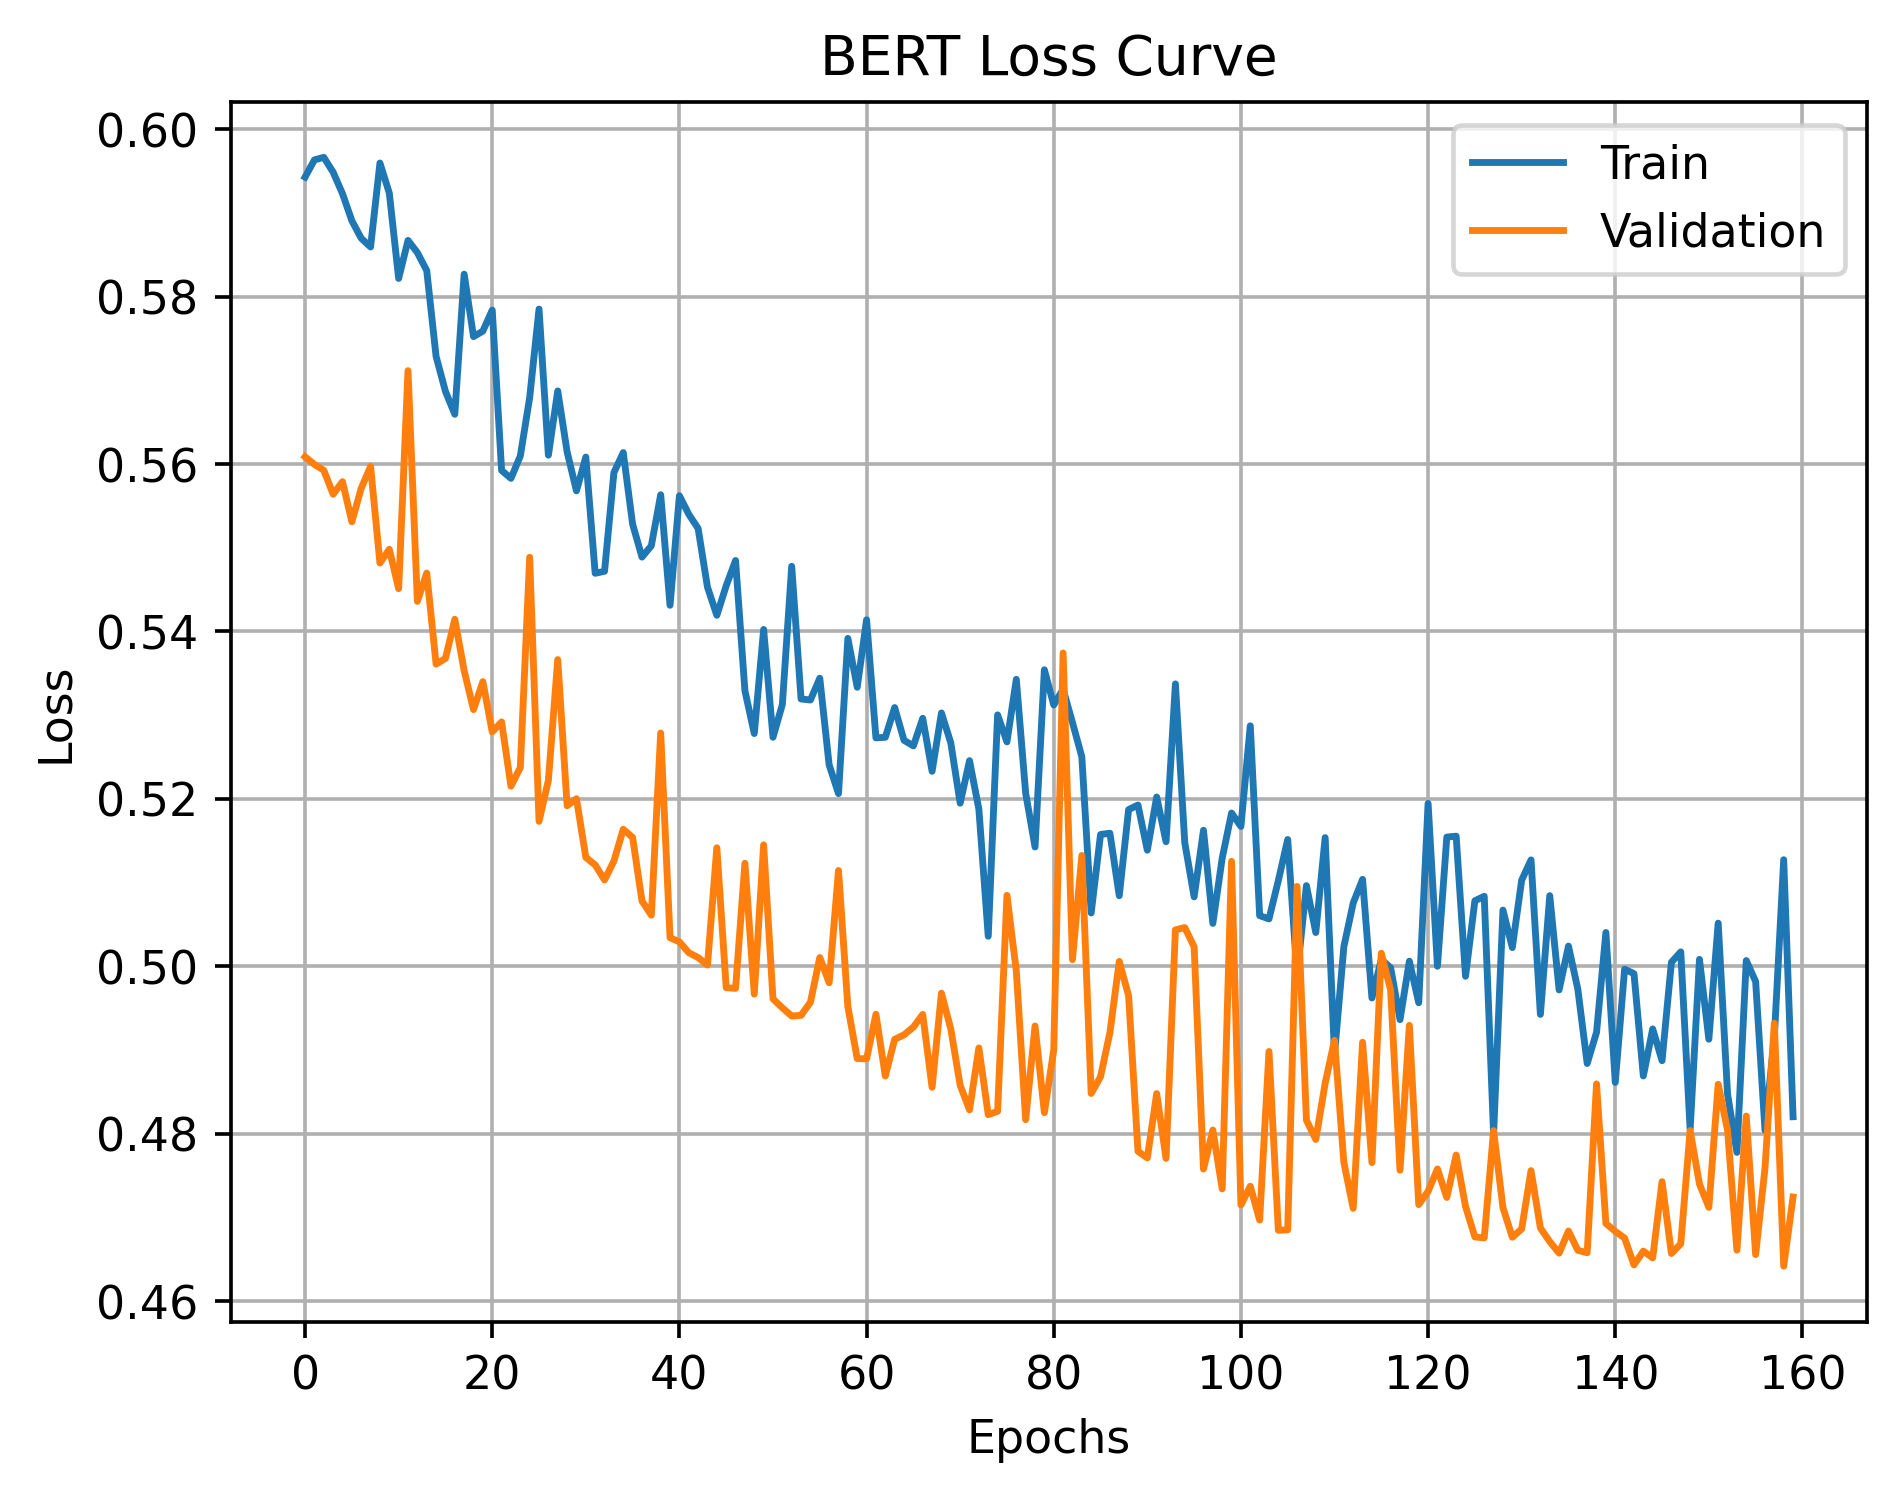

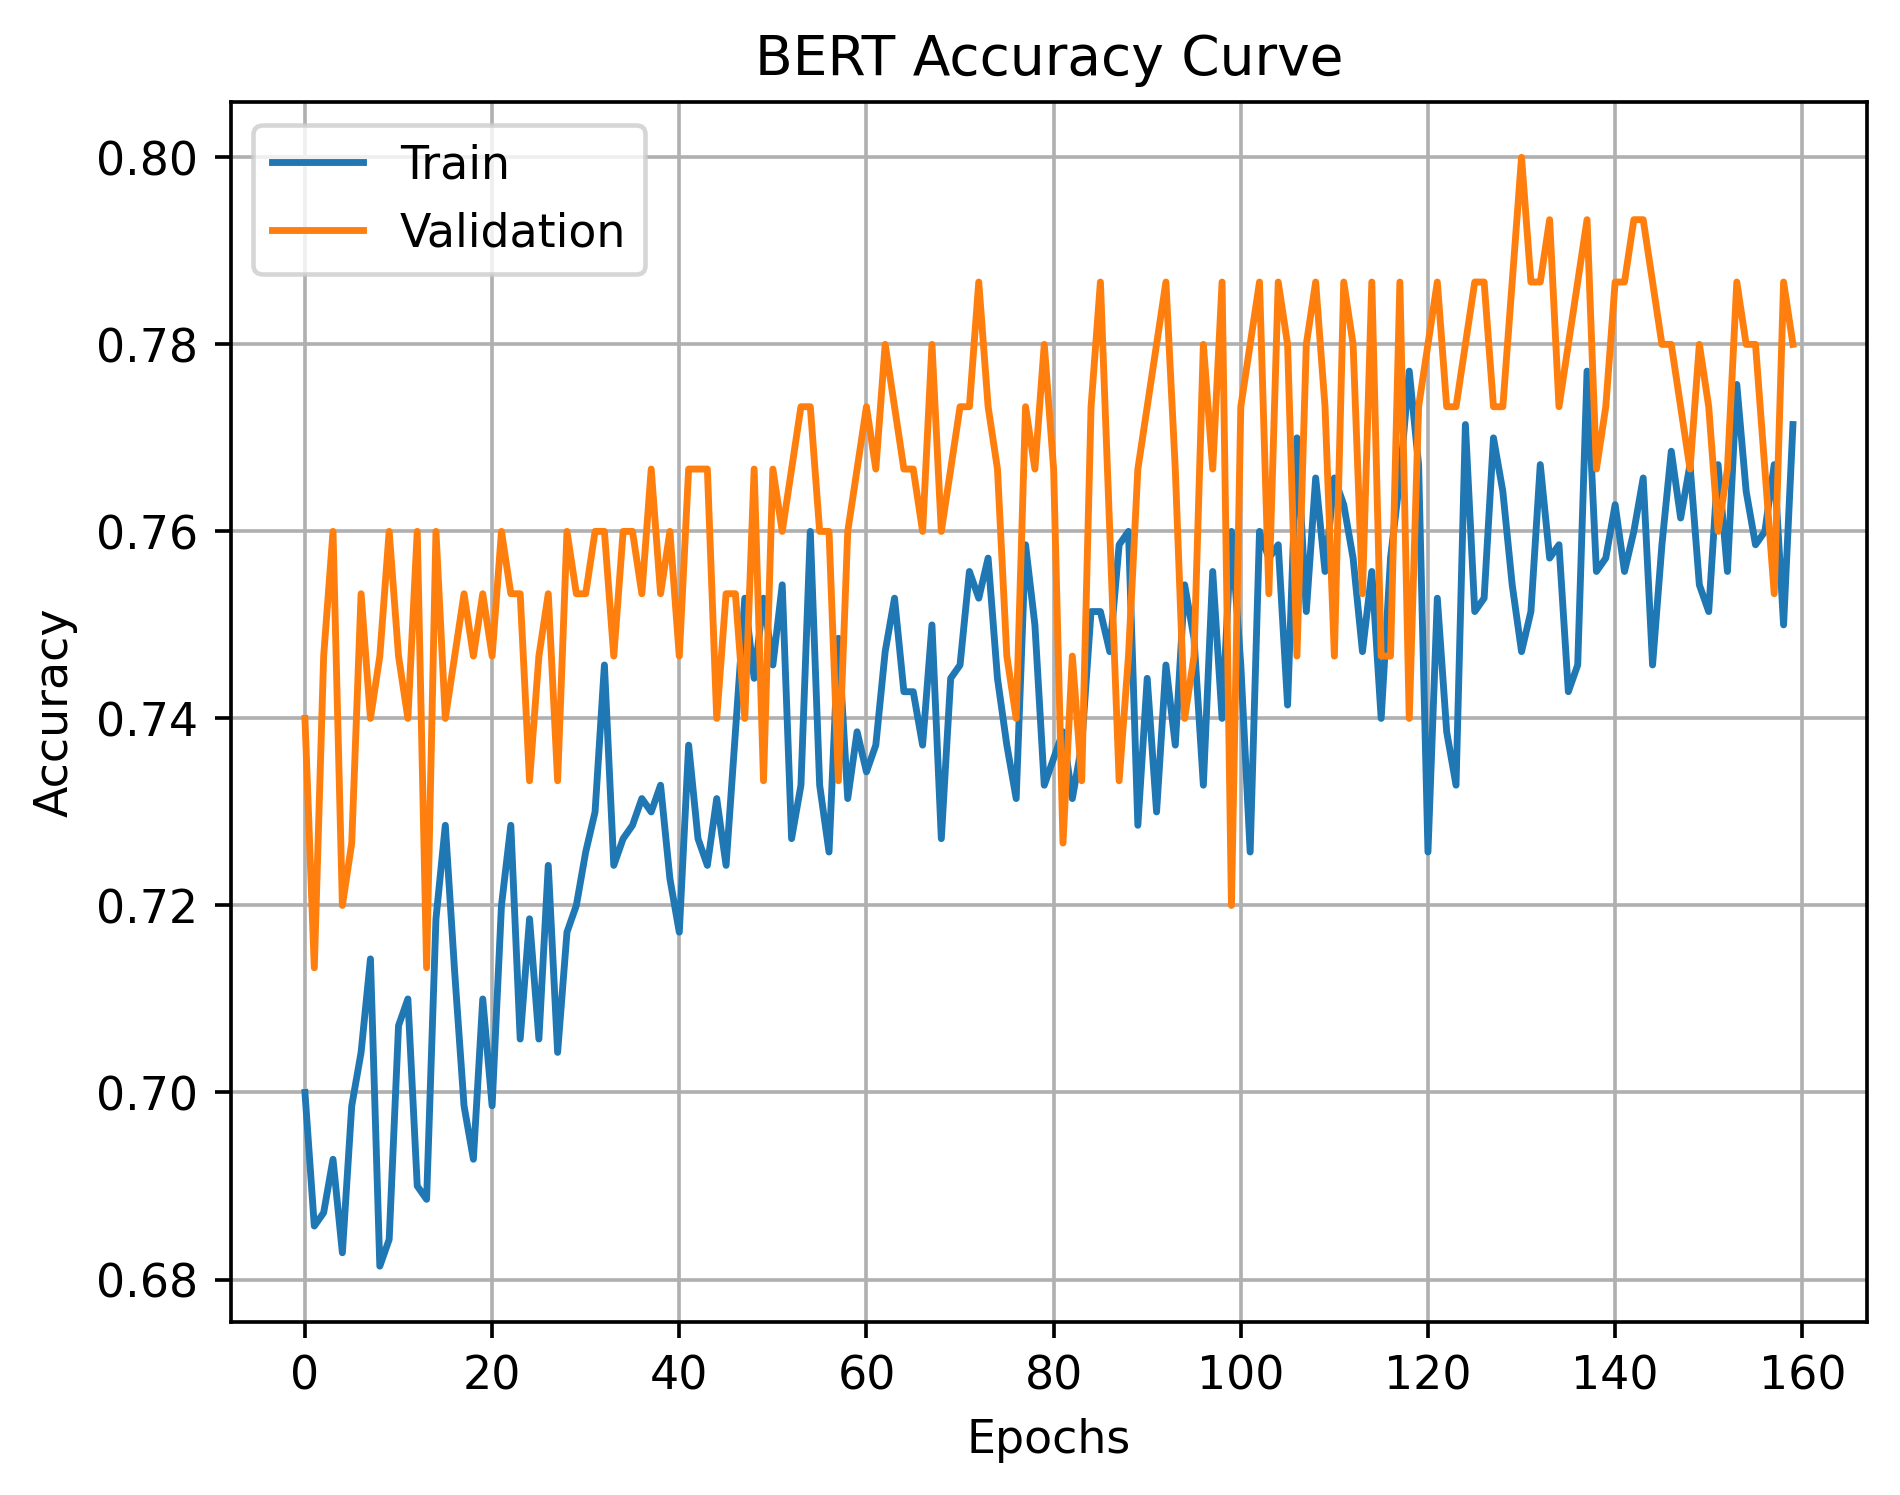

In [254]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 330

plt.plot(train_losses1, label="Train")
plt.plot(valid_losses1, label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("BERT Loss Curve")
plt.legend()
plt.grid()
plt.show()

plt.plot(train_acces1, label="Train")
plt.plot(valid_acces1, label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("BERT Accuracy Curve")
plt.legend()
plt.grid()
plt.show()

In [255]:
print(cr1)

{'0': {'precision': 0.7183098591549296, 'recall': 0.7083333333333334, 'f1-score': 0.7132867132867133, 'support': 72}, '1': {'precision': 0.7341772151898734, 'recall': 0.7435897435897436, 'f1-score': 0.7388535031847134, 'support': 78}, 'accuracy': 0.7266666666666667, 'macro avg': {'precision': 0.7262435371724015, 'recall': 0.7259615384615385, 'f1-score': 0.7260701082357134, 'support': 150}, 'weighted avg': {'precision': 0.7265608842931005, 'recall': 0.7266666666666667, 'f1-score': 0.7265814440336733, 'support': 150}}


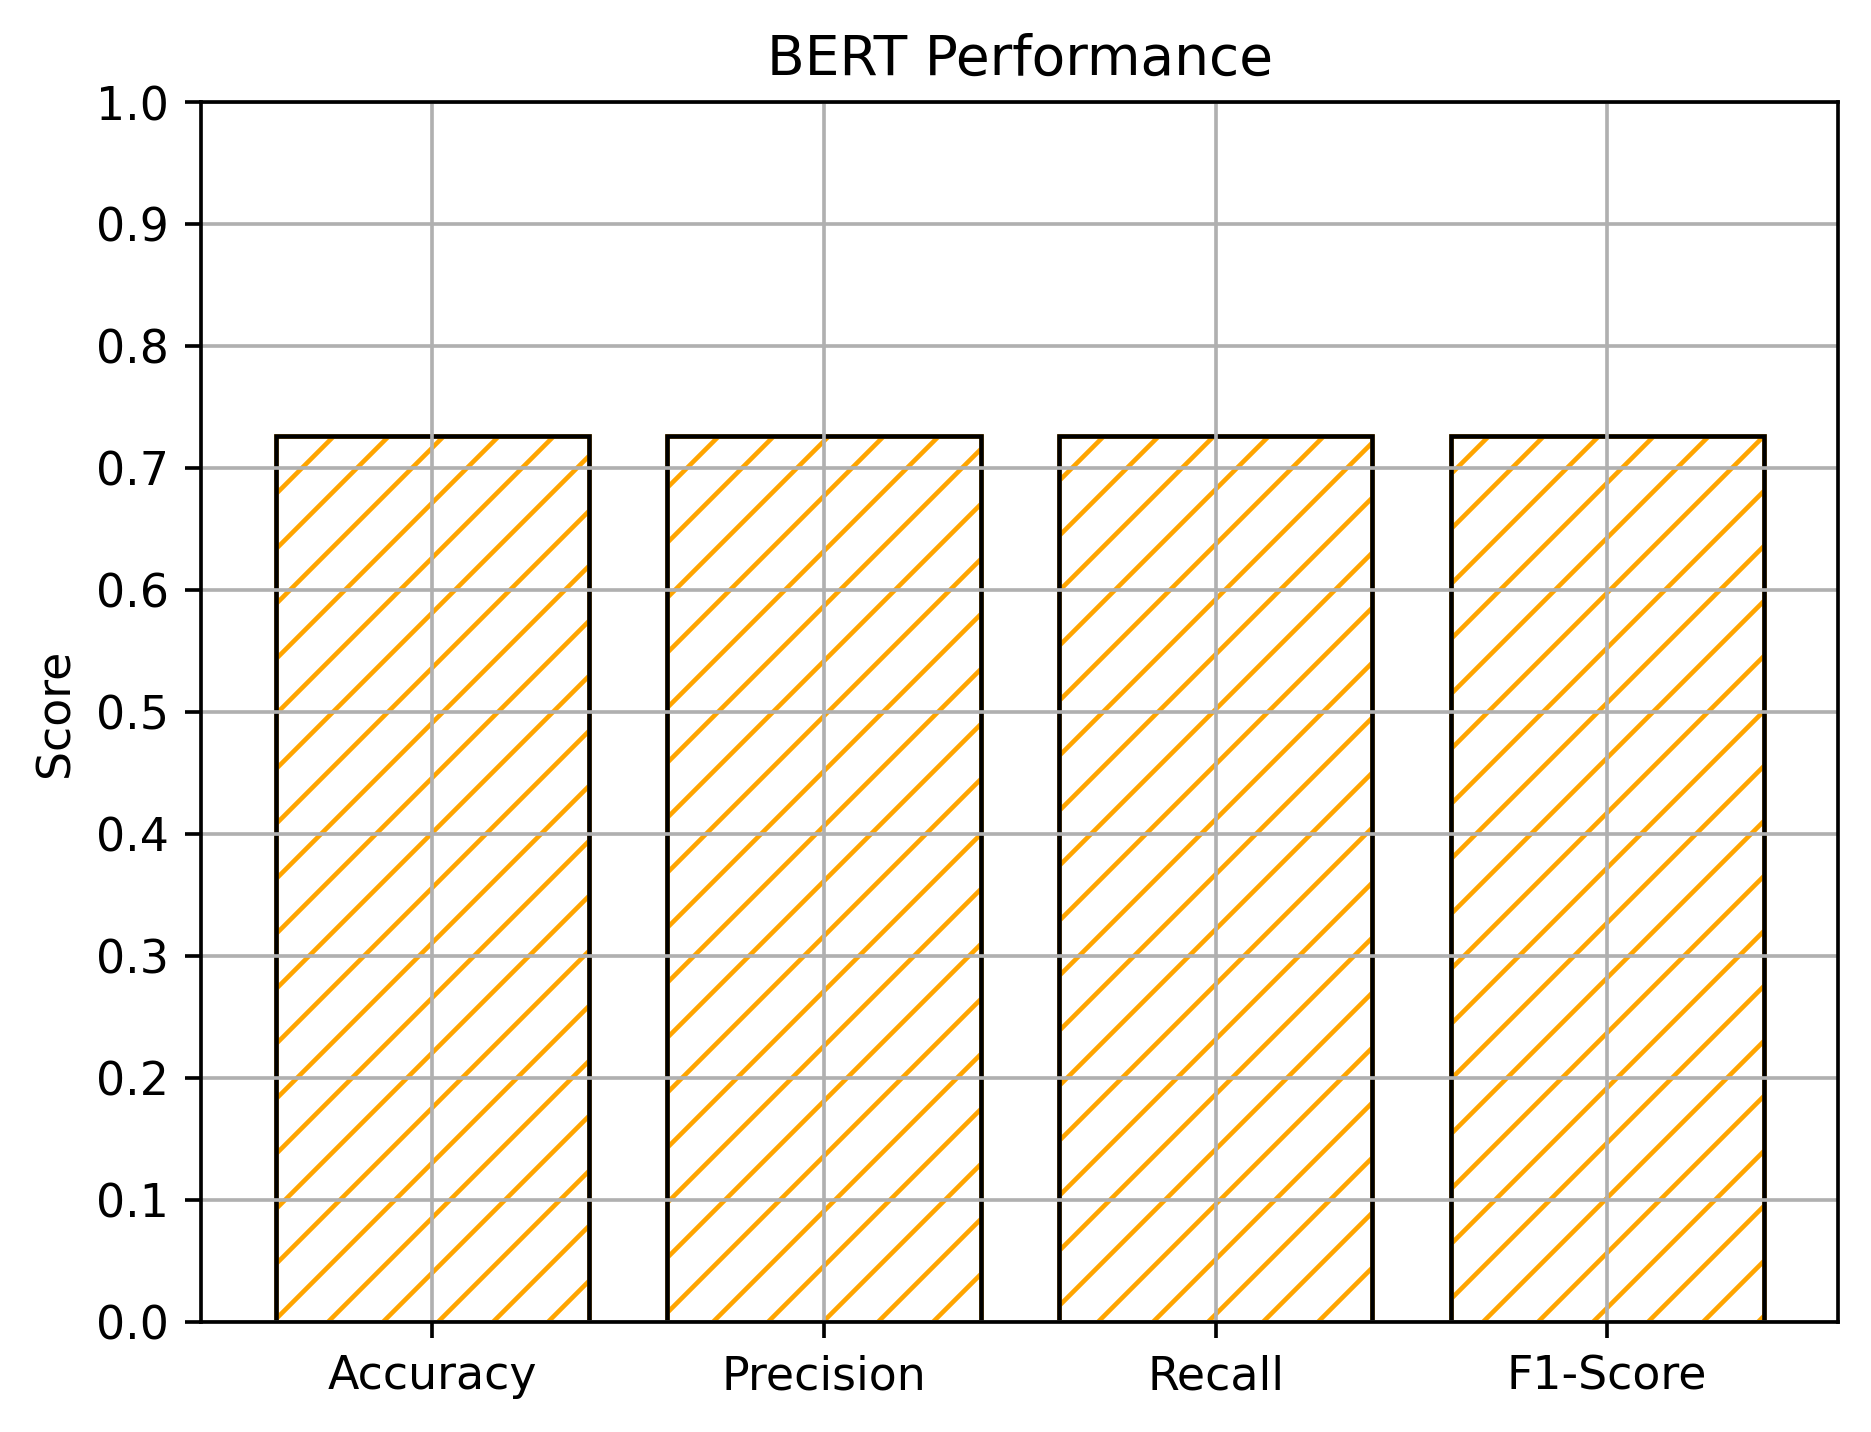

In [256]:
params = ["Accuracy", "Precision", "Recall", "F1-Score"]
results = [cr1['accuracy'], 
           cr1['macro avg']['precision'], 
           cr1['macro avg']['recall'], 
           cr1['macro avg']['f1-score'],
           ]

plt.grid()
plt.bar(params,results, hatch="//", edgecolor="orange", color="white")
plt.bar(params,results, edgecolor="black", fill = False)
plt.ylabel("Score")
plt.ylim(0,1)
plt.yticks(np.arange(0,1.1,0.1))
plt.title("BERT Performance")
plt.show()


In [257]:
preds1

array([[-0.06912512, -2.7062006 ],
       [-0.48163545, -0.9617386 ],
       [-0.5137744 , -0.9118839 ],
       [-1.355008  , -0.2983323 ],
       [-3.2211814 , -0.04072605],
       [-1.0306091 , -0.44128332],
       [-0.13091029, -2.0979838 ],
       [-2.683128  , -0.070797  ],
       [-0.05529184, -2.9226482 ],
       [-0.9783675 , -0.47148365],
       [-0.06192997, -2.812557  ],
       [-1.30691   , -0.3156086 ],
       [-1.0132936 , -0.45101917],
       [-1.1044004 , -0.40258357],
       [-3.0436668 , -0.04883292],
       [-0.98375213, -0.46825397],
       [-1.4231615 , -0.27568895],
       [-0.04498454, -3.1238441 ],
       [-0.19632691, -1.7245324 ],
       [-0.21015908, -1.6631305 ],
       [-0.46079004, -0.9963763 ],
       [-1.5385113 , -0.24169017],
       [-3.6986907 , -0.02506748],
       [-1.3406686 , -0.30336535],
       [-0.74239695, -0.64620966],
       [-0.46338856, -0.9919525 ],
       [-0.24449693, -1.5283115 ],
       [-1.1281908 , -0.39099768],
       [-1.2873402 ,

<Axes: xlabel='zeros', ylabel='ones'>

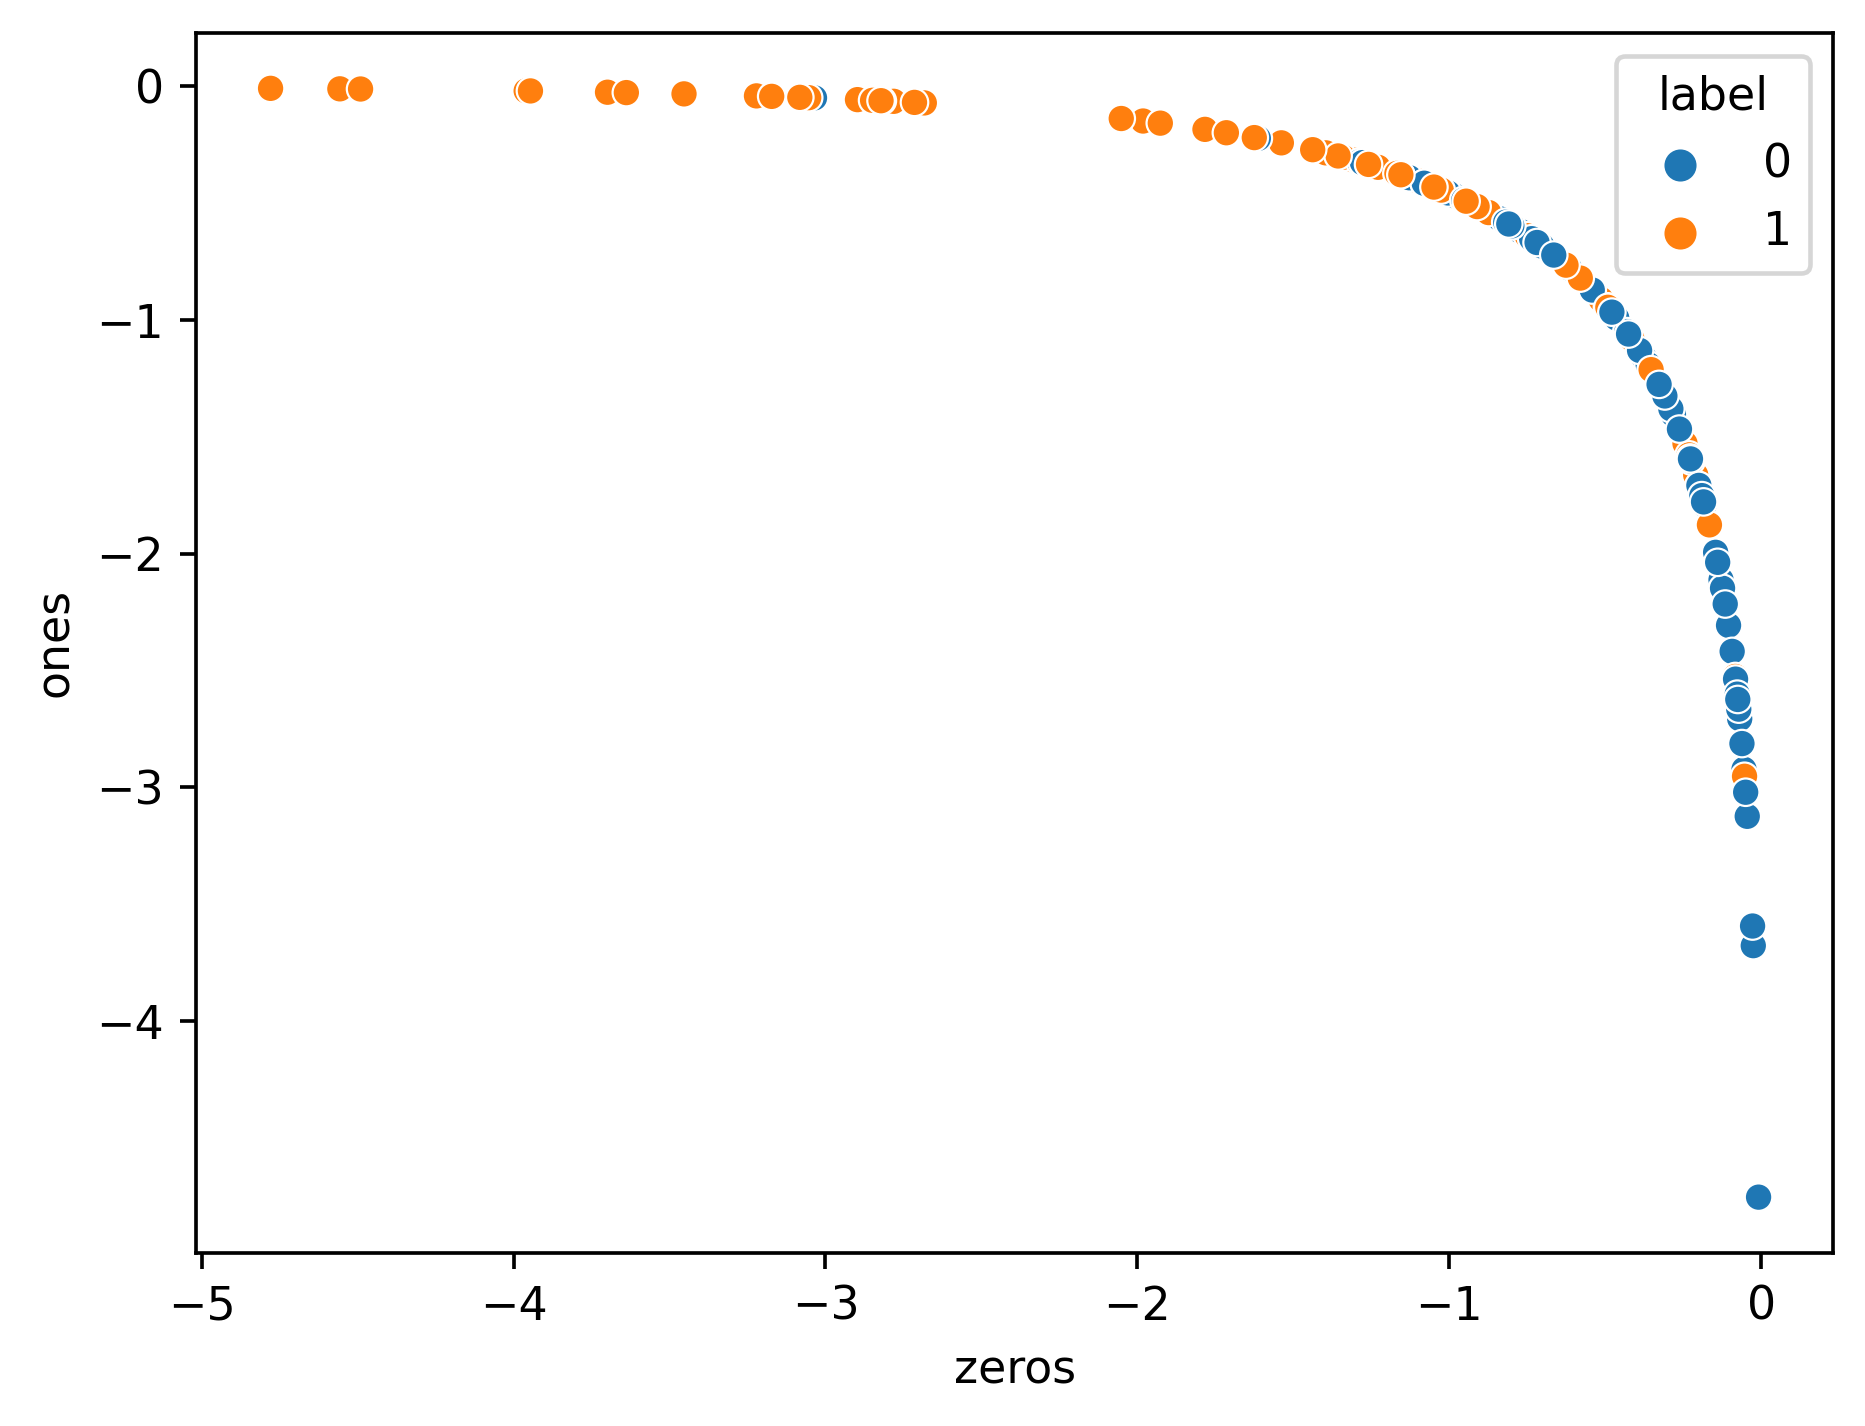

In [258]:
import seaborn

dfnew = pd.DataFrame(preds1)

dfnew.columns = ["zeros", "ones"]

dfnew['label'] = pd.DataFrame(test_y)


 
seaborn.scatterplot(x="zeros",
                    y="ones",
                    hue="label",
                    # style="event",
                    data=dfnew)

In [259]:
# train_seq = torch.tensor(tokens_train['input_ids'])
# train_mask = torch.tensor(tokens_train['attention_mask'])

with torch.no_grad():
    preds3 = model(train_seq.to(device), train_mask.to(device))
    # preds3 = model(train_seq, train_mask)
    preds3 = preds3.detach().cpu().numpy()

In [260]:
with torch.no_grad():
    preds4 = model(val_seq.to(device), val_mask.to(device))
    # preds4 = model(val_seq, val_mask)
    preds4 = preds4.detach().cpu().numpy()

In [261]:
from sklearn.model_selection import train_test_split

X_train, y_train= preds3, train_y

X_val, X_test, y_val, y_test = preds4, preds1, val_y, test_y

In [262]:
print(y_train.shape)

y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(y_train.shape)

torch.Size([700])
torch.Size([700, 1])


In [263]:
from sklearn.preprocessing import OneHotEncoder

# y_train = y_train.reshape()

encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train)
y_val = encoder.fit_transform(y_val)
y_test = encoder.transform(y_test)

# print(y_train)
# print(y_test)

In [264]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(traind['label'].nunique(), activation='softmax'))

In [265]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [266]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_val, y_val),
                    batch_size=10)

Epoch 1/100
70/70 [==============================] - 2s 7ms/step - loss: 0.5977 - accuracy: 0.7700 - val_loss: 0.5836 - val_accuracy: 0.7800
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 0.5293 - accuracy: 0.8229 - val_loss: 0.5407 - val_accuracy: 0.7800
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 0.4796 - accuracy: 0.8243 - val_loss: 0.5122 - val_accuracy: 0.7867
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4478 - accuracy: 0.8214 - val_loss: 0.4964 - val_accuracy: 0.7867
Epoch 5/100
70/70 [==============================] - 1s 8ms/step - loss: 0.4296 - accuracy: 0.8186 - val_loss: 0.4884 - val_accuracy: 0.7867
Epoch 6/100
70/70 [==============================] - 1s 10ms/step - loss: 0.4188 - accuracy: 0.8214 - val_loss: 0.4849 - val_accuracy: 0.7867
Epoch 7/100
70/70 [==============================] - 0s 6ms/step - loss: 0.4130 - accuracy: 0.8214 - val_loss: 0.4838 - val_accuracy: 0.7867
Epoch 8/100


In [267]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8214
Validation Accuracy:  0.7800
Testing Accuracy:  0.7400


In [268]:
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.grid()
    plt.legend()

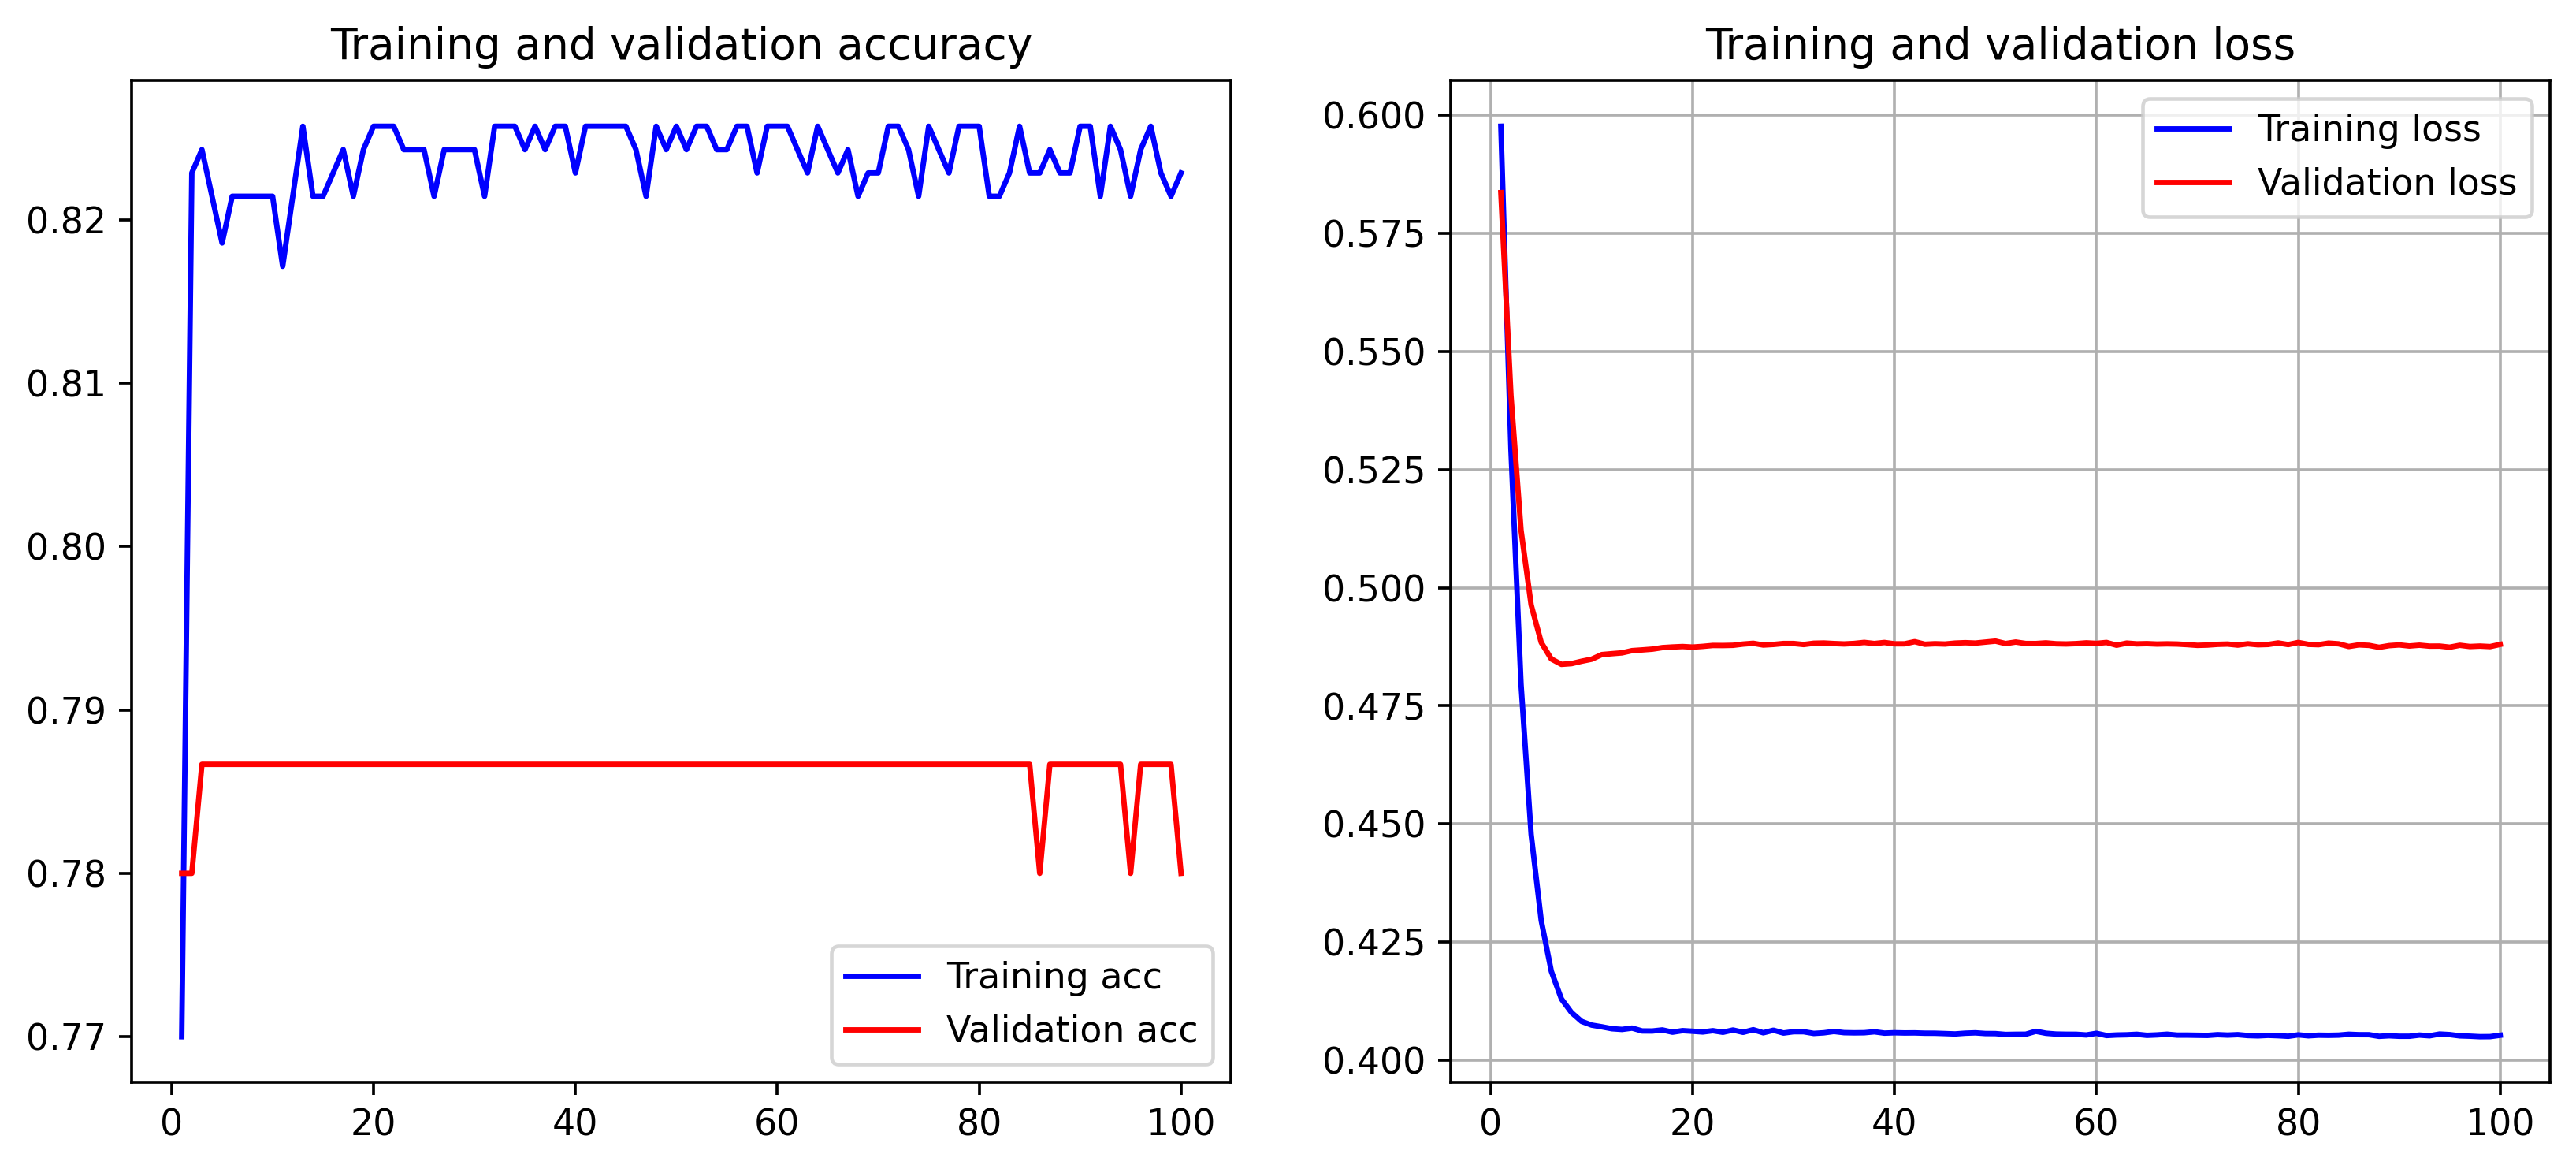

In [269]:
plot_history(history)

In [270]:
preds2 = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [271]:
y_test = encoder.inverse_transform(y_test)

In [272]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

# model's performance
preds22 = np.argmax(preds2, axis = 1)
print(confusion_matrix(y_test, preds22))
print(classification_report(y_test, preds22))

# print()
crz = classification_report(y_test, preds22, output_dict=True)

[[51 21]
 [18 60]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72        72
           1       0.74      0.77      0.75        78

    accuracy                           0.74       150
   macro avg       0.74      0.74      0.74       150
weighted avg       0.74      0.74      0.74       150



In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

y_train1 = encoder.inverse_transform(y_train)

classifier = LogisticRegression()
classifier.fit(X_train, y_train1)
score = classifier.score(X_train, y_train1)

print("Accuracy:", score)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

clf = RandomForestClassifier()
clf.fit(X_train, y_train1)
score = classifier.score(X_train, y_train1)

print("Accuracy:", score)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train1)
score = classifier.score(X_train, y_train1)

print("Accuracy:", score)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8228571428571428
Accuracy: 0.7466666666666667


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-273-6f24ac92e131>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train1)


Accuracy: 0.8228571428571428
Accuracy: 0.7466666666666667
Accuracy: 0.8228571428571428
Accuracy: 0.7466666666666667


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [274]:
print(traind)

                                                   text  label
2499  it would take a complete moron to foul up a sc...      1
8033  so we got ten little indians meets friday the ...      0
6808  unfortunately , heartbreak hospital wants to c...      0
6057  sustains its dreamlike glide through a success...      0
6631  a modest and messy metaphysical thriller offer...      0
...                                                 ...    ...
710   this is carion's debut feature but his script ...      1
6441  i've heard that the fans of the first men in b...      0
5353  the film doesn't have enough innovation or piz...      0
6735  too silly to be frightening , too stolid to be...      0
4696  it makes me feel weird / thinking about all th...      0

[700 rows x 2 columns]


In [360]:
from sklearn.model_selection import train_test_split

sentences = traind['text'].values
y = traind['label'].values

# sentences_train, sentences_test, y_train, y_test = train_test_split(
#    sentences, y, test_size=0.15, random_state=2018)

sentences_train, y_train = sentences, y

sentences_val, sentences_test, y_val, y_test = train_test_split(
   testd['text'].values, testd['label'].values, test_size=0.5, random_state=42, 
   stratify=testd['label'].values,
   )

In [361]:
print(sentences_val)

[". . . you can be forgiven for realizing that you've spent the past 20 minutes looking at your watch and waiting for frida to just die already ."
 'proves a lovely trifle that , unfortunately , is a little too in love with its own cuteness .'
 "although estela bravo's documentary is cloyingly hagiographic in its portrait of cuban leader fidel castro , it's still a guilty pleasure to watch ."
 'more successful at relating history than in creating an emotionally complex , dramatically satisfying heroine'
 'rashomon-for-dipsticks tale .'
 "a visionary marvel , but it's lacking a depth in storytelling usually found in anime like this ."
 'did we really need a remake of " charade ? "'
 "bang ! zoom ! it's actually pretty funny , but in all the wrong places ."
 'death to smoochy tells a moldy-oldie , not-nearly -as-nasty -as-it- thinks-it-is joke . over and over again .'
 'the entire movie is filled with deja vu moments .'
 'a marvelous performance by allison lohman as an identity-seeking f

In [362]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_val  = vectorizer.transform(sentences_val)
X_test  = vectorizer.transform(sentences_test)
X_train

<700x4019 sparse matrix of type '<class 'numpy.int64'>'
	with 11902 stored elements in Compressed Sparse Row format>

In [363]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.6266666666666667


In [364]:
print(y_train.shape)

y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(y_train.shape)

(700,)
(700, 1)


In [365]:
from sklearn.preprocessing import OneHotEncoder

# y_train = y_train.reshape()

encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train)
y_val = encoder.fit_transform(y_val)
y_test = encoder.transform(y_test)

# print(y_train)
# print(y_test)

In [366]:
print(X_train.shape[1])

4019


In [367]:
# from keras.models import Sequential
# from keras import layers

# input_dim = X_train.shape[1]  # Number of features

# model = Sequential()
# model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
# model.add(layers.Dense(traind['label'].nunique(), activation='softmax'))

In [368]:
# model.compile(loss='binary_crossentropy', 
#               optimizer='adam', 
#               metrics=['accuracy'])
# model.summary()

In [369]:
# history = model.fit(X_train, y_train,
#                     epochs=20,
#                     verbose=True,
#                     validation_data=(X_val, y_val),
#                     batch_size=10)

In [370]:
# loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
# print("Validation Accuracy:  {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

In [371]:
# plot_history(history)

In [372]:
# preds2 = model.predict(X_test)

In [373]:
# y_test = encoder.inverse_transform(y_test)

In [374]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# import numpy as np

# # model's performance
# preds22 = np.argmax(preds2, axis = 1)
# print(confusion_matrix(y_test, preds22))
# print(classification_report(y_test, preds22))

# # print()
# crz = classification_report(y_test, preds22, output_dict=True)

In [375]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_val = tokenizer.texts_to_sequences(sentences_val)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])
print(vocab_size)

unfortunately , heartbreak hospital wants to convey the same kind of haughtiness in its own sketchy material but this territory has already been explored previously with better aplomb and sardonic wit .
[500, 1352, 1353, 720, 5, 721, 1, 129, 87, 4, 1354, 7, 15, 88, 1355, 240, 13, 17, 1356, 31, 501, 74, 722, 1357, 11, 157, 1358, 3, 1359, 368]
4126


In [376]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [377]:
from keras_preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])
print(X_train.shape)

[   9   85  141    2  239 1341    5  715   38    2  174  498    4  716
  717  362  363    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
(700, 100)


In [378]:
# from sklearn.preprocessing import OneHotEncoder

# y_train = y_train.reshape()

# encoder = OneHotEncoder(sparse=False)
# y_train = encoder.fit_transform(y_train)
# y_test = encoder.transform(y_test)

print(y_train.shape)
print(y_test.shape)

(700, 2)
(150, 2)


In [379]:
# from keras.models import Sequential
# from keras import layers

# embedding_dim = 50

# model = Sequential()
# model.add(layers.Embedding(input_dim=vocab_size, 
#                            output_dim=embedding_dim, 
#                            input_length=maxlen))
# model.add(layers.Flatten())
# model.add(layers.Dense(10, activation='relu'))
# model.add(layers.Dense(traind['label'].nunique(), activation='softmax'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.summary()

In [380]:
# history = model.fit(X_train, y_train,
#                     epochs=50,
#                     verbose=True,
#                     validation_data=(X_val, y_val),
#                     batch_size=10)
# loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))
# plot_history(history)

In [381]:
# preds2 = model.predict(X_test)

In [382]:
# y_test = encoder.inverse_transform(y_test)

In [383]:
# from sklearn.metrics import confusion_matrix

# # model's performance
# preds22 = np.argmax(preds2, axis = 1)
# print(confusion_matrix(y_test, preds22))
# print(classification_report(y_test, preds22))

# # print()
# crz = classification_report(y_test, preds22, output_dict=True)

In [384]:
# y_test = encoder.transform(y_test)

print(y_train.shape)
print(y_test.shape)

(700, 2)
(150, 2)


In [385]:
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras.layers.convolutional import Conv1D

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))#, input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(traind['label'].nunique(), activation='softmax'))
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),#
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           206300    
                                                                 
 conv1d_4 (Conv1D)           (None, 98, 64)            9664      
                                                                 
 conv1d_5 (Conv1D)           (None, 96, 64)            12352     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
 dense_9 (Dense)             (None, 2)                 22        
                                                      

Epoch 1/80
70/70 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.4743 - val_loss: 0.6927 - val_accuracy: 0.5867
Epoch 2/80
70/70 [==============================] - 1s 7ms/step - loss: 0.6918 - accuracy: 0.5100 - val_loss: 0.6922 - val_accuracy: 0.5200
Epoch 3/80
70/70 [==============================] - 0s 5ms/step - loss: 0.6895 - accuracy: 0.5043 - val_loss: 0.6918 - val_accuracy: 0.5200
Epoch 4/80
70/70 [==============================] - 0s 5ms/step - loss: 0.6856 - accuracy: 0.5114 - val_loss: 0.6915 - val_accuracy: 0.5200
Epoch 5/80
70/70 [==============================] - 0s 5ms/step - loss: 0.6822 - accuracy: 0.5043 - val_loss: 0.6912 - val_accuracy: 0.5200
Epoch 6/80
70/70 [==============================] - 0s 5ms/step - loss: 0.6778 - accuracy: 0.5043 - val_loss: 0.6910 - val_accuracy: 0.5200
Epoch 7/80
70/70 [==============================] - 0s 5ms/step - loss: 0.6728 - accuracy: 0.5343 - val_loss: 0.6905 - val_accuracy: 0.5200
Epoch 8/80
70/70 [==

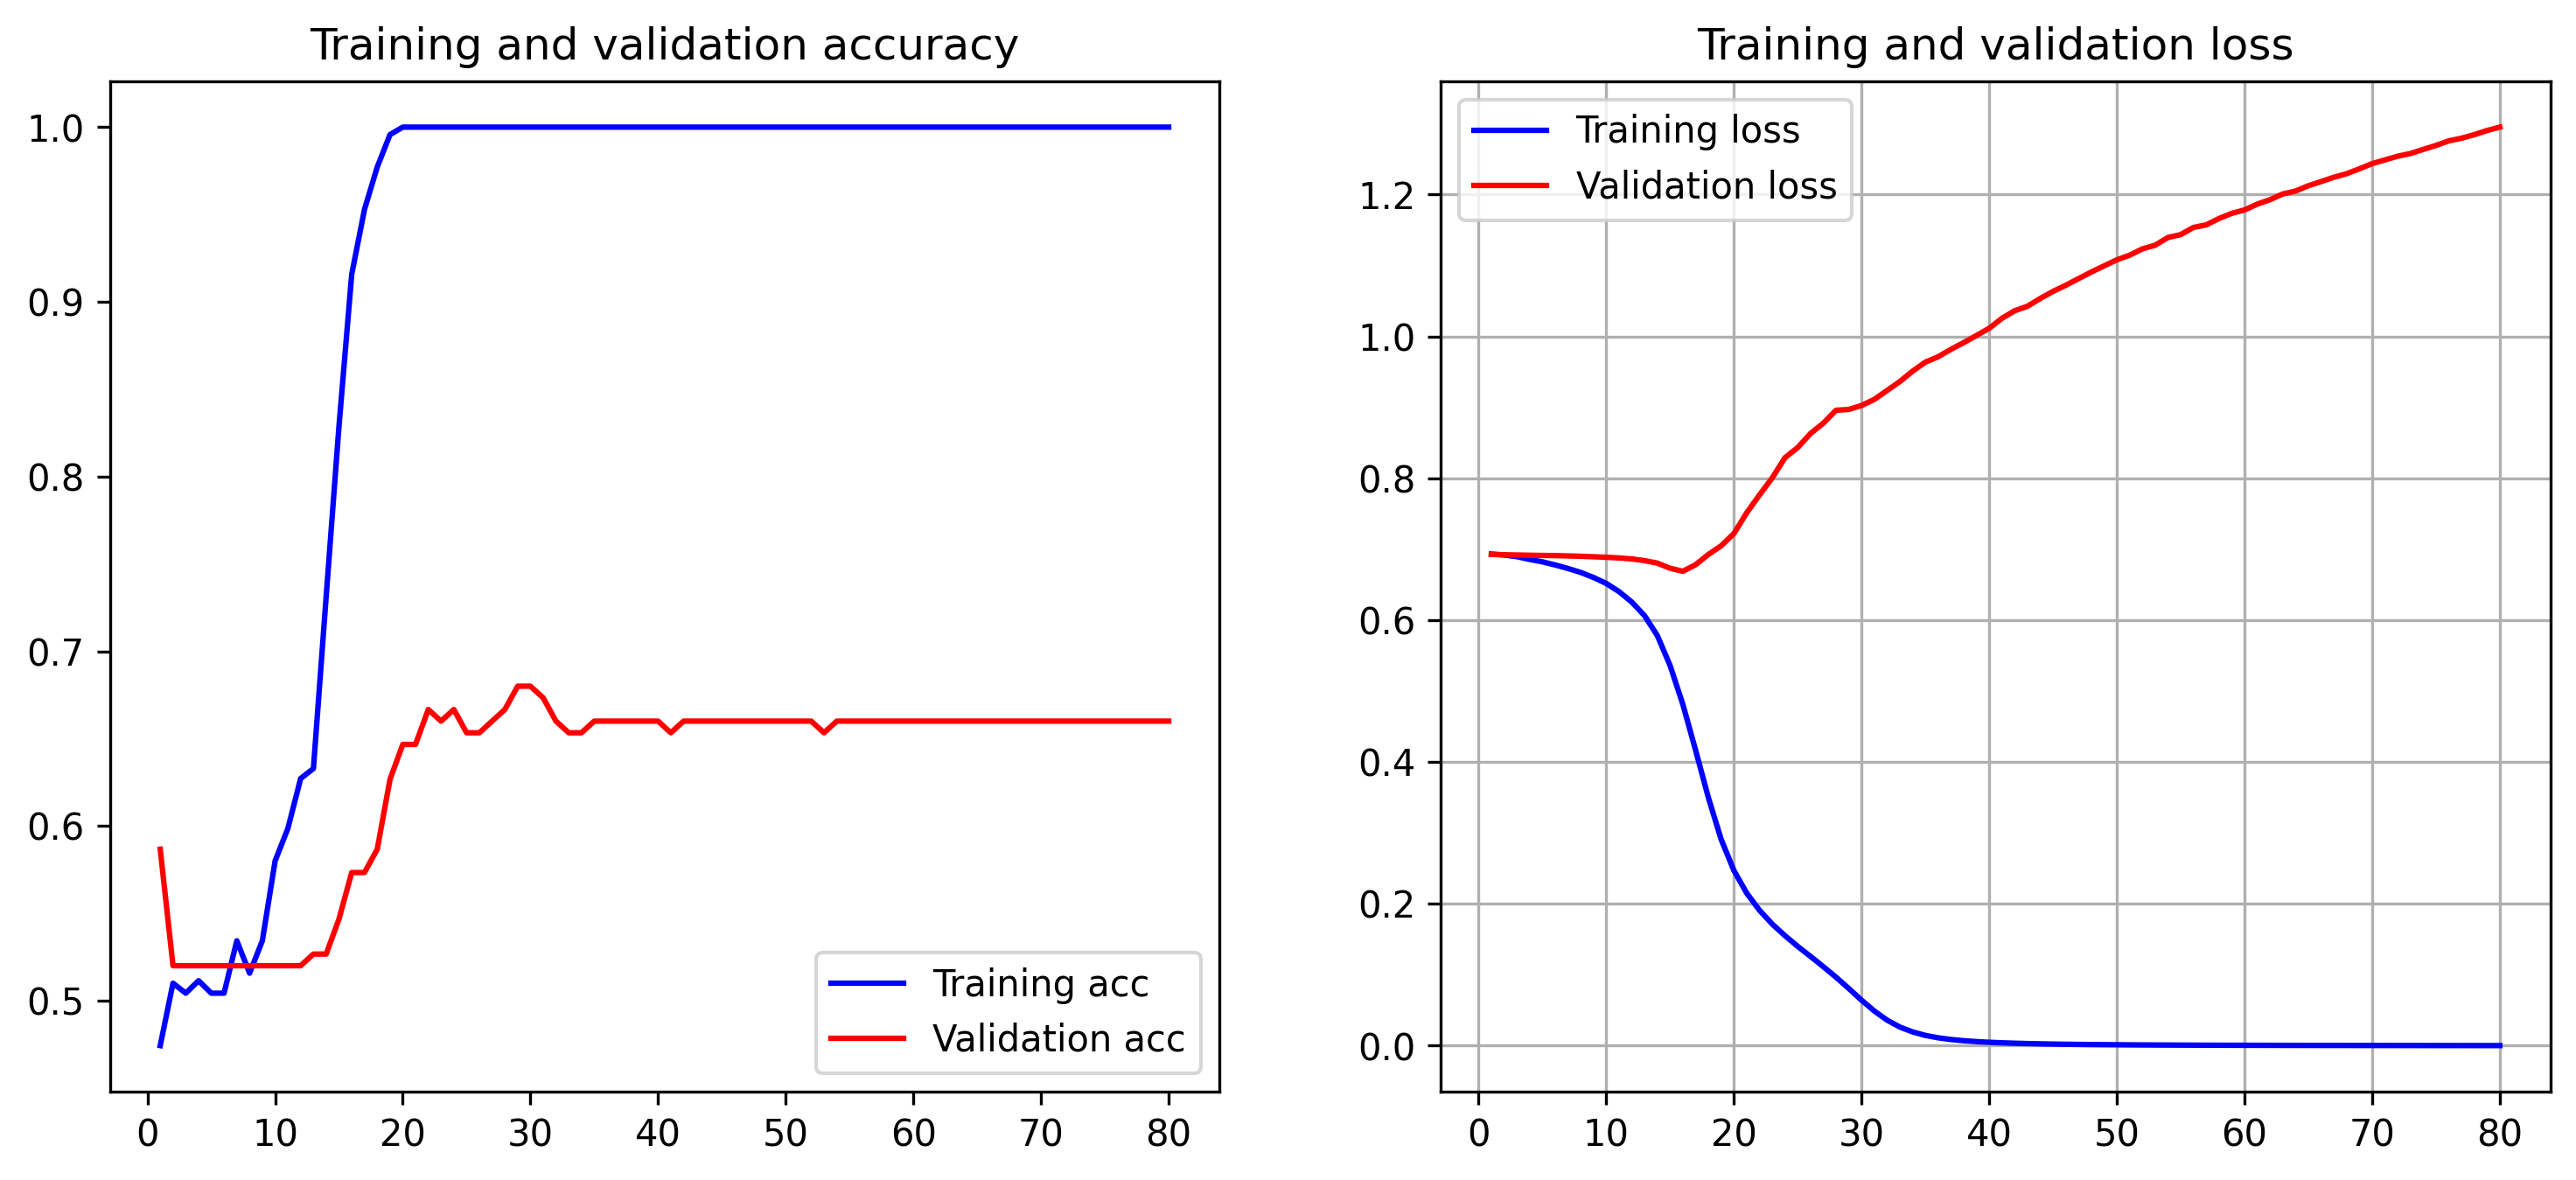

In [386]:
history = model.fit(X_train, y_train,
                    epochs=80,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [387]:
preds2 = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [388]:
y_test = encoder.inverse_transform(y_test)

In [389]:
from sklearn.metrics import confusion_matrix

# model's performance
preds22 = np.argmax(preds2, axis = 1)
print(preds22)

[0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0
 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1
 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1
 1 1]


In [390]:
print(confusion_matrix(y_test, preds22))
print(classification_report(y_test, preds22))

# print()
crz = classification_report(y_test, preds22, output_dict=True)

[[45 27]
 [24 54]]
              precision    recall  f1-score   support

           0       0.65      0.62      0.64        72
           1       0.67      0.69      0.68        78

    accuracy                           0.66       150
   macro avg       0.66      0.66      0.66       150
weighted avg       0.66      0.66      0.66       150



In [391]:
y_test_dnn = y_test

In [392]:
# tweetsDF = pd.read_csv('/content/drive/MyDrive/0. Paper/0. ICoICT 2023/dataset_etle.csv', on_bad_lines='skip', delimiter=',', encoding = "ISO-8859-1")
tweetsDF = traind
tweetsDF = pd.concat([tweetsDF,testd],axis=0)
tweetsDF.head()

text  label
2499  it would take a complete moron to foul up a sc...      1
8033  so we got ten little indians meets friday the ...      0
6808  unfortunately , heartbreak hospital wants to c...      0
6057  sustains its dreamlike glide through a success...      0
6631  a modest and messy metaphysical thriller offer...      0

In [393]:
tweetsDF

text  label
2499  it would take a complete moron to foul up a sc...      1
8033  so we got ten little indians meets friday the ...      0
6808  unfortunately , heartbreak hospital wants to c...      0
6057  sustains its dreamlike glide through a success...      0
6631  a modest and messy metaphysical thriller offer...      0
...                                                 ...    ...
602   in moonlight mile , no one gets shut out of th...      0
998   while the new film is much more eye-catching t...      0
249   a deliciously nonsensical comedy about a city ...      1
591   while it's all quite tasteful to look at , the...      0
429   this fascinating look at israel in ferment fee...      1

[1000 rows x 2 columns]

##Translate Data
tahapan selanjutnya akan dilakukan translate data dari bahasa indonesia ke english(US).

In [394]:
import nltk
import re 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
# import snscrape.modules.twitter as sntwitter
from nltk.tokenize import word_tokenize
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
# import translators as ts
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import seaborn as sns
from sklearn import svm
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix as cm
import matplotlib.ticker as mtick
# from tpot import TPOTClassifier
from textblob import TextBlob
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib as mpl

In [395]:
print(f"data has {tweetsDF.duplicated().sum()} duplicated data")
print(f"data has \n{tweetsDF.isnull().sum()} \nnull data")

data has 0 duplicated data
data has 
text     0
label    0
dtype: int64 
null data


In [396]:
tweetsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 2499 to 429
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


In [397]:
def pre_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    tweet = re.sub('https', ' ', tweet)
    tweet = re.sub('@[^\s]+',' ',tweet)
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = tweet.strip('\'"')
    return tweet

In [398]:
tweetsDF['translate'] = tweetsDF['text']

max Tweet_content len: 49


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


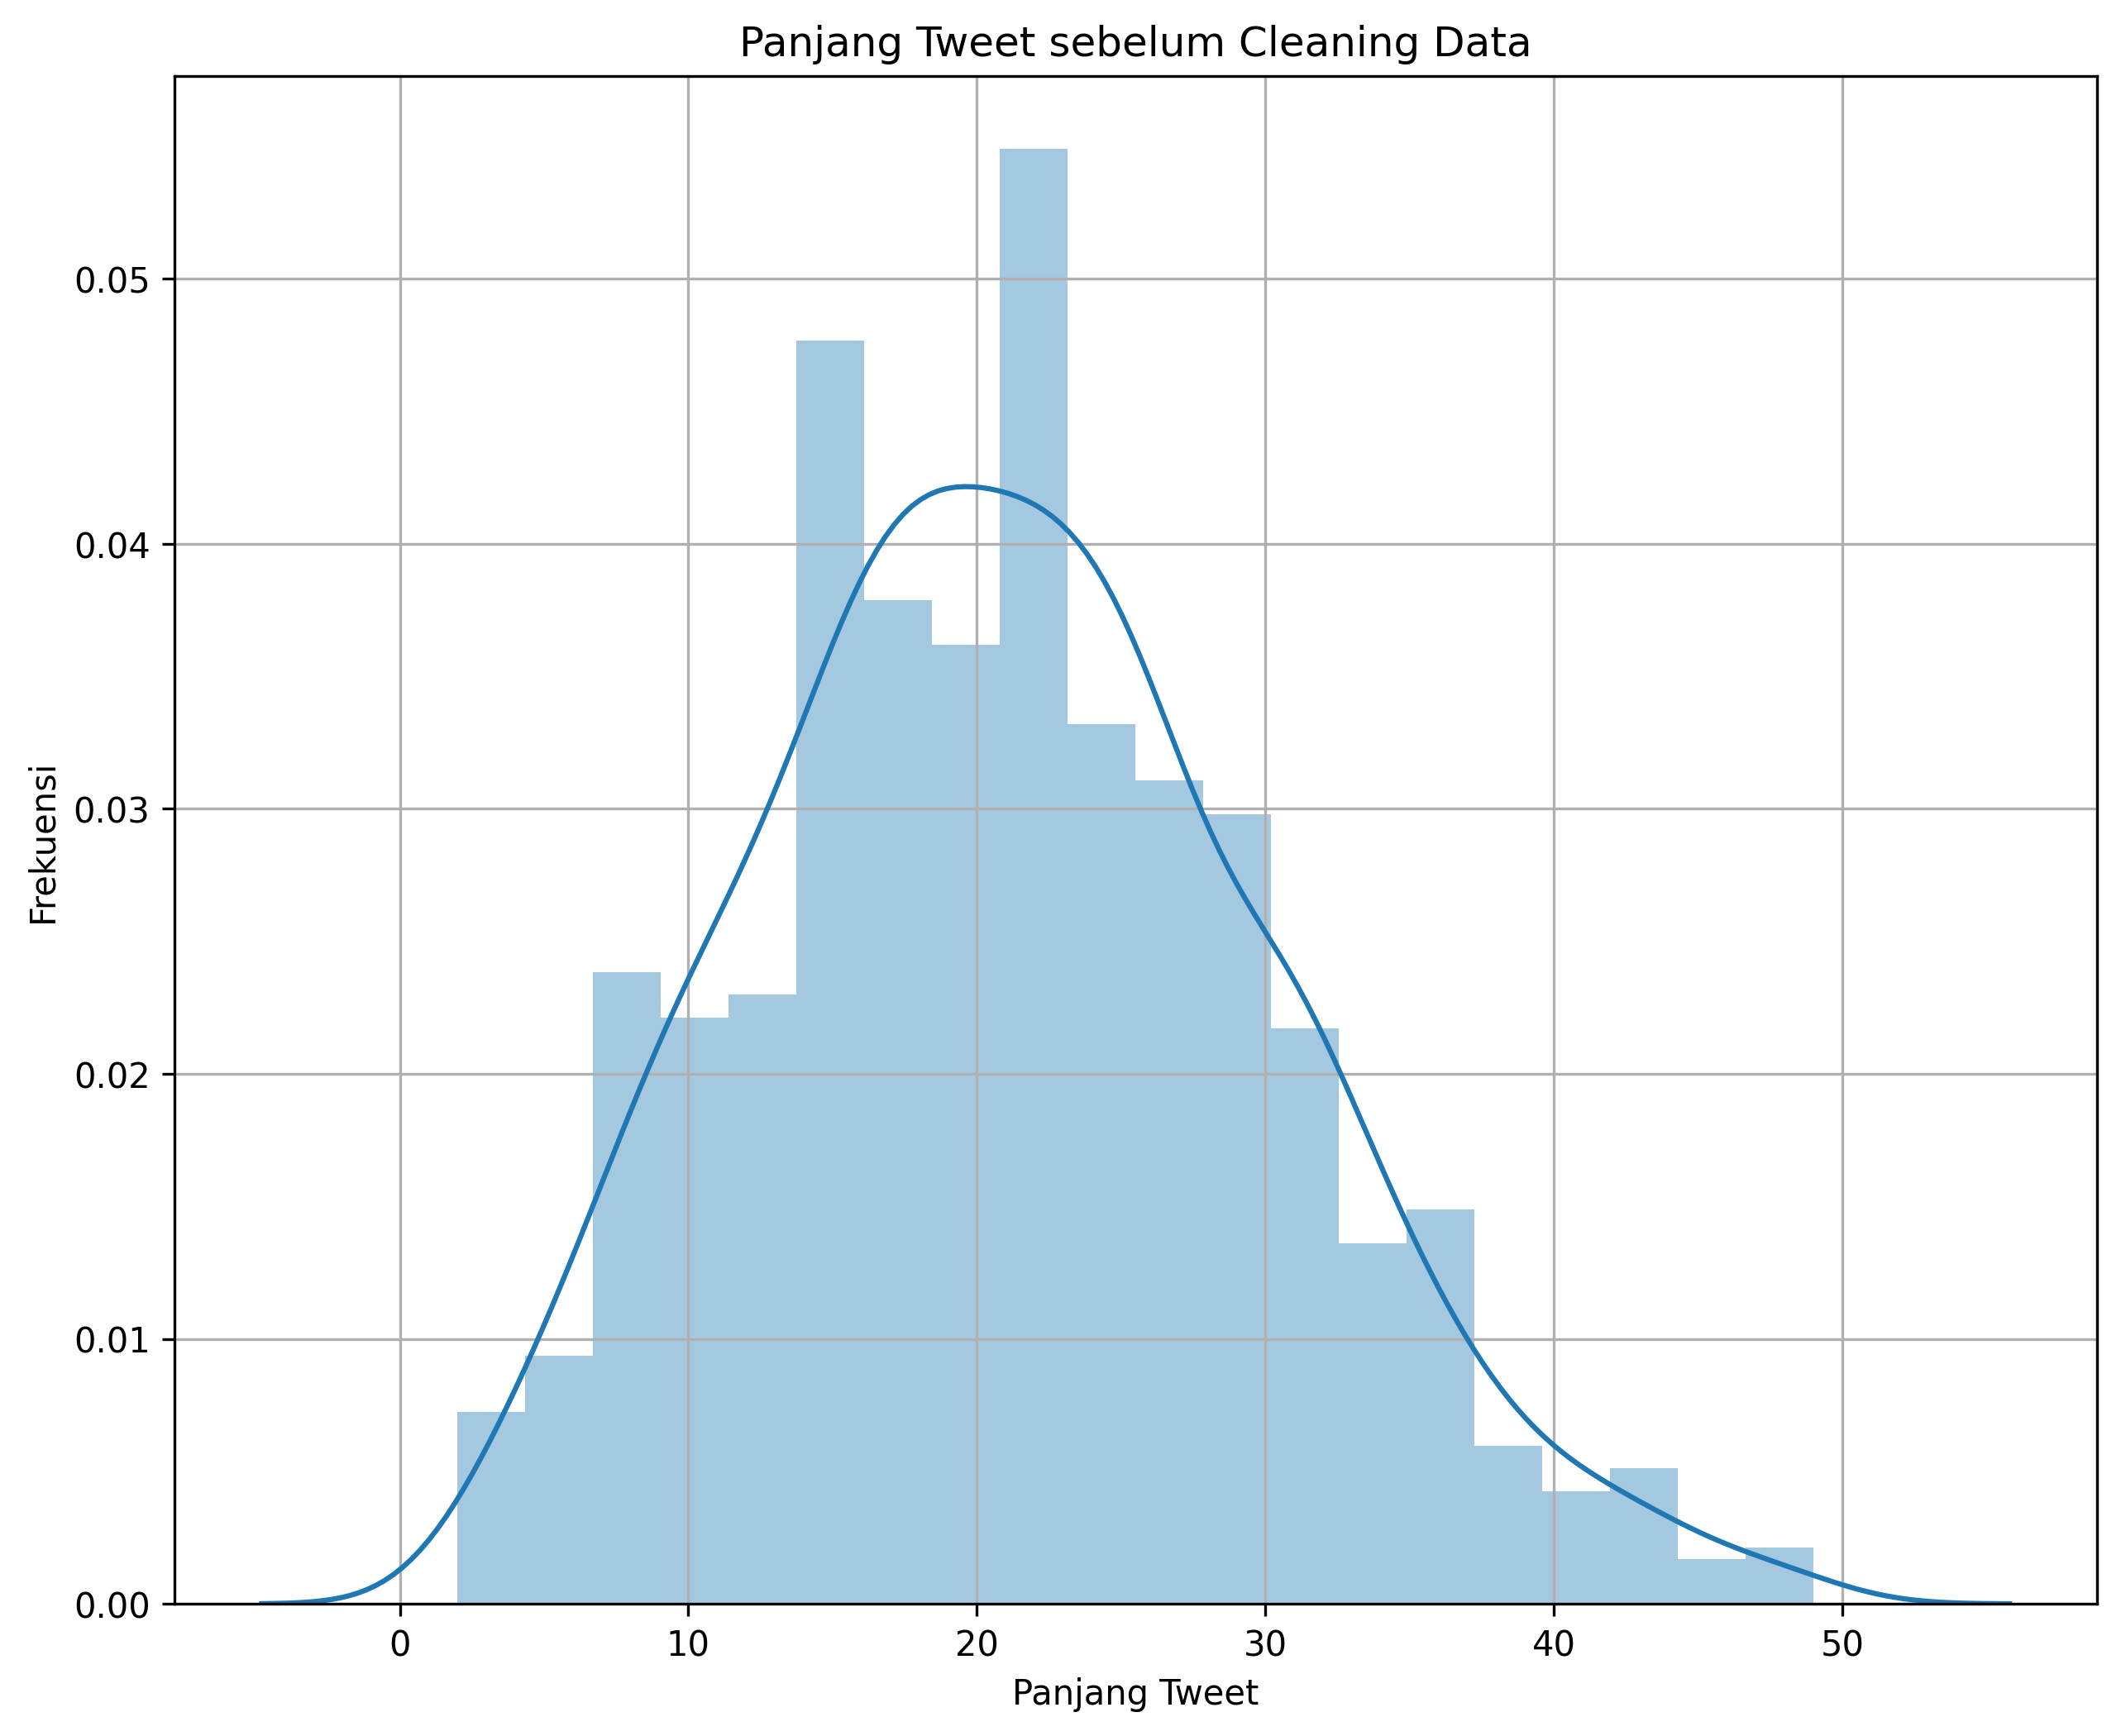

In [399]:
Tweet_content_len1 = tweetsDF['translate'].apply(lambda p: len(p.split(' ')))
max_Tweet_content_len = Tweet_content_len1.max()
print('max Tweet_content len: {0}'.format(max_Tweet_content_len))
plt.figure(figsize = (10, 8))
sns.distplot(Tweet_content_len1)
plt.title('Distribusi Panjang Tweet')
plt.xlabel('Panjang Tweet')
plt.ylabel('Frekuensi')
plt.title('Panjang Tweet sebelum Cleaning Data')
plt.grid()

In [400]:
tweetsDF['translate'].replace(regex=True, to_replace=['ð'], value='', inplace=True)

In [401]:
tweetsDF['translate'] = tweetsDF['translate'].apply(lambda x : pre_processing(x))
tweetsDF.head()

text  label  \
2499  it would take a complete moron to foul up a sc...      1   
8033  so we got ten little indians meets friday the ...      0   
6808  unfortunately , heartbreak hospital wants to c...      0   
6057  sustains its dreamlike glide through a success...      0   
6631  a modest and messy metaphysical thriller offer...      0   

                                              translate  
2499  it would take a complete moron to foul up a sc...  
8033  so we got ten little indians meets friday the ...  
6808  unfortunately  heartbreak hospital wants to co...  
6057  sustains its dreamlike glide through a success...  
6631  a modest and messy metaphysical thriller offer...

max Tweet_content len: 49


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


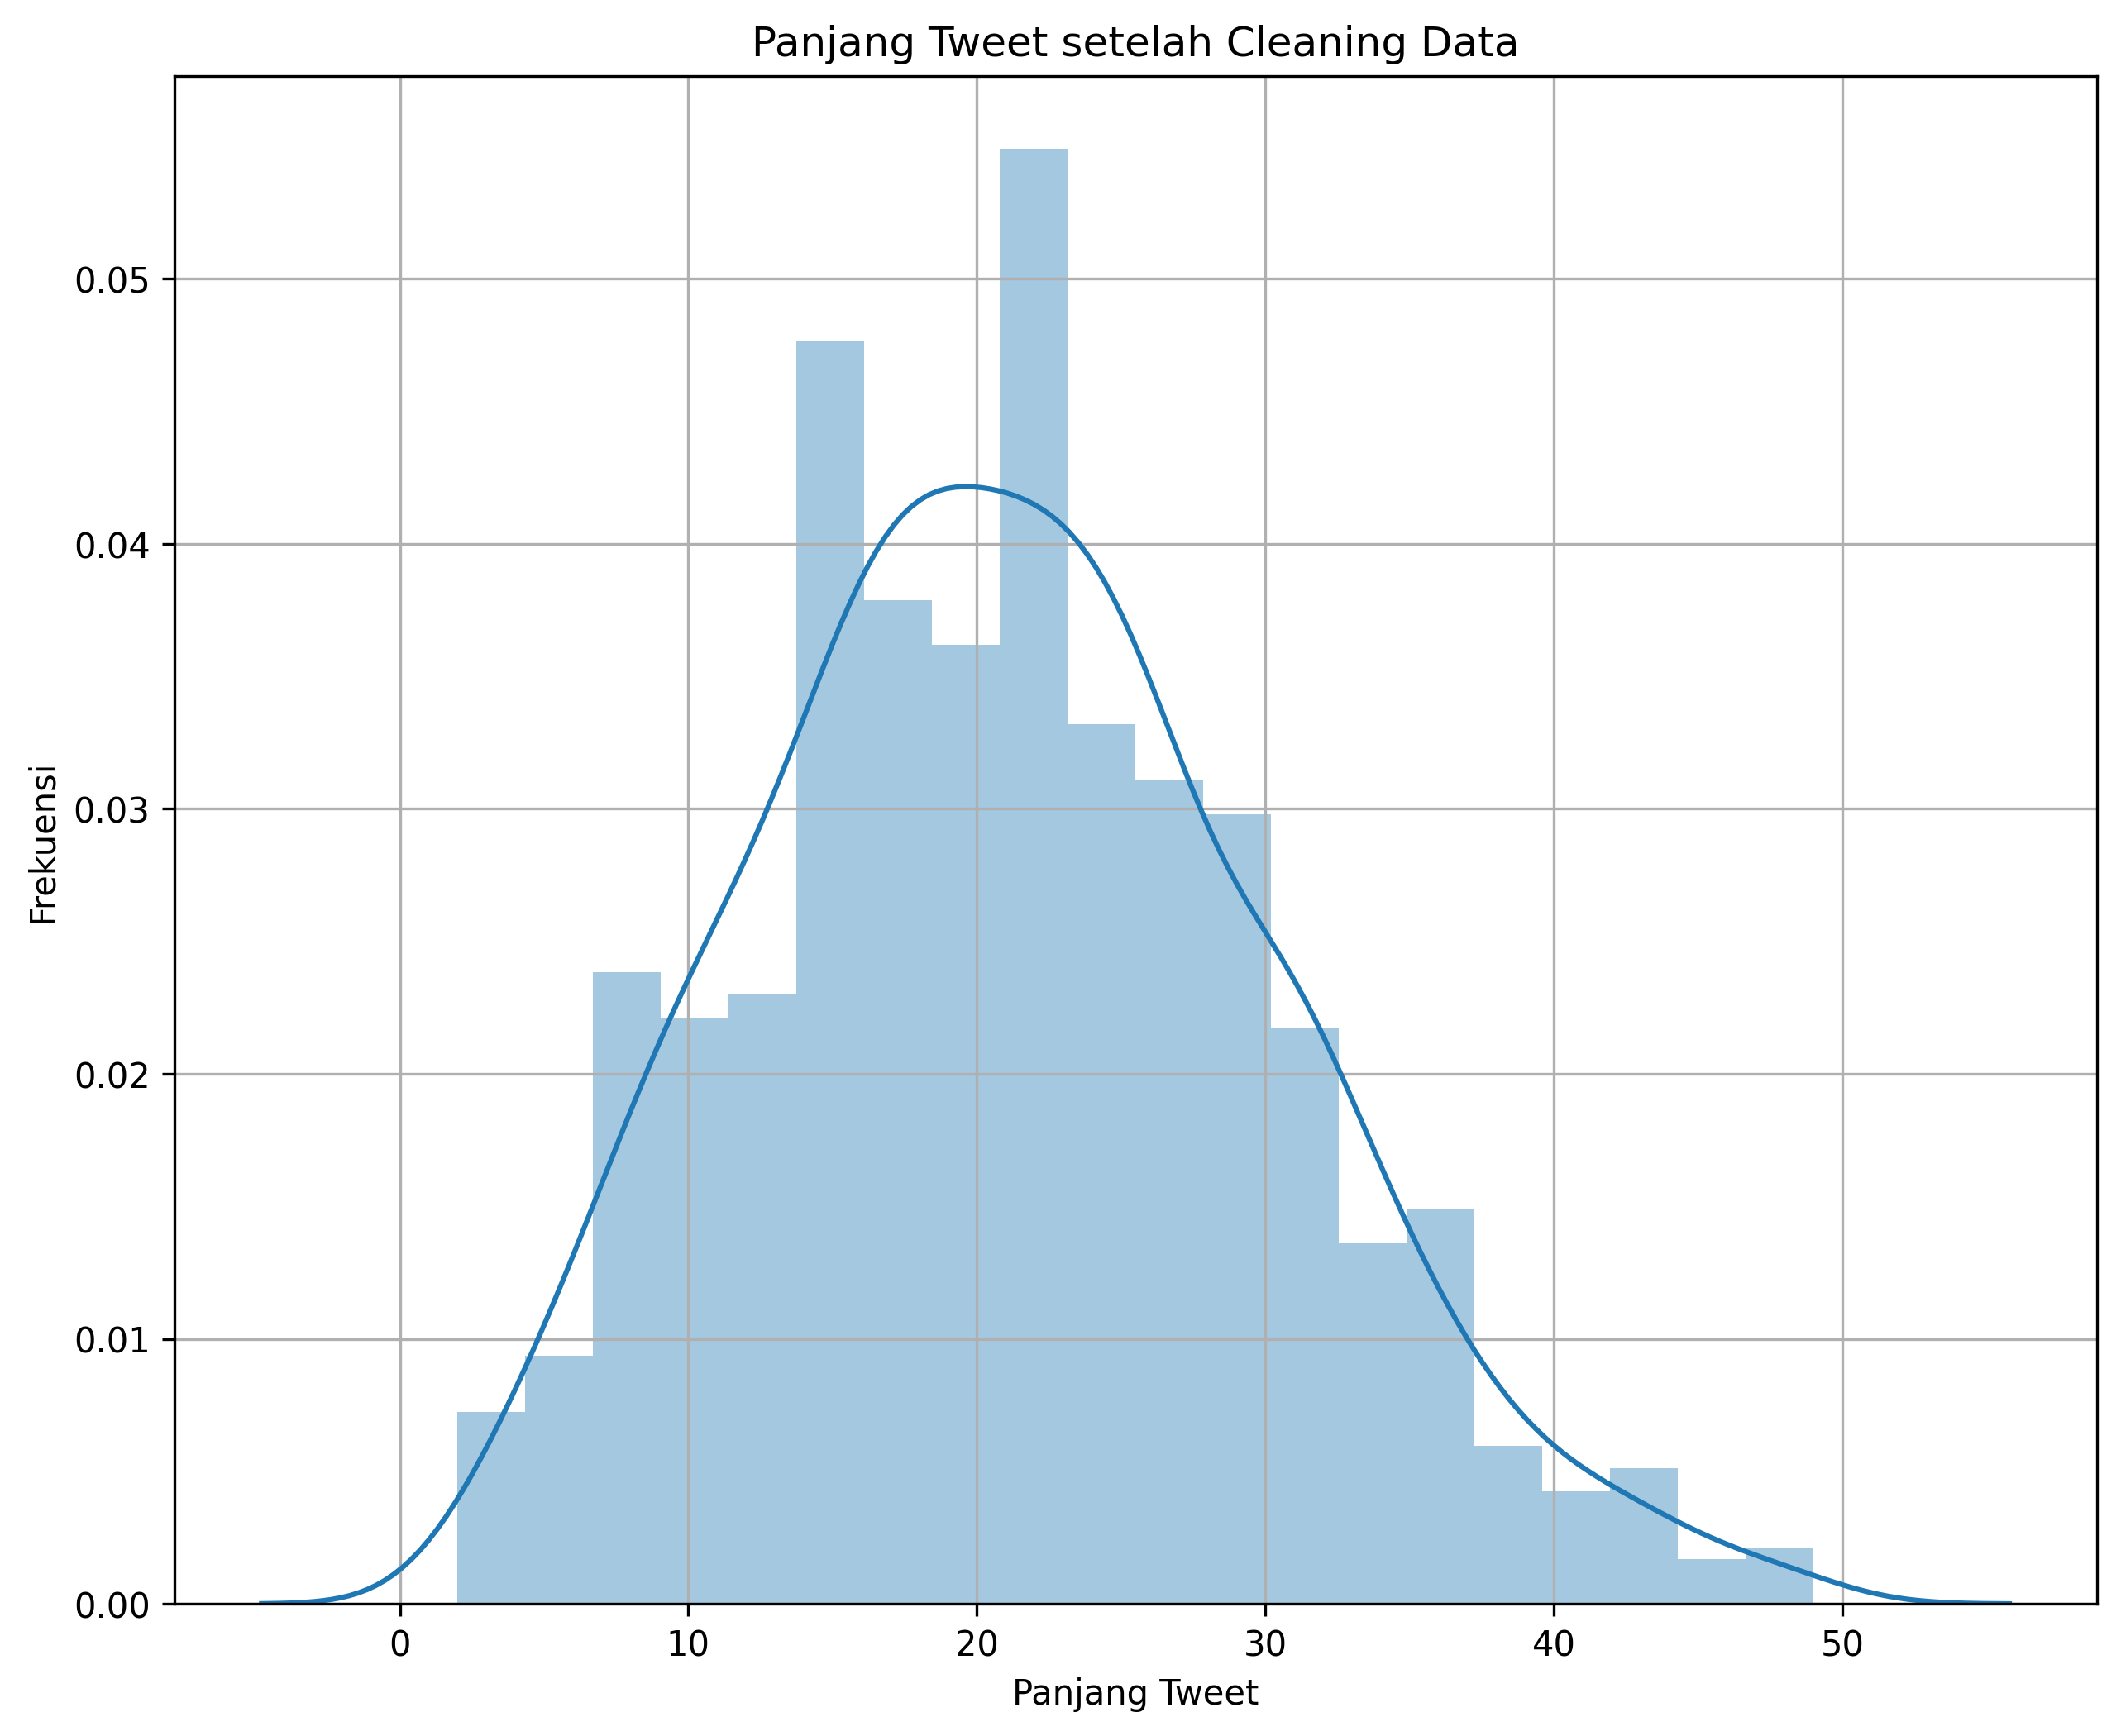

In [402]:
Tweet_content_len2 = tweetsDF['translate'].apply(lambda p: len(p.split(' ')))
max_Tweet_content_len = Tweet_content_len2.max()
print('max Tweet_content len: {0}'.format(max_Tweet_content_len))
plt.figure(figsize = (10, 8))
sns.distplot(Tweet_content_len2)
plt.title('Distribusi Panjang Tweet')
plt.xlabel('Panjang Tweet')
plt.ylabel('Frekuensi')
plt.title('Panjang Tweet setelah Cleaning Data')
plt.grid()

In [403]:
from scipy import stats

stats1, pvalue = stats.ttest_ind(Tweet_content_len1, Tweet_content_len2)

stats.ttest_ind(Tweet_content_len1, Tweet_content_len2)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [404]:
print(Tweet_content_len1.mean())
print(Tweet_content_len1.std())
print(Tweet_content_len2.mean())
print(Tweet_content_len2.std())

21.308
9.010567480815308
21.308
9.010567480815308


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


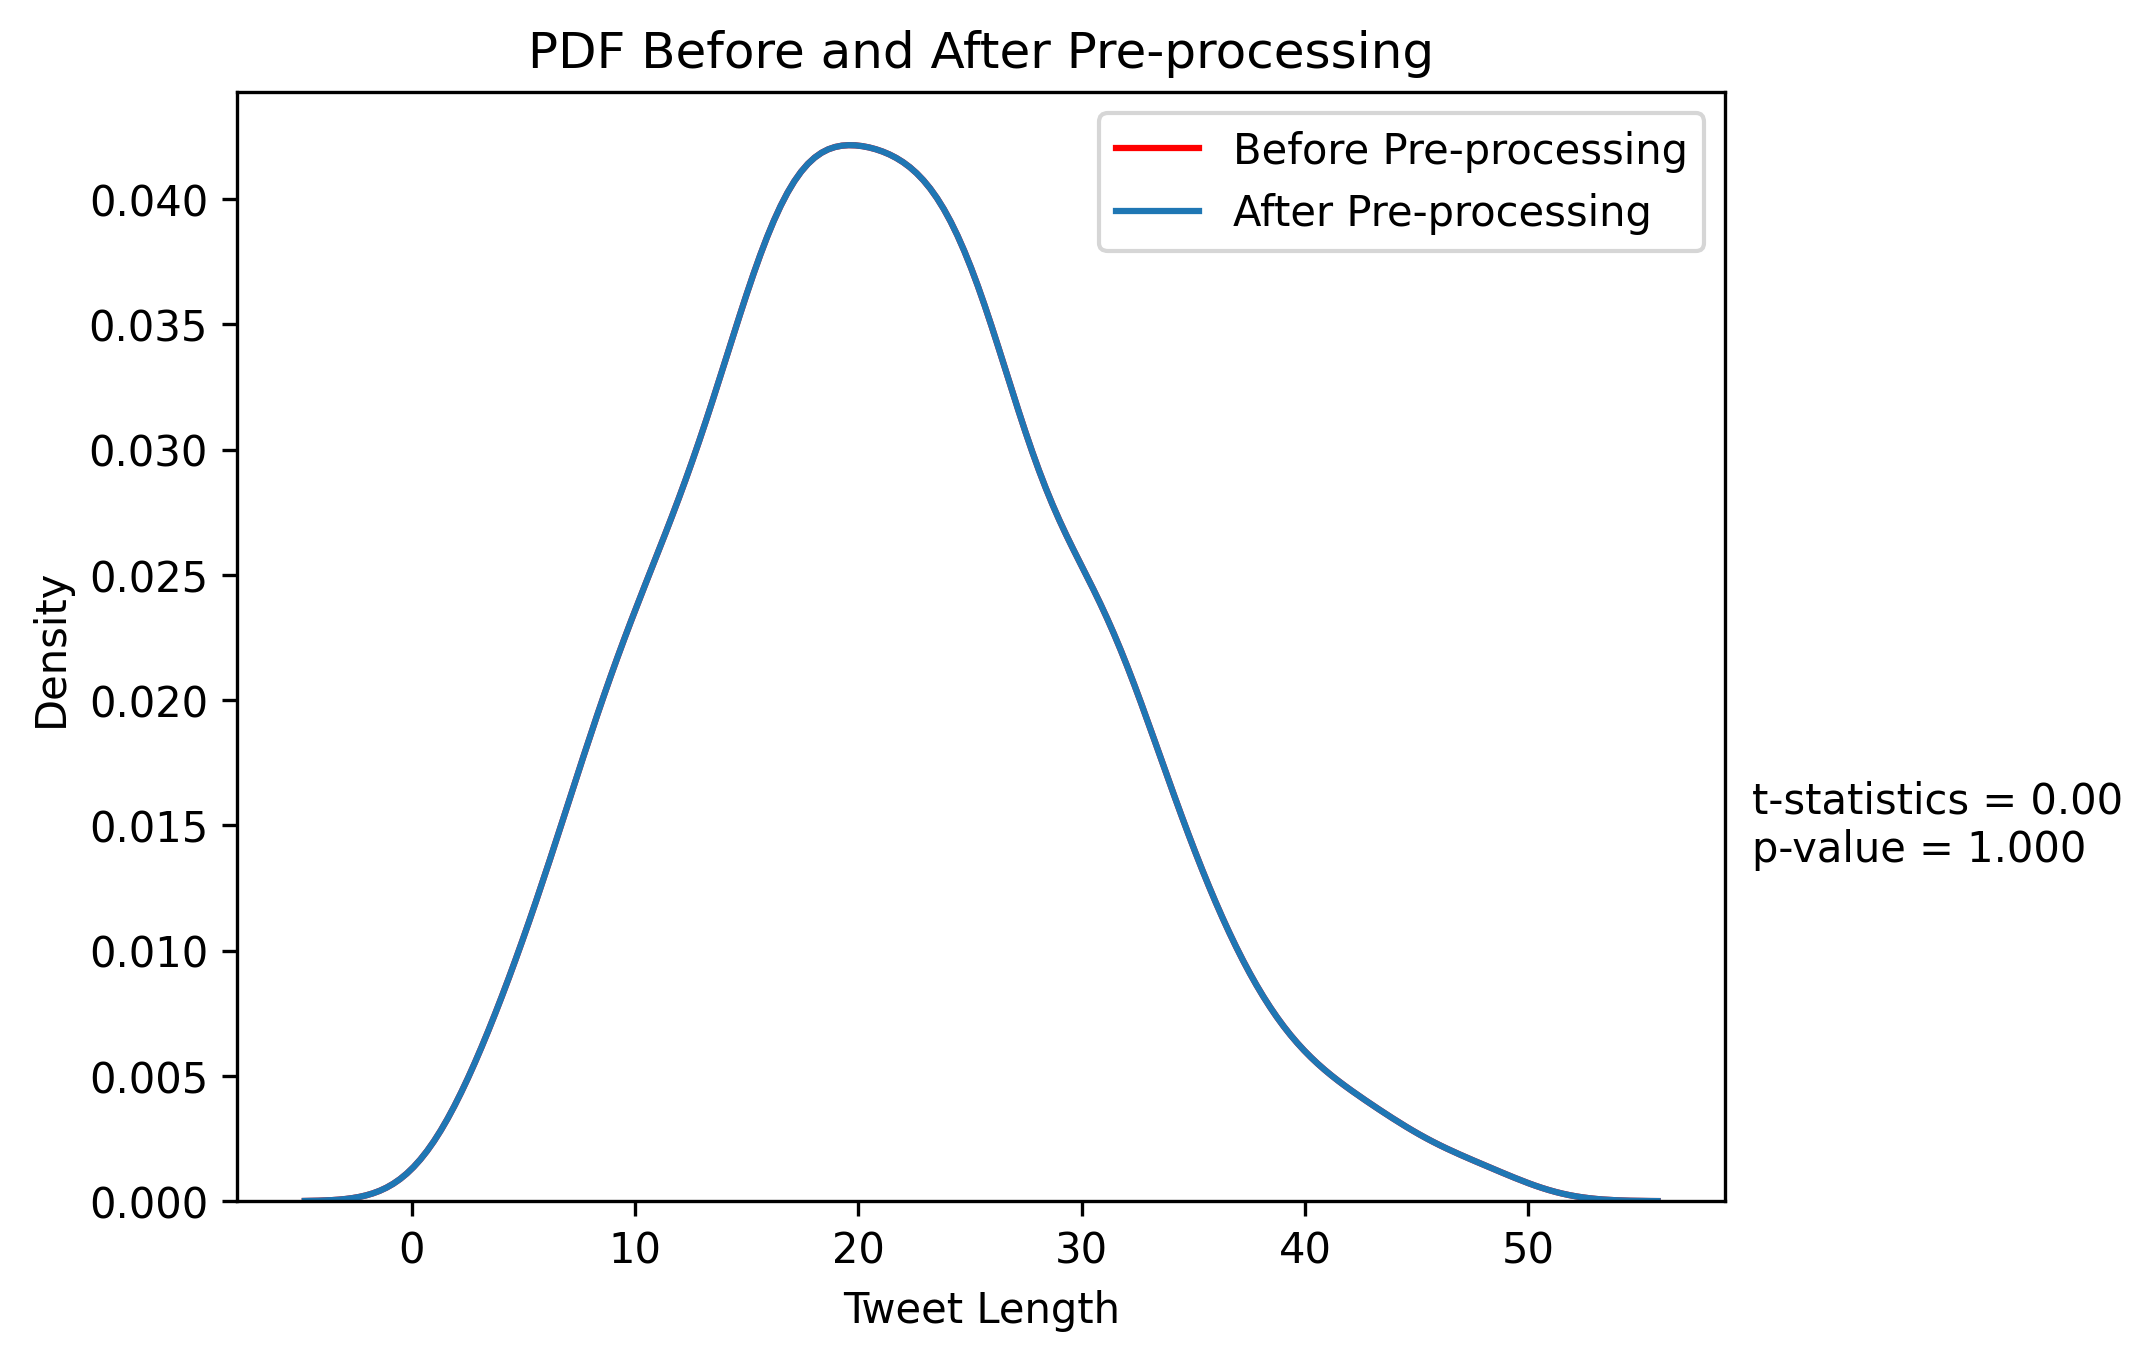

In [405]:
sns.distplot(a = Tweet_content_len1, 
             hist = False, 
             color = 'red', 
             label = 'Before Pre-processing',
             )
sns.distplot(a = Tweet_content_len2, 
             hist = False, 
             label = 'After Pre-processing',
             )

plt.title('PDF Before and After Pre-processing')

# plt.tight_layout()
plt.xlabel("Tweet Length")
plt.text(60, 0.015, "t-statistics = %.2f\np-value = %.3f"%(stats1,pvalue), horizontalalignment='left',
     verticalalignment='center')
plt.legend()
plt.show()

In [406]:
tweetsDF['review_len'] = tweetsDF['translate'].astype(str).apply(len)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frekuensi')

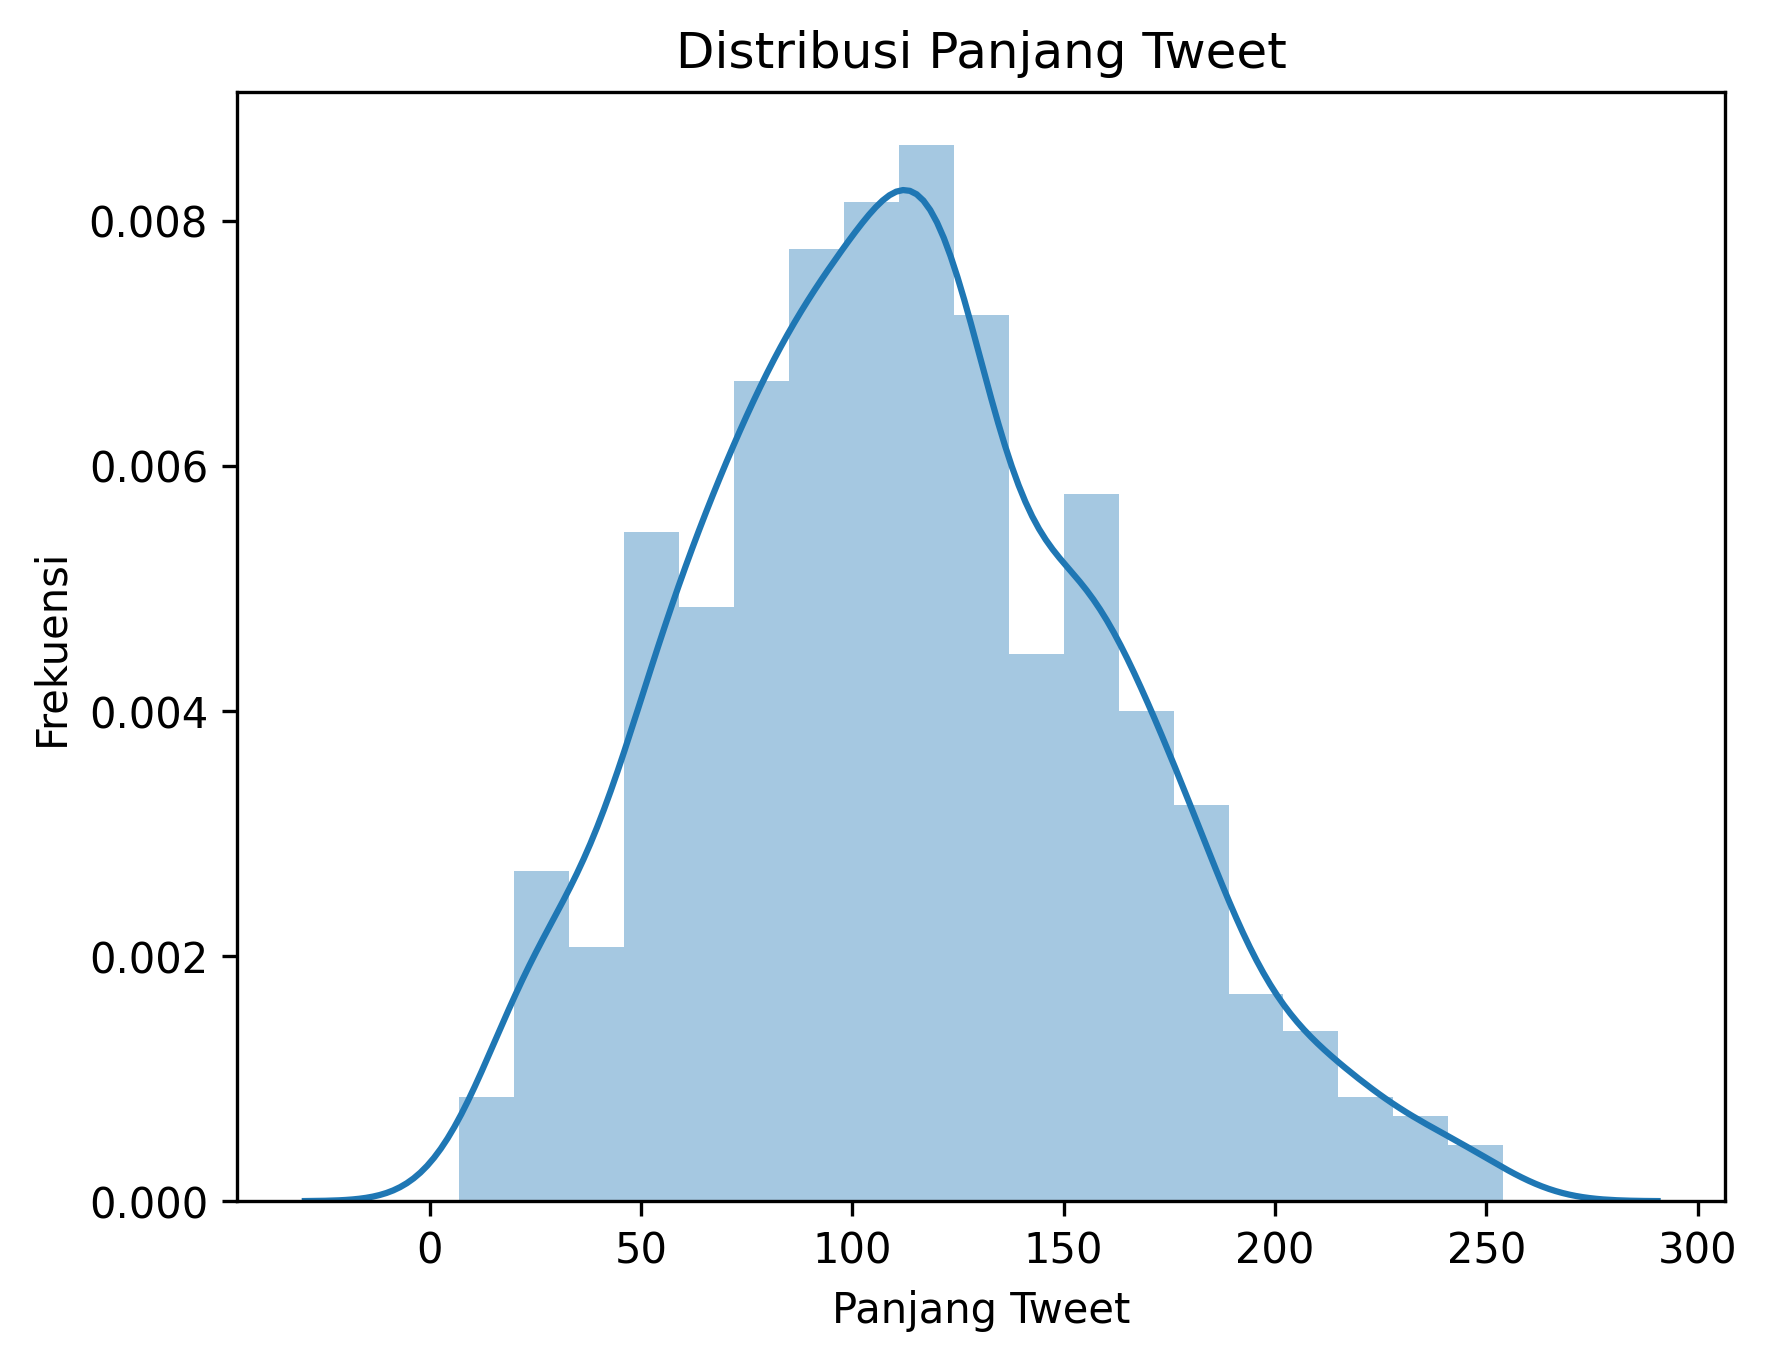

In [407]:
sns.distplot(tweetsDF['review_len'])
plt.title('Distribusi Panjang Tweet')
plt.xlabel('Panjang Tweet')
plt.ylabel('Frekuensi')

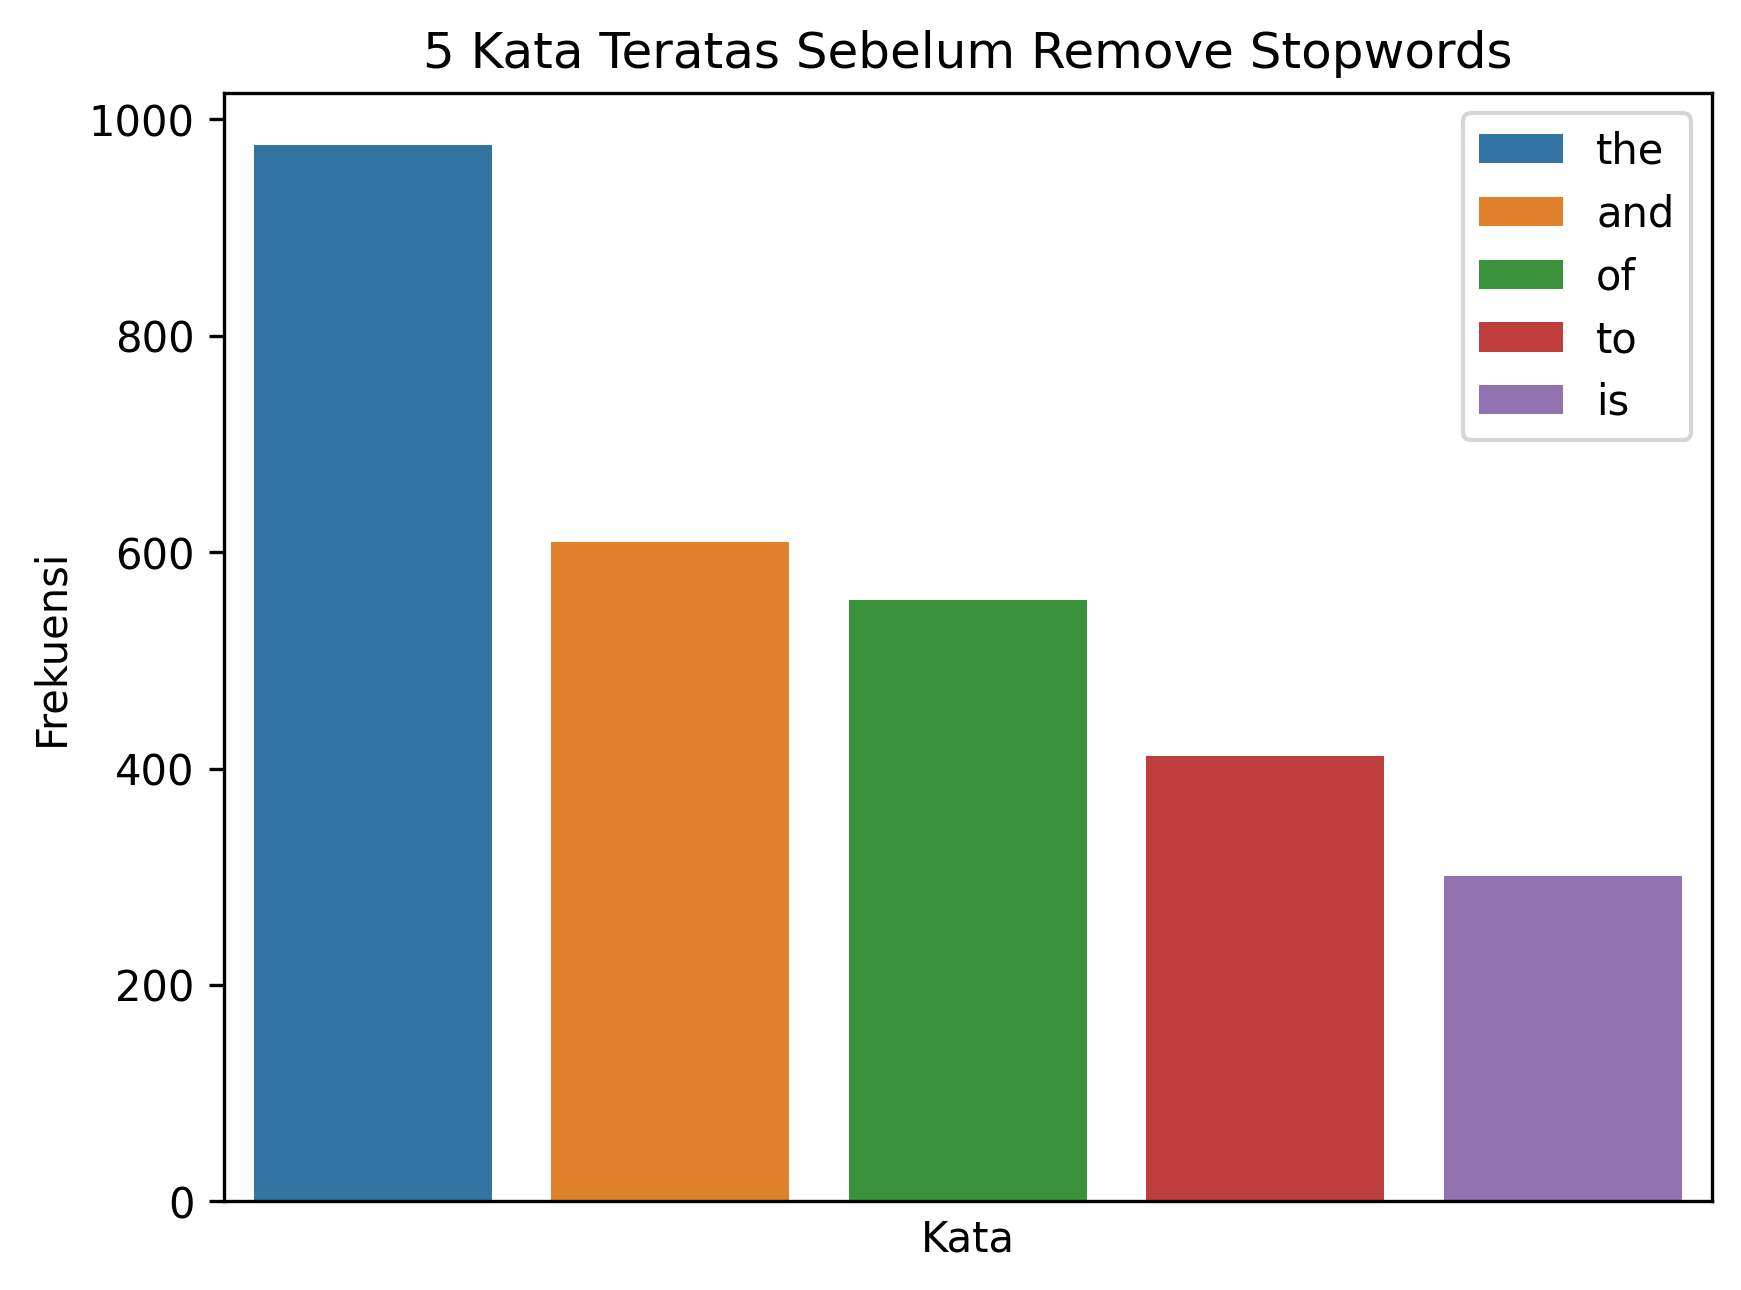

In [408]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(tweetsDF['translate'], 5)
df1 = pd.DataFrame(common_words, columns = ['translate' , 'count'])
# df1.groupby('translate').sum()['count'].sort_values(ascending=False).plot(
#     kind='bar', title='Top 10 words in tweet before removing stop words',fc='orange')
sns.barplot(x='translate', y='count', data=df1, hue='translate', dodge=False)
plt.title('5 Kata Teratas Sebelum Remove Stopwords')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.legend(loc=1)

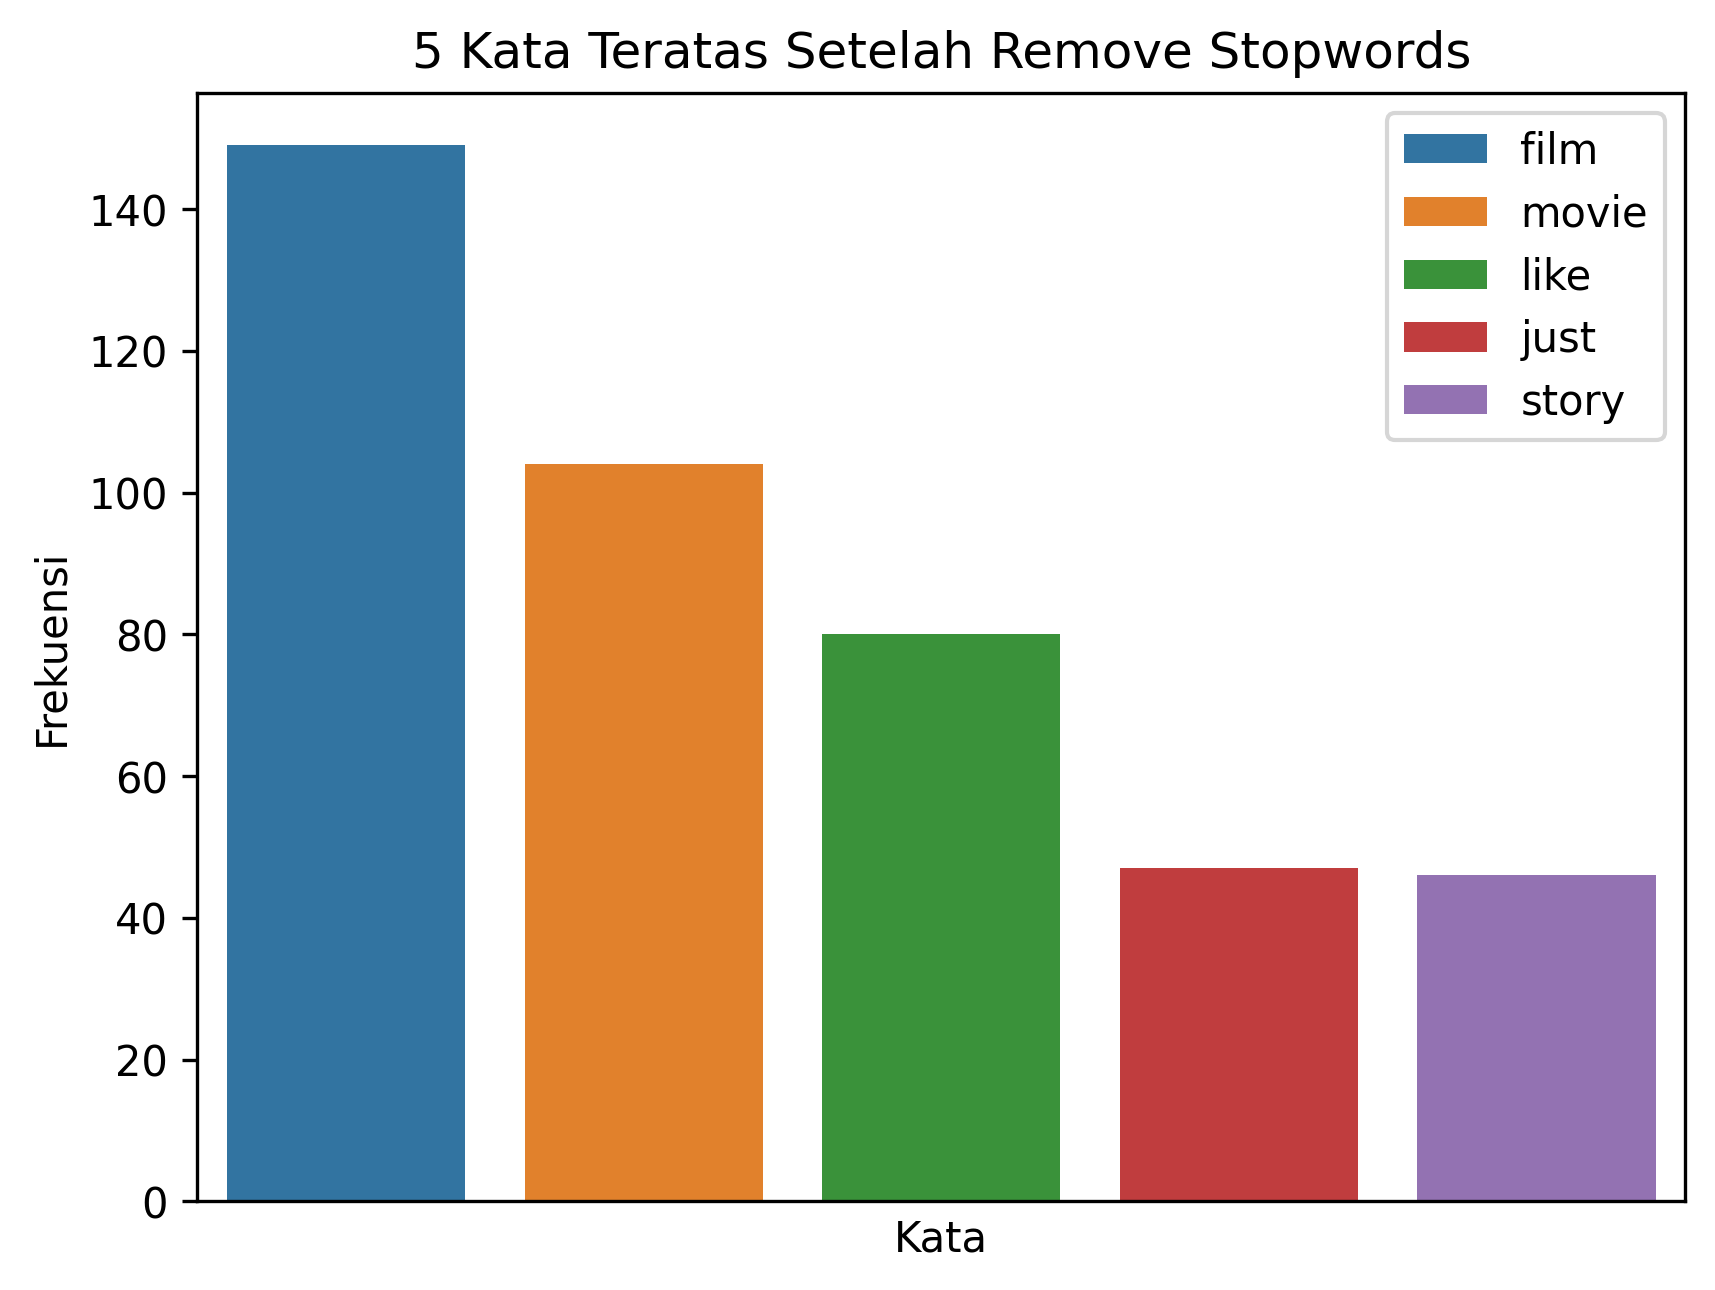

In [409]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(tweetsDF['translate'], 5)
df2 = pd.DataFrame(common_words, columns = ['translate' , 'count'])
# df2.groupby('translate').sum()['count'].sort_values(ascending=False).plot(
#     kind='bar', title='10 kata teratas setelah proses remove stopword',fc='rgbkymc')
sns.barplot(x='translate', y='count', data=df2, hue='translate',dodge=False)
plt.title('5 Kata Teratas Setelah Remove Stopwords')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.legend(loc=1)
# df2.countplot()

In [410]:
df1

translate  count
0       the    976
1       and    609
2        of    556
3        to    412
4        is    301

In [411]:
df2

translate  count
0      film    149
1     movie    104
2      like     80
3      just     47
4     story     46

1
2


<ipython-input-412-430802243ed6>:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,subplot)


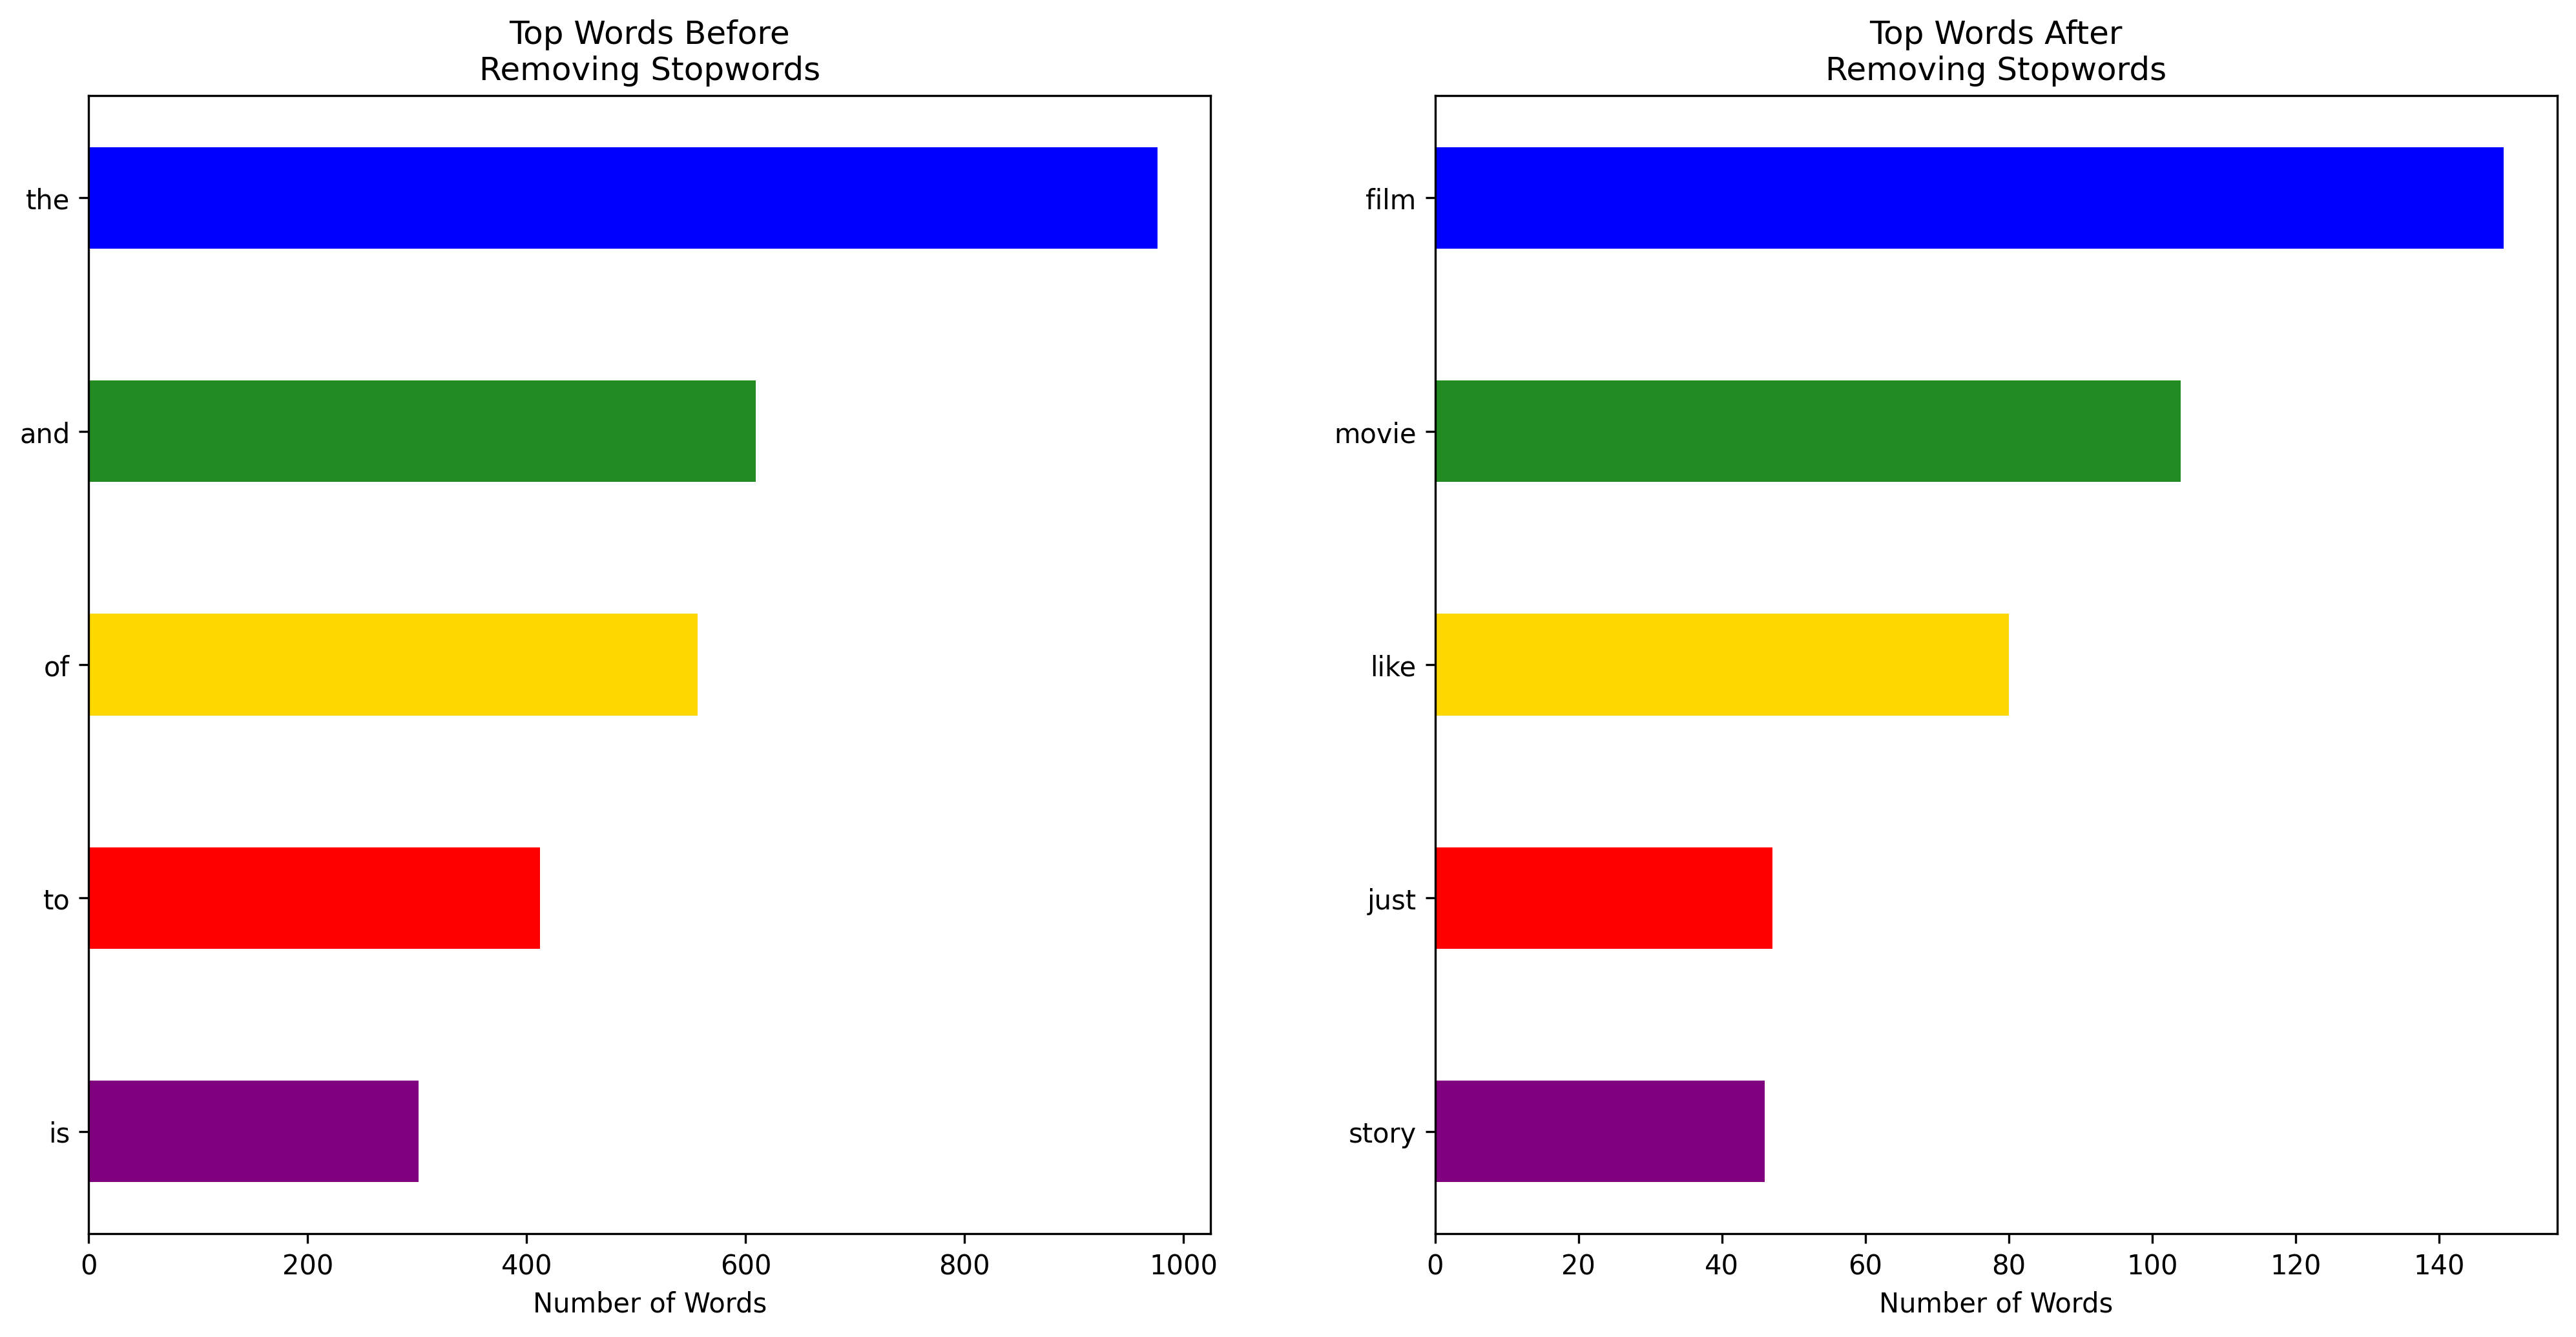

In [412]:
# wine_more_than_mean = (df[df['wine_servings'] > df['wine_servings']\
#                          .mean()])
# sort_wine_more_than_mean = wine_more_than_mean\
#                            .sort_values('wine_servings',
#                                         ascending=False)

fig, ax = plt.subplots(
    figsize=(9,2),
    )
fig.tight_layout(pad=-15)

width = 0.1
clr = ('blue', 'forestgreen', 'gold', 'red', 'purple')

gap = 2.3

x_values = np.arange(0,width*5*gap,width*gap)

# Creating a case-specific function to avoid code repetition
def plot_hor_bar(subplot, data, title):
    print(subplot)
    plt.subplot(1,2,subplot)
    # ax = sns.barplot(y='translate', 
    #                  x='count',
    #                  data=data,
    #                  height=0.2, 
    #                 #  color='slateblue',
    #                  )
    barlist = plt.barh(
        x_values, 
        data['count'], 
        height=width,
        color=clr,
        )
    plt.yticks(x_values,data['translate'])
    # ax.set_yticklabels()
    plt.title(title,
              # fontsize=70,
              )
    plt.xlabel('Number of Words', 
              #  fontsize=50,
               )
    plt.xticks(
        # fontsize=40,
        )
    # plt.ylabel(None)
    # plt.yticks(
    #     # fontsize=40,
    #     )
    # sns.despine(left=True)
    # ax.grid(False)
    # ax.tick_params(bottom=True, left=False)
    return None

plot_hor_bar(1, df1, "Top Words Before\nRemoving Stopwords")
plt.gca().invert_yaxis()
plot_hor_bar(2, df2, "Top Words After\nRemoving Stopwords")
plt.gca().invert_yaxis()
plt.show()

In [413]:
import nltk
# !pip install snscrape
# !pip install tpot
# !pip install translators --upgrade
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [414]:
english_stop_words = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split()  if word not in english_stop_words]))
    return removed_stop_words
def get_stemmed_text(corpus):
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in tweet.split()]) for tweet in corpus]
def get_lemmatize_text(corpus):
  lemmatizer = WordNetLemmatizer()
  return [' '.join([lemmatizer.lemmatize(word) for word in tweet.split()]) for tweet in corpus]

In [415]:
no_stop_words_tweet = remove_stop_words(tweetsDF['translate'])

In [416]:
# tweetsDF['translate'] = get_stemmed_text(no_stop_words_tweet)
tweetsDF['translate'] = get_lemmatize_text(no_stop_words_tweet)
tweetsDF.head()

text  label  \
2499  it would take a complete moron to foul up a sc...      1   
8033  so we got ten little indians meets friday the ...      0   
6808  unfortunately , heartbreak hospital wants to c...      0   
6057  sustains its dreamlike glide through a success...      0   
6631  a modest and messy metaphysical thriller offer...      0   

                                              translate  review_len  
2499  would take complete moron foul screen adaptati...          93  
8033  got ten little indian meet friday 13th way cle...         221  
6808  unfortunately heartbreak hospital want convey ...         200  
6057  sustains dreamlike glide succession cheesy coi...         150  
6631  modest messy metaphysical thriller offering qu...          78

In [417]:
Counter(" ".join(tweetsDF['translate']).split()).most_common(10)

[('film', 180),
 ('movie', 123),
 ('like', 80),
 ('one', 59),
 ('story', 52),
 ('time', 52),
 ('character', 49),
 ('make', 42),
 ('enough', 40),
 ('way', 39)]

In [418]:
#negative 0, positif 1
def generate_sentiment(tweet):
  def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
  
  #Create a function to get the polarity
  def getPolarity(text):
    return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
  tweet['TextBlob_Subjectivity'] = tweet['translate'].apply(getSubjectivity)
  tweet['TextBlob_Polarity'] = tweet['translate'].apply(getPolarity)
  def getAnalysis(score):
    if score < 0:
      return 0
    elif score == 0:
      return 2
    else:
      return 1
  tweet['sentimen'] = tweet['TextBlob_Polarity'].apply(getAnalysis )
  return tweet

In [419]:
generate_sentiment(tweetsDF)

text  label  \
2499  it would take a complete moron to foul up a sc...      1   
8033  so we got ten little indians meets friday the ...      0   
6808  unfortunately , heartbreak hospital wants to c...      0   
6057  sustains its dreamlike glide through a success...      0   
6631  a modest and messy metaphysical thriller offer...      0   
...                                                 ...    ...   
602   in moonlight mile , no one gets shut out of th...      0   
998   while the new film is much more eye-catching t...      0   
249   a deliciously nonsensical comedy about a city ...      1   
591   while it's all quite tasteful to look at , the...      0   
429   this fascinating look at israel in ferment fee...      1   

                                              translate  review_len  \
2499  would take complete moron foul screen adaptati...          93   
8033  got ten little indian meet friday 13th way cle...         221   
6808  unfortunately heartbreak hospital want convey ...         200   
6057  sustains dreamlike glide succession cheesy coi...         150   
6631  modest messy metaphysical thriller offering qu...          78   
...                                                 ...         ...   
602               moonlight mile one get shut hug cycle          57   
998   new film much eyecatching blooddrenched stephe...         170   
249   deliciously nonsensical comedy city coming apa...          72   
591   quite tasteful look attention process tends li...         103   
429   fascinating look israel ferment feel immediate...         168   

      TextBlob_Subjectivity  TextBlob_Polarity  sentimen  
2499               0.522222          -0.177778         0  
8033               0.444444           0.086574         1  
6808               0.800000           0.200000         1  
6057               0.700000          -0.133333         0  
6631               0.650000          -0.050000         0  
...                     ...                ...       ...  
602                0.000000           0.000000         2  
998                0.327273           0.168182         1  
249                1.000000           1.000000         1  
591                0.500000          -0.187500         0  
429                0.916667           0.500000         1  

[1000 rows x 7 columns]

In [420]:
print(tweetsDF)
tweetsDF["sentimen"] = tweetsDF["label"]

                                                   text  label  \
2499  it would take a complete moron to foul up a sc...      1   
8033  so we got ten little indians meets friday the ...      0   
6808  unfortunately , heartbreak hospital wants to c...      0   
6057  sustains its dreamlike glide through a success...      0   
6631  a modest and messy metaphysical thriller offer...      0   
...                                                 ...    ...   
602   in moonlight mile , no one gets shut out of th...      0   
998   while the new film is much more eye-catching t...      0   
249   a deliciously nonsensical comedy about a city ...      1   
591   while it's all quite tasteful to look at , the...      0   
429   this fascinating look at israel in ferment fee...      1   

                                              translate  review_len  \
2499  would take complete moron foul screen adaptati...          93   
8033  got ten little indian meet friday 13th way cle...         2

In [421]:
tweetsDF = tweetsDF[tweetsDF['sentimen']!=2]
tweetsDF.head()

text  label  \
2499  it would take a complete moron to foul up a sc...      1   
8033  so we got ten little indians meets friday the ...      0   
6808  unfortunately , heartbreak hospital wants to c...      0   
6057  sustains its dreamlike glide through a success...      0   
6631  a modest and messy metaphysical thriller offer...      0   

                                              translate  review_len  \
2499  would take complete moron foul screen adaptati...          93   
8033  got ten little indian meet friday 13th way cle...         221   
6808  unfortunately heartbreak hospital want convey ...         200   
6057  sustains dreamlike glide succession cheesy coi...         150   
6631  modest messy metaphysical thriller offering qu...          78   

      TextBlob_Subjectivity  TextBlob_Polarity  sentimen  
2499               0.522222          -0.177778         1  
8033               0.444444           0.086574         0  
6808               0.800000           0.200000         0  
6057               0.700000          -0.133333         0  
6631               0.650000          -0.050000         0

In [422]:
tweetsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 2499 to 429
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   text                   1000 non-null   object 
 1   label                  1000 non-null   int64  
 2   translate              1000 non-null   object 
 3   review_len             1000 non-null   int64  
 4   TextBlob_Subjectivity  1000 non-null   float64
 5   TextBlob_Polarity      1000 non-null   float64
 6   sentimen               1000 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 62.5+ KB


In [423]:
print(Counter(tweetsDF['label']))

Counter({1: 509, 0: 491})


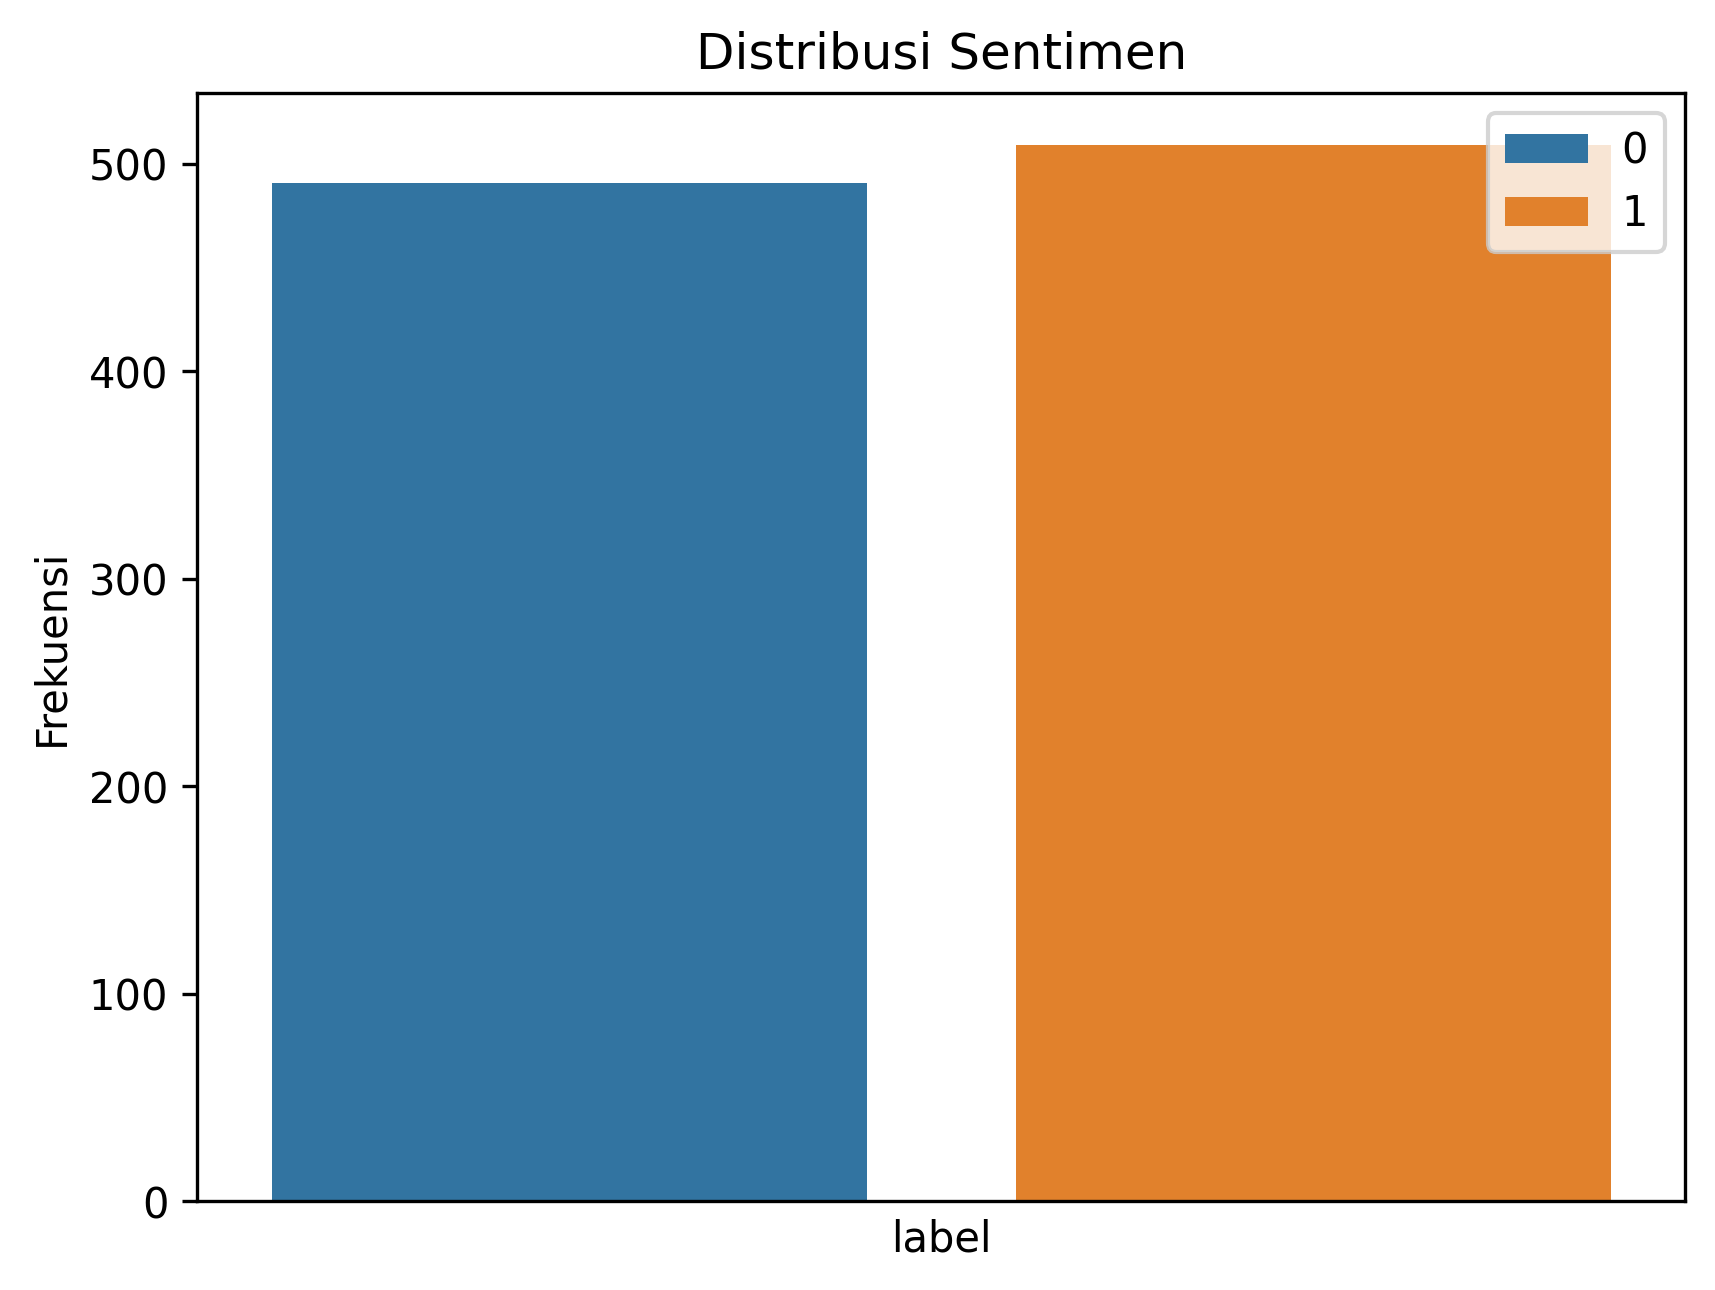

In [424]:
sns.countplot(x=tweetsDF['label'], hue=tweetsDF['sentimen'],dodge=False)
plt.title('Distribusi Sentimen')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Frekuensi')
plt.legend(labels=['0', '1', '2', '3'])
#beda warna antara sentimen 1 dan 0

In [425]:
tweetsDF['label'] = tweetsDF['label'].astype('int')
x2 = tweetsDF['translate']
y = tweetsDF['label']
y = np.array(y)

In [426]:
from sklearn.feature_extraction.text import TfidfTransformer 
tv=TfidfVectorizer(
    # min_df=0,
    # max_df=1,
    max_features=200,
    use_idf=True,
    )
x1=tv.fit_transform(x2)
print('Tfidf_tweet:',x1.shape)
# max_words = 1000
# tokenizer = Tokenizer(
#     num_words = max_words,
#     filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~'
# )
# tokenizer.fit_on_texts(x)
# x = tokenizer.texts_to_sequences(x)
# x = pad_sequences(x, maxlen = 80)
# x[0]



Tfidf_tweet: (1000, 200)


In [427]:
x = x1.todense()

print(x)
print(type(x))

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.37444203 ... 0.         0.         0.37444203]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
<class 'numpy.matrix'>


In [428]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(x)
x = scaler.transform(x)
x

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 6.78881681, ..., 0.        , 0.        ,
        7.43555731],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [429]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

clf1s = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=42)

selector = SelectFromModel(estimator=clf1s).fit(x, y)

clf1s_fi = selector.estimator_.feature_importances_

print(clf1s_fi)

print(selector.threshold_)

print(selector.get_support())

X3 = selector.transform(x)

print(X3)

print(X3.shape)

[0.         0.         0.         0.         0.         0.00551126
 0.         0.         0.02532475 0.         0.         0.
 0.02122999 0.00974381 0.01087654 0.01634858 0.00641306 0.
 0.00960978 0.         0.01168825 0.         0.         0.00657464
 0.00485812 0.         0.         0.         0.01588694 0.00838561
 0.         0.01805285 0.00818861 0.         0.         0.00832122
 0.00517902 0.         0.01271783 0.         0.01404655 0.
 0.         0.00777721 0.         0.         0.02358625 0.01605076
 0.         0.00521639 0.0139426  0.         0.00656534 0.
 0.00669214 0.00841173 0.00715679 0.         0.01463355 0.
 0.03051571 0.         0.         0.0085591  0.         0.00682128
 0.01553178 0.00512205 0.         0.         0.01561005 0.00975149
 0.00520474 0.0047275  0.00583033 0.         0.00987801 0.01640904
 0.         0.00900897 0.         0.         0.         0.01014415
 0.         0.01203601 0.         0.01590412 0.00751343 0.00523814
 0.         0.0099324  0.00966672 0

In [430]:
# from sklearn.feature_selection import RFE
# from sklearn.svm import SVR

# estimator = SVR(kernel="linear")
# selector = RFE(
#     estimator, 
#     # n_features_to_select=5, 
#     step=20,
#     )
# selector = selector.fit(x, y)
# print(selector.support_)


# print(selector.ranking_)

# X4 = selector.transform(x)

# print(X4)

# print(X4.shape)


In [431]:
# DF1 = pd.DataFrame(X3)
# DF1["Sentiment"] =  y

# import matplotlib
# import matplotlib.pyplot as plt
# import seaborn as sns
# from pandas.plotting import scatter_matrix

# from matplotlib import rcParams, rcParamsDefault

# rcParams.update(rcParamsDefault)

# plt.rcParams["figure.dpi"] = 300

# #Using Pearson Correlation
# plt.figure(figsize=(12,10))
# cor1 = DF1.corr()
# sns.heatmap(cor1, cmap=plt.cm.Reds)#annot=True, fmt=".1f", 
# plt.show()

In [432]:
# counter = Counter(y)
# print(counter)
# over = SMOTE(
#     # sampling_strategy=0.6, 
#     random_state=8,
#     )
# under = RandomUnderSampler(
#     # sampling_strategy=0.6, 
#     random_state=8,
#     )
# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)
# X, Y = pipeline.fit_resample(X3, y)
# counter = Counter(Y)
# print(counter)

# X1, Y1 = over.fit_resample(x,y)
# counter = Counter(Y1)
# print(counter)

# X2, Y2 = under.fit_resample(x,y)
# counter = Counter(Y2)
# print(counter)

In [433]:
# sns.countplot(Y,hue=Y,dodge=False)
# plt.title('Distribusi Sentimen')
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# plt.xlabel('sentimen')
# plt.ylabel('Frekuensi')
# plt.legend(labels=["Negatif", 'Positif'])

In [434]:
X_train, x_test, Y_train, y_test = train_test_split(X3, 
                                                    y, 
                                                    train_size = 0.50, 
                                                    # random_state=10, 
                                                    stratify=y,
                                                    )
# # x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.80, random_state=11)

X_train1, x_test1, Y_train1, y_test1 = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.15, 
                                                    random_state=42, 
                                                    stratify=y,
                                                    )

# X_train2, x_test2, Y_train2, y_test2 = train_test_split(X4, 
#                                                     y, 
#                                                     train_size = 0.50, 
#                                                     # random_state=10, 
#                                                     stratify=y,
#                                                     )

# print(X_train.shape)
# print(x_test.shape)

In [435]:
counter = Counter(Y_train)
print(counter)
over = SMOTE(
    # sampling_strategy=0.6, 
    random_state=8,
    )
under = RandomUnderSampler(
    # sampling_strategy=0.6, 
    random_state=8,
    )
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
x_train, y_train = pipeline.fit_resample(X_train, Y_train)
counter = Counter(y_train)
print(counter)

Counter({1: 254, 0: 246})
Counter({0: 254, 1: 254})


In [436]:
import nltk
# !pip install snscrape
# !pip install tpot
# !pip install translators --upgrade
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [437]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# x_train = X_train
# y_train = Y_train

# clf = GradientBoostingClassifier().fit(x_train, y_train)
# results = clf.predict(x_test)

# #smote
# clf2 = RandomForestClassifier(
#     # probability = True,
#     ).fit(x_train, y_train)
# results2 = clf2.predict(x_test)

#MDI
clf22 = svm.SVC(
    probability = True,
    ).fit(X_train, Y_train)
results22 = clf22.predict(x_test)

# #TF-IDF
# clf23 = RandomForestClassifier(
#     # probability = True,
#     ).fit(X_train1, Y_train1)
# results23 = clf23.predict(x_test1)

# clf24 = svm.SVC(
#     probability = True,
#     ).fit(X_train2, Y_train2)
# results24 = clf24.predict(x_test2)

# clf3 = GaussianNB().fit(x_train, y_train)
# results3 = clf3.predict(x_test)

clf32 = GaussianNB().fit(X_train, Y_train)
results32 = clf32.predict(x_test)

# clf33 = GaussianNB().fit(X_train1, Y_train1)
# results33 = clf33.predict(x_test1)

# clf34 = GaussianNB().fit(X_train2, Y_train2)
# results34 = clf34.predict(x_test2)

In [438]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# predict = grid.predict(x_test)
# print("GB")
# round(accuracy_score(y_test, results),2)
# print(confusion_matrix(y_test, results))
# print(classification_report(y_test, results))

# # predict = grid.predict(x_test)
# print("RF SMOTE")
# round(accuracy_score(y_test, results2),2)
# print(confusion_matrix(y_test, results2))
# print(classification_report(y_test, results2))

# # predict = grid.predict(x_test)
print("SVM MDI")
round(accuracy_score(y_test, results22),2)
print(confusion_matrix(y_test, results22))
print(classification_report(y_test, results22))
crs1 = classification_report(y_test, results22, output_dict=True)

# print("RF")
# predict = grid.predict(x_test)
# round(accuracy_score(y_test1, results23),2)
# print(confusion_matrix(y_test1, results23))
# print(classification_report(y_test1, results23))
# crs2 = classification_report(y_test1, results23, output_dict=True)

print("SVM RFE")
# # predict = grid.predict(x_test)
# round(accuracy_score(y_test2, results24),2)
# print(confusion_matrix(y_test2, results24))
# print(classification_report(y_test2, results24))
# crs3 = classification_report(y_test2, results24, output_dict=True)

# print("NB SMOTE")
# # predict = grid.predict(x_test)
# round(accuracy_score(y_test, results3),2)
# print(confusion_matrix(y_test, results3))
# print(classification_report(y_test, results3))

print("NB MDI")
# predict = grid.predict(x_test)
round(accuracy_score(y_test, results32),2)
print(confusion_matrix(y_test, results32))
print(classification_report(y_test, results32))
crn1 = classification_report(y_test, results32, output_dict=True)

# print("NB ORI")
# # predict = grid.predict(x_test)
# round(accuracy_score(y_test1, results33),2)
# print(confusion_matrix(y_test1, results33))
# print(classification_report(y_test, results33))
# crn2 = classification_report(y_test, results33, output_dict=True)

print("NB RFE")
# predict = grid.predict(x_test)
# round(accuracy_score(y_test2, results34),2)
# print(confusion_matrix(y_test2, results34))
# print(classification_report(y_test, results34))
# crn3 = classification_report(y_test, results34, output_dict=True)

SVM MDI
[[111 134]
 [ 47 208]]
              precision    recall  f1-score   support

           0       0.70      0.45      0.55       245
           1       0.61      0.82      0.70       255

    accuracy                           0.64       500
   macro avg       0.66      0.63      0.62       500
weighted avg       0.65      0.64      0.63       500

SVM RFE
NB MDI
[[204  41]
 [158  97]]
              precision    recall  f1-score   support

           0       0.56      0.83      0.67       245
           1       0.70      0.38      0.49       255

    accuracy                           0.60       500
   macro avg       0.63      0.61      0.58       500
weighted avg       0.63      0.60      0.58       500

NB RFE


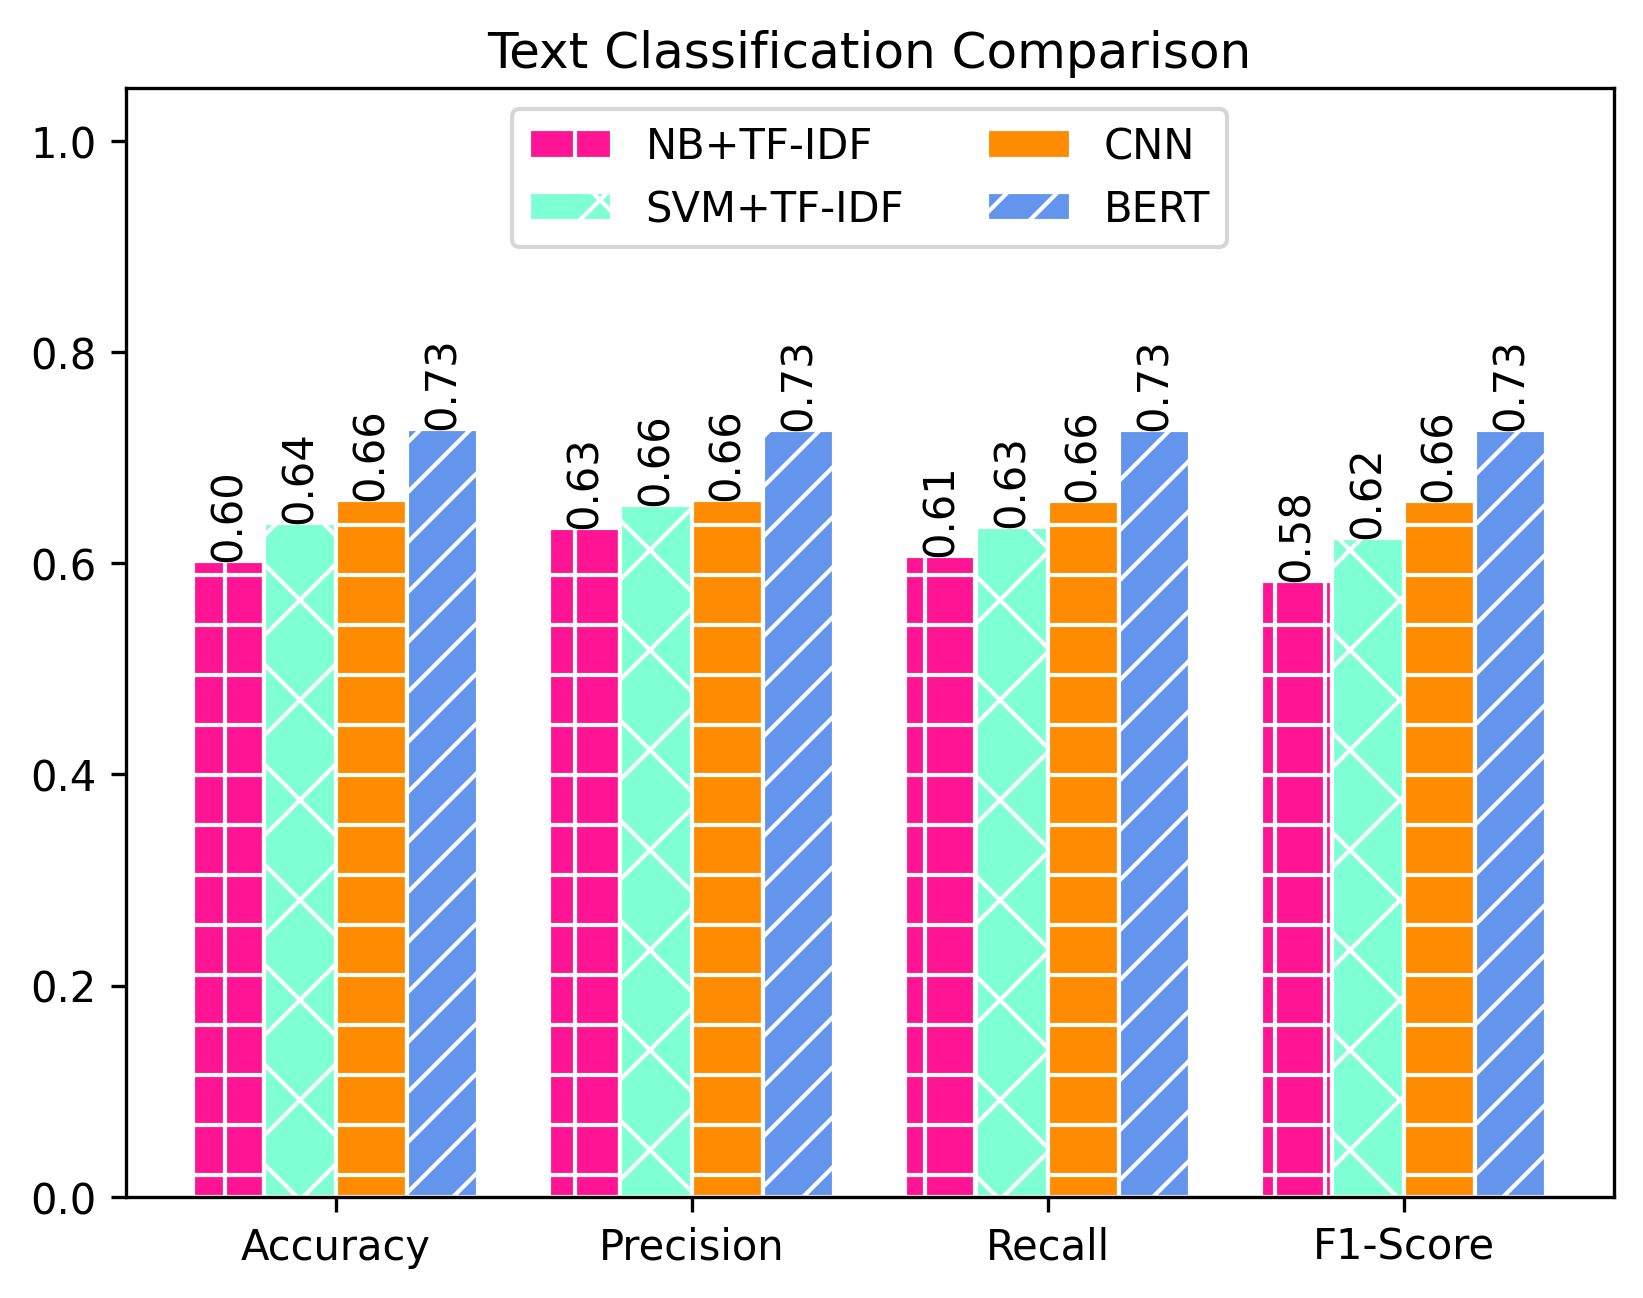

In [439]:
# Import Library

import numpy as np 
import matplotlib.pyplot as plt 

from matplotlib import rcParams, rcParamsDefault

rcParams.update(rcParamsDefault)

plt.rcParams["figure.dpi"] = 300

# Define Data

fmt="%.2f"

params = [
    "Accuracy",
    "Precision",
    "Recall",
    "F1-Score",
    # "Sensitivity",
    # "Specificity",
    # "Macro Average",
    # "Weighted Average",
    # "BERT",
    # "TF-IDF", 
    # "TF-IDF\n+\nMDI", 
    # "TF-IDF\n+\nSVM-RFE",
    ]

x1 = [
    crs1['accuracy'], 
    crs1['macro avg']['precision'], 
    crs1['macro avg']['recall'], 
    crs1['macro avg']['f1-score'], 
    # crs1['1']['recall'], 
    # crs1['0']['recall'], 
    # crs1['macro avg']['recall'], 
    # crs2['weighted avg']['recall'], 
    # crs3['macro avg']['precision'],
    ]
#DNN
y1 = [
    crz['accuracy'], 
    crz['macro avg']['precision'], 
    crz['macro avg']['recall'], 
    crz['macro avg']['f1-score'], 
    # crz['1']['recall'], 
    # crz['0']['recall'], 
    # crz['macro avg']['recall'], 
    # crz['weighted avg']['recall'], 
    # crs3['macro avg']['recall'],
    ]
# NB+TF-IDF
y2 = [
    crn1['accuracy'], 
    crn1['macro avg']['precision'], 
    crn1['macro avg']['recall'], 
    crn1['macro avg']['f1-score'], 
    # crz['1']['recall'], 
    # crz['0']['recall'], 
    # crz['macro avg']['recall'], 
    # crz['weighted avg']['recall'], 
    # crs3['macro avg']['recall'],
    ]
w1 = [
    cr1['accuracy'], 
    cr1['macro avg']['precision'], 
    cr1['macro avg']['recall'], 
    cr1['macro avg']['f1-score'], 
    # cr1['1']['recall'], 
    # cr1['0']['recall'], 
    # cr1['macro avg']['recall'], 
    # cr1['weighted avg']['recall'], 
    # crs3['macro avg']['precision'],
    ]
# z1 = [
#     # crs3['macro avg']['recall'],
#     ]

r = np.arange(len(y1))
width = 0.2

# Draw first subplot

# plt.subplot(1, 2, 1)
bars2 = plt.bar(
                r - 1.5*width, 
                # r,
                y2, 
                width=width, 
                label="NB+TF-IDF",
                # label="DNN",
                hatch="+",
                edgecolor="white",
                color="deeppink",
                )
bars1 = plt.bar(r - 0.5*width, 
                x1, width=width, 
                label="SVM+TF-IDF", 
                hatch="x",
                edgecolor="white",
                color="aquamarine",
                )
bars3 = plt.bar(
                r + 0.5*width, 
                # r,
                y1, 
                width=width, 
                # label="NB+MDI",
                label="CNN",
                hatch="-",
                edgecolor="white",
                color="darkorange",
                )
bars0 = plt.bar(
                r + 1.5*width,
                # r + width, 
                w1, width=width, 
                label="BERT", 
                hatch="//",
                edgecolor="white",
                color="cornflowerblue",
                )
# bars3 = plt.bar(r + 1.5*width, 
#                 z1, 
#                 width=width, 
#                 label="Recall",
#                 hatch="\\",
#                 edgecolor="white",
#                 color="salmon",
#                 )
plt.title("Text Classification Comparison", y=1.0, pad=5)
plt.xticks(r, params)
plt.legend(loc="upper center", ncol=2)#, bbox_to_anchor=(0.5,0.9)
rotation = 90
plt.bar_label(bars0, color='black', fmt=fmt, rotation=rotation)
plt.bar_label(bars1, color='black', fmt=fmt, rotation=rotation)
plt.bar_label(bars2, color='black', fmt=fmt, rotation=rotation)
plt.bar_label(bars3, color='black', fmt=fmt, rotation=rotation)
# plt.bar_label(bars3, color='black', fmt=fmt)

# Draw second subplot

# Display
plt.ylim(0,1.05)
plt.show()

In [440]:
# print(testY, predY32, predY32[:,1])

print(test_y, preds1)

print(test_y.shape)

print(type(test_y.cpu().detach().numpy()))

test_yn = test_y.cpu().detach().numpy()

print(preds1.shape)

tensor([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 1]) [[-0.06912512 -2.7062006 ]
 [-0.48163545 -0.9617386 ]
 [-0.5137744  -0.9118839 ]
 [-1.355008   -0.2983323 ]
 [-3.2211814  -0.04072605]
 [-1.0306091  -0.44128332]
 [-0.13091029 -2.0979838 ]
 [-2.683128   -0.070797  ]
 [-0.05529184 -2.9226482 ]
 [-0.9783675  -0.47148365]
 [-0.06192997 -2.812557  ]
 [-1.30691    -0.3156086 ]
 [-1.0132936  -0.45101917]
 [-1.1044004  -0.40258357]
 [-3.0436668  -0.04883292]
 [-0.98375213 -0.46825397]
 [-1.4231615  -0.27568895]
 [-0.04498454 -3.1238441 ]
 [-0.19

AUC: 0.7051300520208084
AUC: 0.7028491396558623
AUC: 0.7154558404558404
AUC: 0.8304843304843305


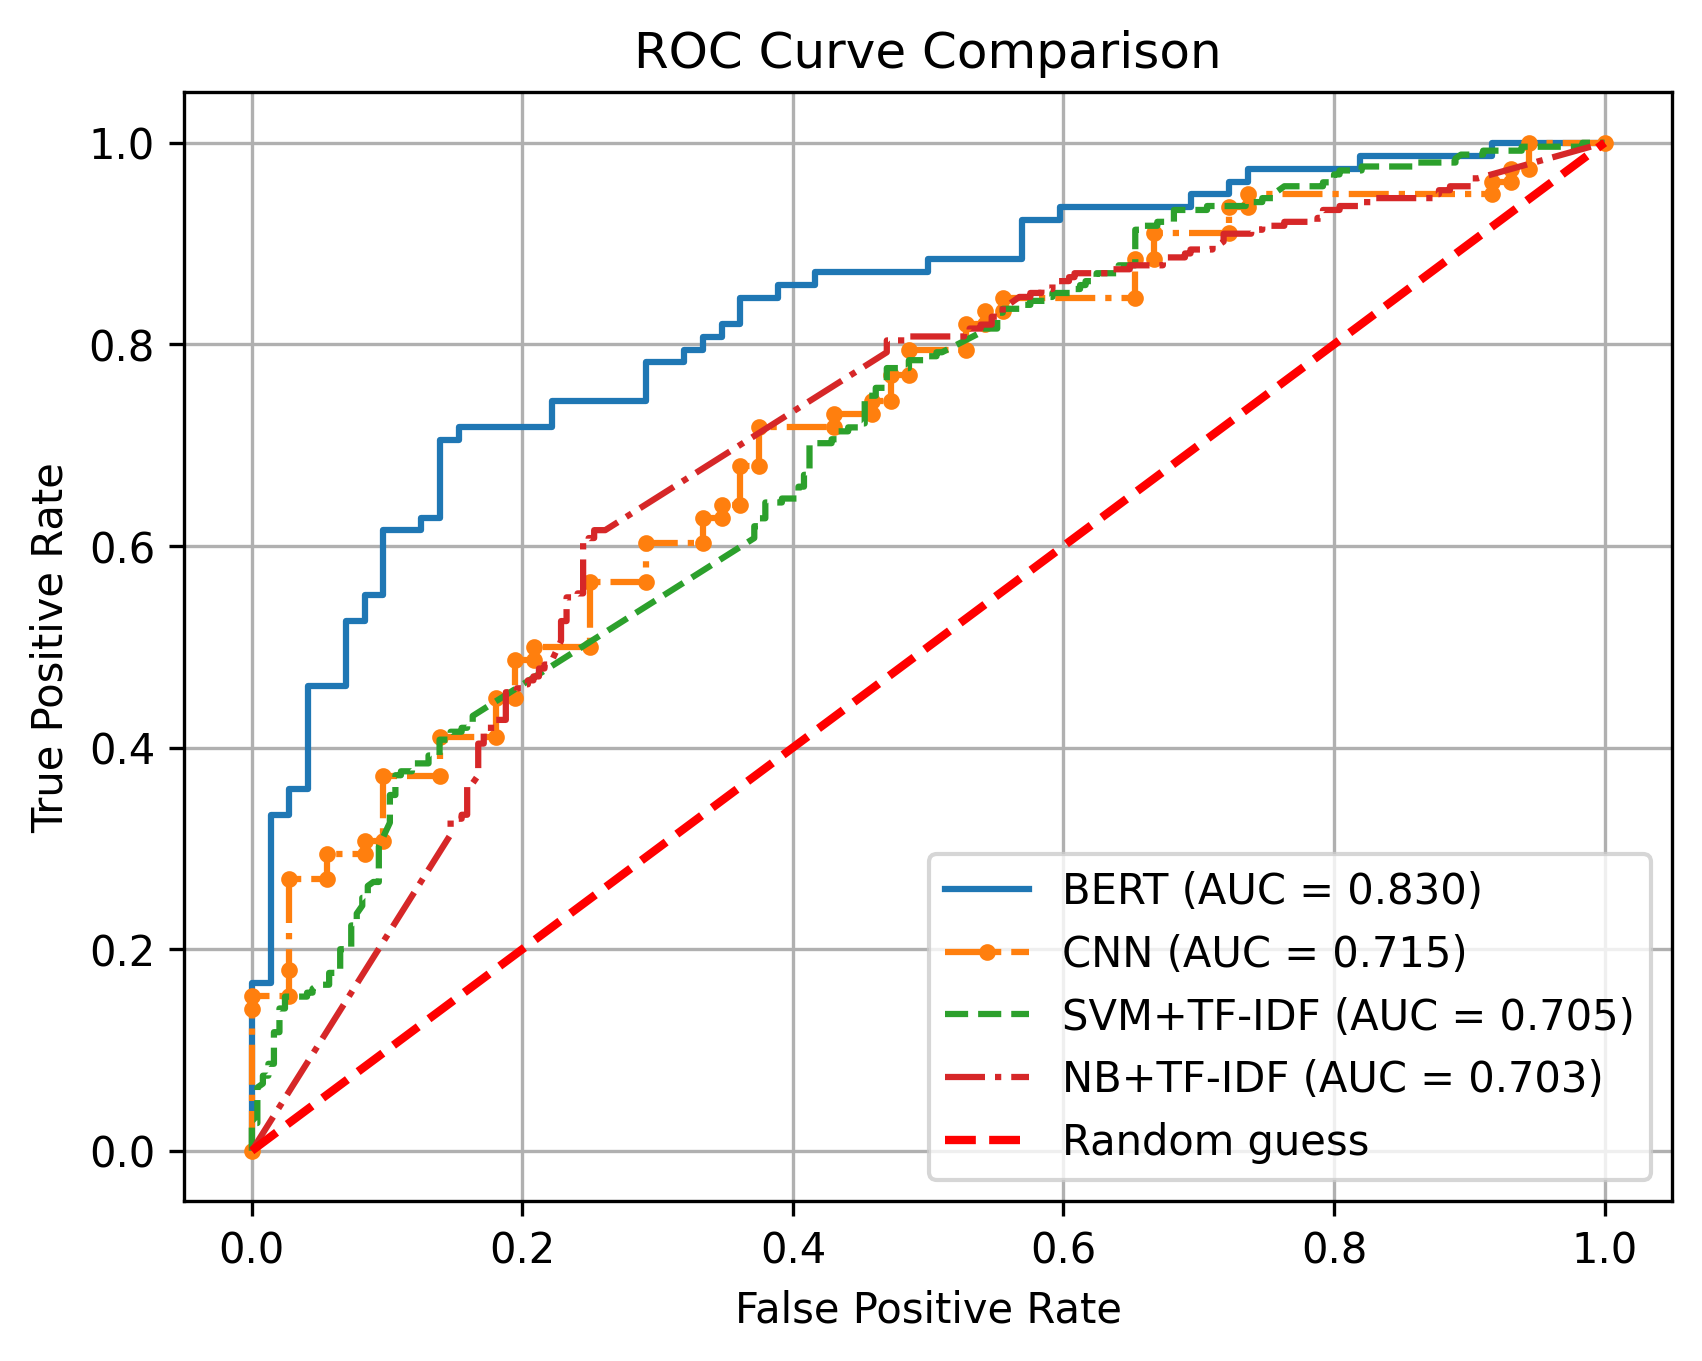

In [441]:
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression

# bc = load_breast_cancer()
# x, y = bc.data, bc.target

# trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.3, random_state=12)

# lr = LogisticRegression()
# lr.fit(trainX, trainY)

testX = x_test
testY = y_test
# predY = clf.predict_proba(testX)

# fpr,tpr, thresh = metrics.roc_curve(testY, predY[:,1])

# auc = metrics.auc(fpr, tpr)
# print("AUC:", auc)

# plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
# plt.title('ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.grid()
# plt.legend()
# plt.show()

# testX = x_test1
# testY = y_test1
#SVM+TF-IDF
predY22 = clf22.predict_proba(testX)

fpr22,tpr22, thresh22 = metrics.roc_curve(testY, predY22[:,1])

auc22 = metrics.auc(fpr22, tpr22)
print("AUC:", auc22)

#NB+TF-IDF
predY32 = clf32.predict_proba(testX)

fpr32,tpr32, thresh32 = metrics.roc_curve(testY, predY32[:,1])

auc32 = metrics.auc(fpr32, tpr32)
print("AUC:", auc32)


# plt.plot(fpr22, tpr22, label='ROC curve (area = %.2f)' %auc22, marker='o')
# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
# plt.title('ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.grid()
# plt.legend()
# plt.show()

#DNN
fpr23,tpr23, thresh23 = metrics.roc_curve(y_test_dnn, preds2[:,1])

auc23 = metrics.auc(fpr23, tpr23)
print("AUC:", auc23)

fpr24,tpr24, thresh24 = metrics.roc_curve(test_yn, preds1[:,1])

auc24 = metrics.auc(fpr24, tpr24)
print("AUC:", auc24)

plt.plot(fpr24, tpr24, label='BERT (AUC = %.3f)' %auc24)#, marker='o'
plt.plot(fpr23, tpr23, label='CNN (AUC = %.3f)' %auc23, linestyle='-.', marker='.')#
plt.plot(fpr22, tpr22, label='SVM+TF-IDF (AUC = %.3f)' %auc22, linestyle='--')
plt.plot(fpr32, tpr32, label='NB+TF-IDF (AUC = %.3f)' %auc32, linestyle='-.')#, marker='.'
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# testX = x_test2
# testY = y_test2
# predY24 = clf24.predict_proba(testX)

# fpr24,tpr24, thresh24 = metrics.roc_curve(testY, predY24[:,1])

# auc24 = metrics.auc(fpr24, tpr24)
# print("AUC:", auc24)

# plt.plot(fpr23, tpr23, label='TF-IDF (AUC = %.2f)' %auc23, marker='o')
# plt.plot(fpr22, tpr22, label='TF-IDF+MDI (AUC = %.2f)' %auc22, marker='o')
# plt.plot(fpr24, tpr24, label='TF-IDF+SVM-RFE (AUC = %.2f)' %auc24, marker='o')
# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
# plt.title('ROC Curves for SVM')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.grid()
# plt.legend()
# plt.show()

# testX = x_test
# testY = y_test
# predY32 = clf32.predict_proba(testX)

# fpr32,tpr32, thresh32 = metrics.roc_curve(testY, predY32[:,1])

# auc32 = metrics.auc(fpr32, tpr32)
# print("AUC:", auc32)

# plt.plot(fpr32, tpr32, label='ROC curve (area = %.2f)' %auc32, marker='o')
# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
# plt.title('ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.grid()
# plt.legend()
# plt.show()

# testX = x_test1
# testY = y_test1
# predY33 = clf33.predict_proba(testX)

# fpr33,tpr33, thresh33 = metrics.roc_curve(testY, predY33[:,1])

# auc33 = metrics.auc(fpr33, tpr33)
# print("AUC:", auc33)

# plt.plot(fpr33, tpr33, label='ROC curve (area = %.2f)' %auc33, marker='o')
# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
# plt.title('ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.grid()
# plt.legend()
# plt.show()

# testX = x_test2
# testY = y_test2
# predY34 = clf34.predict_proba(testX)

# fpr34,tpr34, thresh34 = metrics.roc_curve(testY, predY34[:,1])

# auc34 = metrics.auc(fpr34, tpr34)
# print("AUC:", auc34)

# plt.plot(fpr32, tpr32, label='TF-IDF (AUC = %.2f)' %auc32, marker='o')
# plt.plot(fpr33, tpr33, label='TF-IDF+MDI (AUC = %.2f)' %auc33, marker='o')
# plt.plot(fpr34, tpr34, label='TF-IDF+SVM-RFE (AUC = %.2f)' %auc34, marker='o')
# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
# plt.title('ROC Curves for Naïve Bayes')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.grid()
# plt.legend()
# plt.show()

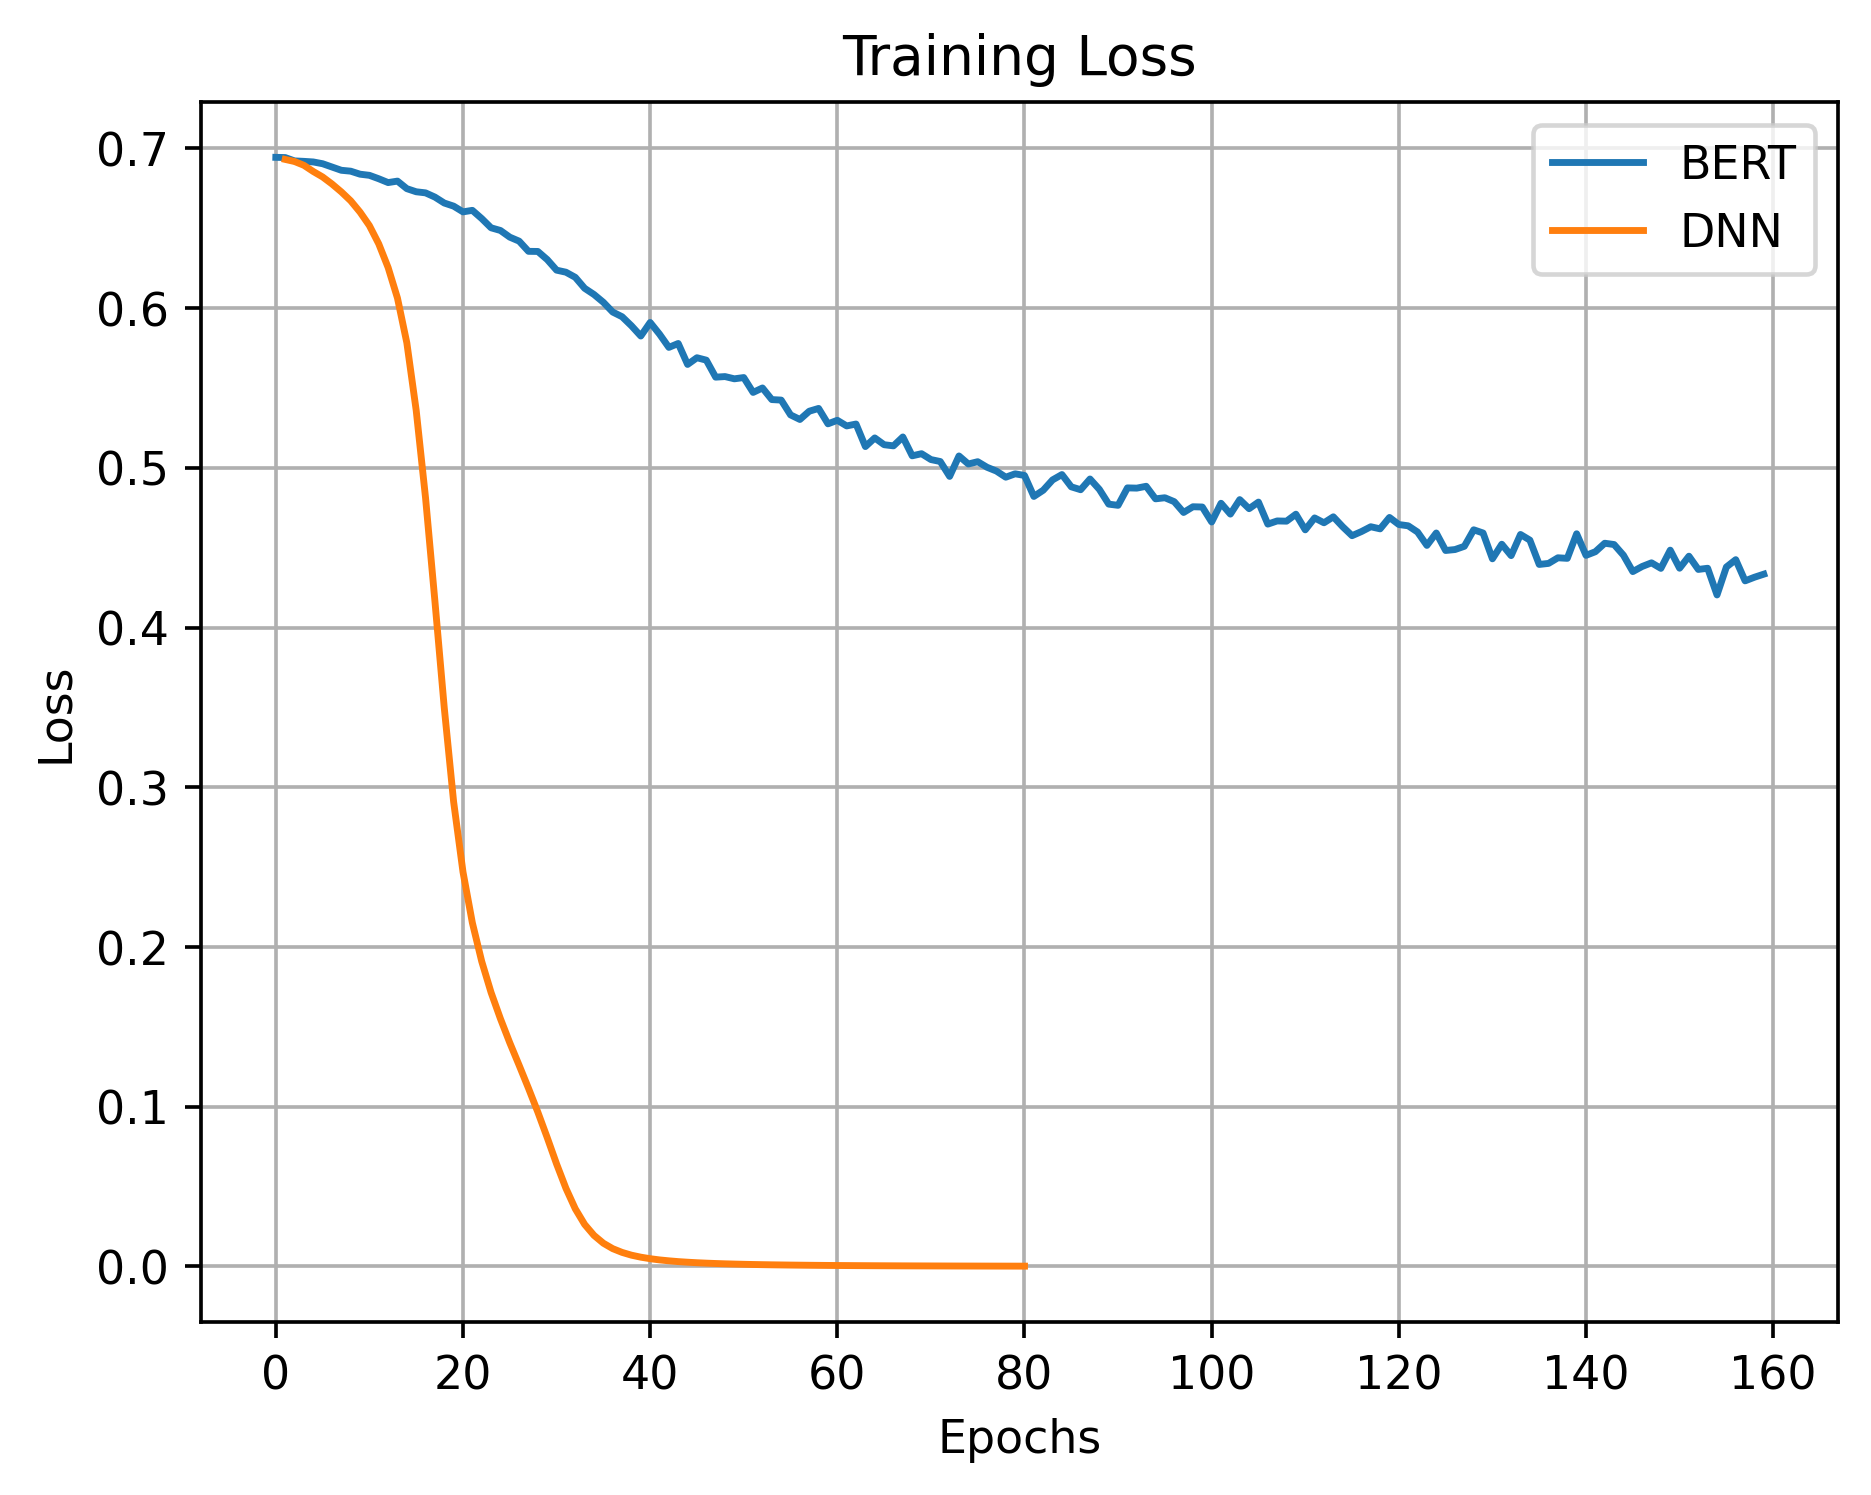

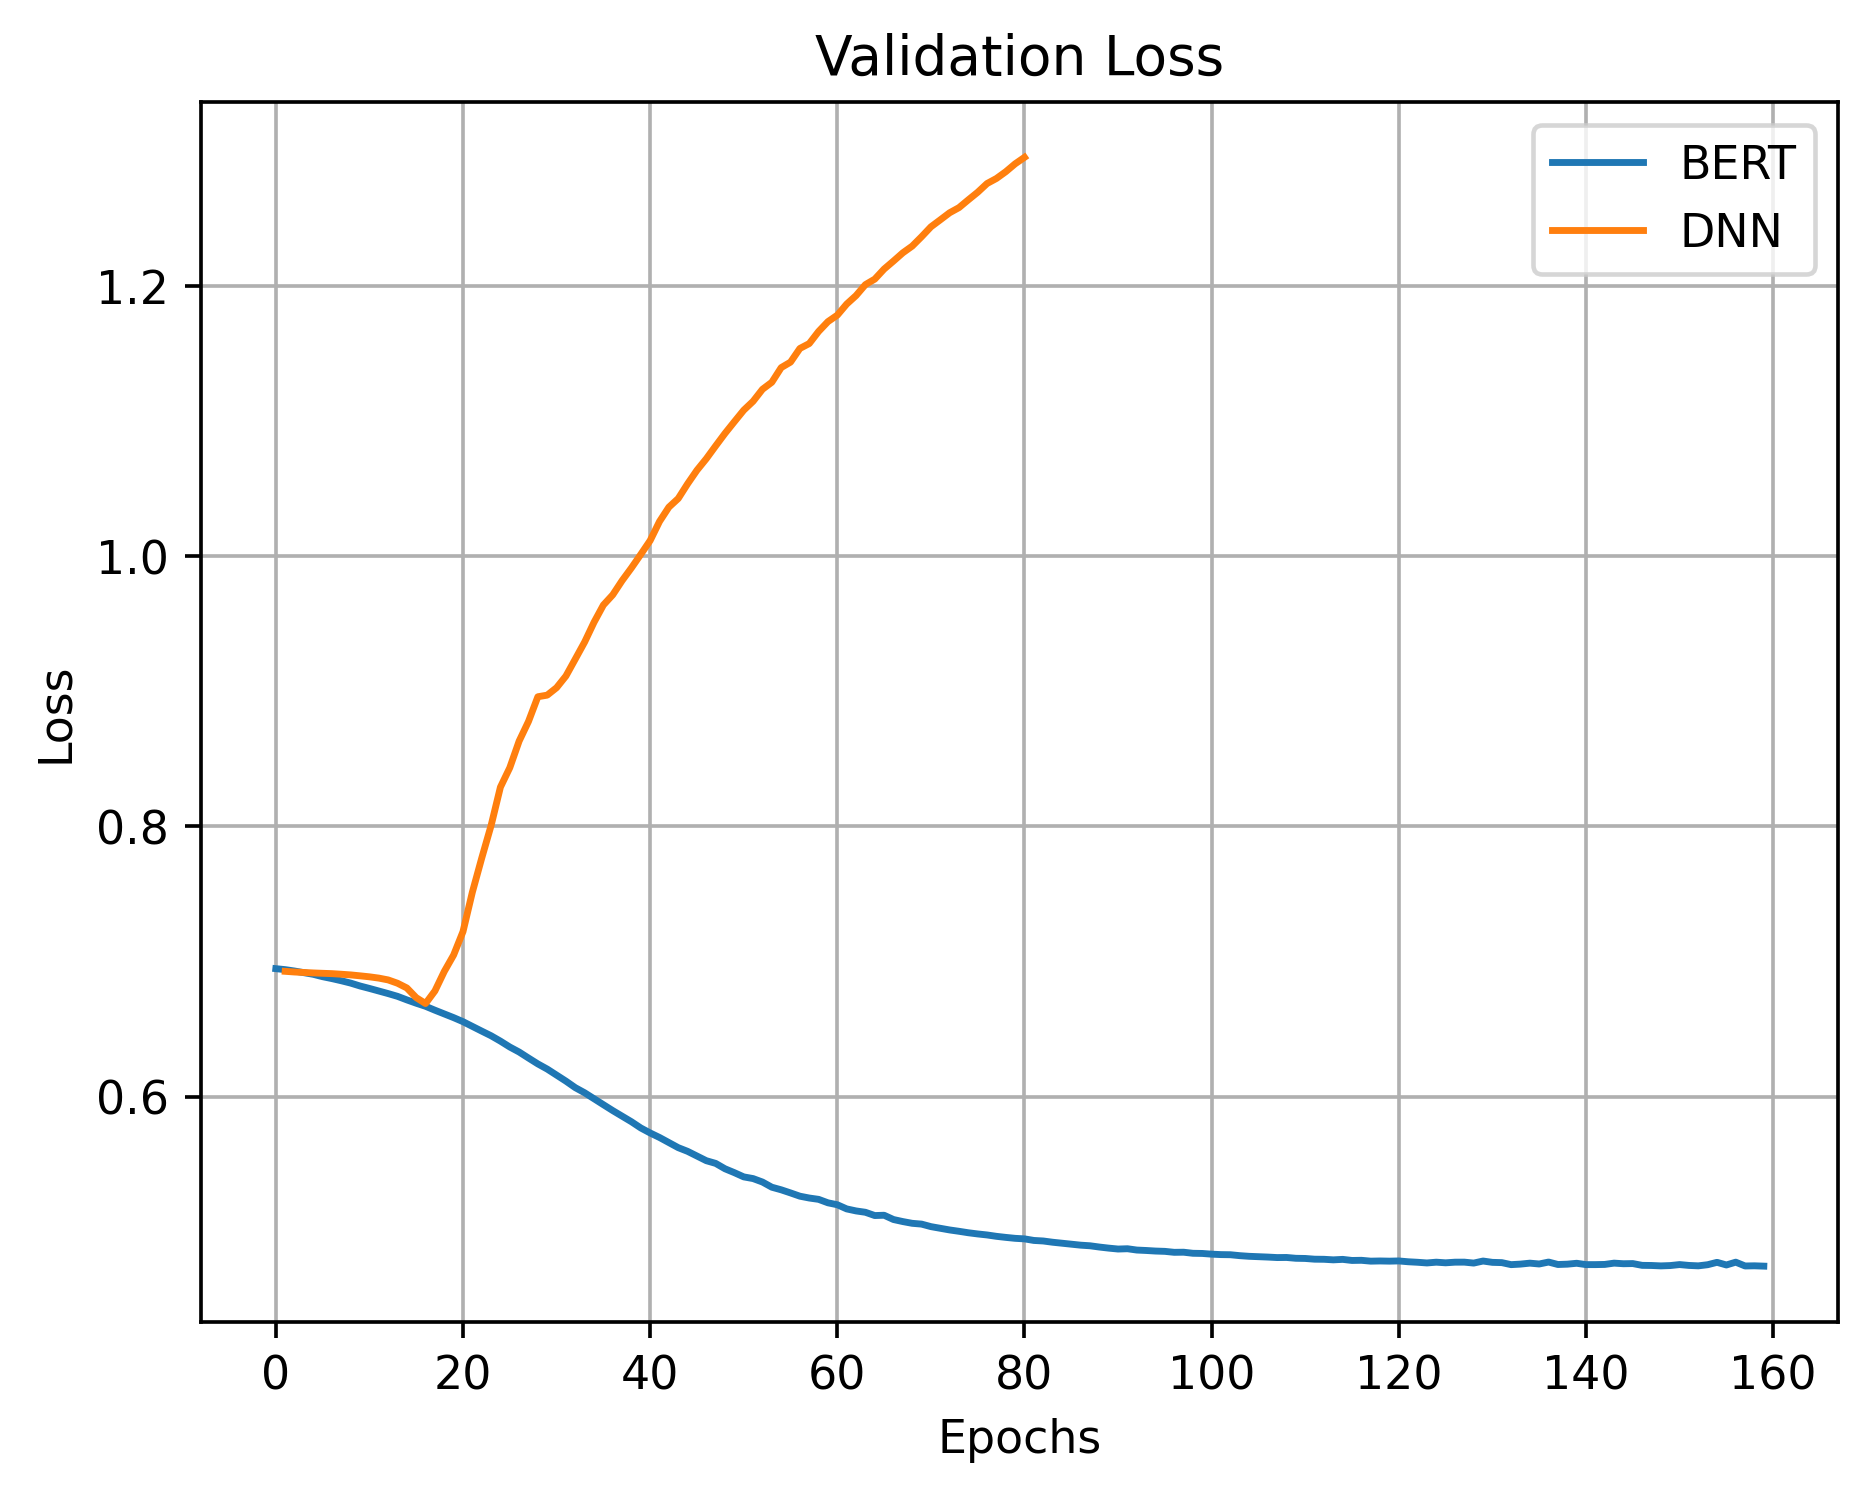

In [442]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 330

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.plot(train_losses, label="BERT")
plt.plot(x, loss, label='DNN')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.grid()
# plt.xlim(0,200)
plt.show()

# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(x, acc, 'b', label='Training acc')
# plt.plot(x, val_acc, 'r', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.subplot(1, 2, 2)
plt.plot(valid_losses, label="BERT")
plt.plot(x, val_loss, label='DNN')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Validation Loss')
plt.grid()
plt.legend()
# plt.xlim(0,200)
plt.show()


In [443]:
import keras.backend as K

print(K.eval(model.optimizer.lr))

1e-04
